<a href="https://colab.research.google.com/github/TraversaOlazabal/Data-Science-2---ML/blob/main/CriptoAnalytics_AlejandroTraversaOlazabal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CriptoAnalytics: Exploración y Análisis de Datos del Mercado Cripto** 📱💹


## Autor: Alejandro Traversa Olazabal 🧑🏻‍💻

🔗 https://www.linkedin.com/in/alejandro-traversa-olazabal/

🔗 https://github.com/TraversaOlazabal

🔗 https://traversaolazabal.framer.ai/

## 📚 **Introducción**

El presente trabajo tiene como objetivo principal realizar una exploración y análisis profundo del mercado de criptomonedas a partir de datos históricos y actuales, con el fin de identificar patrones, relaciones y comportamientos que puedan brindar indicios sobre posibles tendencias futuras.

A través del diseño de un proceso ETL (Extracción, Transformación y Carga) automatizado y la construcción de un modelo de datos estructurado, se ha logrado consolidar información proveniente de fuentes pública -la API de CoinGecko— para analizar variables clave como el precio, la capitalización de mercado, el volumen de transacciones y otros indicadores relevantes de las principales criptomonedas.

Uno de los desafíos centrales del proyecto radica en la propia naturaleza volátil e impredecible del mercado cripto, donde factores externos —tecnológicos, económicos, regulatorios o incluso sociales— pueden alterar drásticamente las tendencias. Aun así, el análisis de datos históricos permite observar ciertas regularidades o comportamientos repetitivos que, con la ayuda de herramientas analíticas y visuales, pueden orientar a los usuarios en la toma de decisiones o en la detección de oportunidades.

Además, se exploran posibles correlaciones entre criptomonedas, considerando que el comportamiento de una puede influir —total o parcialmente— en otras, o bien que presenten dinámicas similares frente a determinados eventos del mercado. Si bien se reconoce que la predicción exacta de precios es una meta altamente compleja, en este trabajo se intentará, en la medida de lo posible, diseñar un modelo predictivo que permita anticipar tendencias, comprendiendo plenamente la magnitud del desafío y apoyándose en datos limpios, ordenados y confiables.

##🎯 **Objetivo**

El objetivo de este trabajo es realizar un análisis exploratorio y predictivo del mercado de criptomonedas, utilizando un conjunto de datos que combina información histórica y actual de las principales criptos por capitalización de mercado. A través de la limpieza, transformación y visualización de variables clave como el precio, la capitalización de mercado, el volumen de operaciones y los rankings, se busca comprender la dinámica del mercado y descubrir patrones de comportamiento.

Además del análisis exploratorio, este proyecto tiene como finalidad desarrollar modelos predictivos que permitan estimar posibles movimientos futuros de precios, ya sea en función de su propio comportamiento pasado como también considerando relaciones con otras criptomonedas. Si bien se trata de un desafío complejo debido a la alta volatilidad e imprevisibilidad del mercado cripto, el trabajo intenta ofrecer insights útiles para quienes buscan entender mejor su evolución y tomar decisiones más informadas.

## 🔍 **Abstracto: Motivación y Audiencia**

El crecimiento del mercado de criptomonedas ha despertado gran interés por su potencial como vehículo de inversión, aunque su volatilidad y complejidad representan un desafío. Este análisis busca identificar patrones de comportamiento entre las principales criptomonedas, evaluando su volatilidad, correlaciones clave y reacciones ante movimientos extremos, así como contrastar hipótesis sobre su estabilidad relativa según capitalización.

La audiencia que puede beneficiarse incluye a inversores minoristas, profesionales financieros, estudiantes, entusiastas del análisis de datos y también tomadores de decisión en empresas, que consideran las criptomonedas como una alternativa de inversión dentro de sus estrategias financieras.

## **¿Comenzamos?** 👨‍💻

## **Data Acquisition**

Importamos las bibliotecas necesarias. Utilizaremos requests para conectarnos a la API pública de CoinGecko, pandas y numpy para la manipulación de datos, y las bibliotecas matplotlib y seaborn para la visualización de gráficos que nos permitirán interpretar la evolución del mercado cripto de manera más clara e intuitiva.

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Luego de haber importado las librerías necesarias, el siguiente paso clave en nuestro análisis consiste en **obtener los datos más recientes de las principales criptomonedas del mercado**. Para ello, construimos una función que consulta la API pública de CoinGecko y recupera información detallada sobre las diez criptos con mayor capitalización, incluyendo su precio actual, volumen de operaciones, máximos y mínimos históricos, oferta circulante y otros atributos relevantes.

Esta función nos permitirá generar un DataFrame actualizado con los datos del día, los cuales luego serán combinados con el histórico para llevar a cabo un análisis completo y enriquecido.

A continuación, definimos la función obtener_datos_actuales() que realiza esta tarea:

In [3]:
def obtener_datos_actuales():
    coin_ids = [
        "bitcoin", "ethereum", "polkadot", "ripple", "binancecoin",
        "solana", "litecoin", "dogecoin", "cardano", "tron"
    ]

    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "ids": ",".join(coin_ids),
        "sparkline": False
    }

    response = requests.get(url, params=params)
    data = response.json()

    columnas_utiles = [
                        'id', 'symbol', 'name', 'current_price', 'market_cap', 'market_cap_rank',
                        'circulating_supply', 'fully_diluted_valuation',
                        'total_volume',
                        'ath', 'ath_date',
                        'atl', 'atl_date',
                        'image', 'last_updated', 'max_supply'
    ]

    df = pd.DataFrame(data)[columnas_utiles]

    # Asegurarse que last_updated sea datetime
    df["last_updated"] = pd.to_datetime(df["last_updated"], utc=True)

    # Crear columna de solo fecha
    df["date"] = df["last_updated"].dt.date

    return df

Una vez definida la función que nos permite conectarnos con la API de CoinGecko y estructurar los datos obtenidos en un formato tabular, procedemos a su ejecución. En esta etapa inicial, nuestro objetivo es capturar una instantánea actualizada del mercado de criptomonedas, limitada a las diez más relevantes por capitalización de mercado.

Esta primera extracción nos brindará una base de datos con la que podremos comenzar el análisis exploratorio, y servirá además como punto de partida para construir un histórico a lo largo del tiempo.

Ejecutamos entonces la función obtener_datos_actuales() y almacenamos el resultado en un DataFrame llamado df_cryptos:

In [4]:
df_cryptos = obtener_datos_actuales()

Para verificar que la extracción se haya realizado correctamente y observar la estructura de los datos obtenidos, visualizamos las primeras filas del DataFrame. Esto nos permite validar que cada columna contenga la información esperada y que no haya errores evidentes en la consulta a la API.

A continuación, mostramos las primeras cinco filas de df_cryptos:

In [5]:
df_cryptos.head()

id symbol      name  current_price     market_cap  \
0      bitcoin    btc   Bitcoin      107295.00  2134738274820   
1     ethereum    eth  Ethereum        2441.76   294955877046   
2       ripple    xrp       XRP           2.17   128351602452   
3  binancecoin    bnb       BNB         656.41    95779996031   
4       solana    sol    Solana         147.72    79014225462   

   market_cap_rank  circulating_supply  fully_diluted_valuation  total_volume  \
0                1        1.988640e+07            2134738274820   28182617494   
1                2        1.207174e+08             294955877046   13617528017   
2                4        5.900555e+10             217494166738    2544080323   
3                5        1.458876e+08              95779996031     628482013   
4                6        5.346087e+08              89315390112    3623677068   

         ath                  ath_date        atl                  atl_date  \
0  111814.00  2025-05-22T18:41:28.492Z  67.810000  2013-07-06T00:00:00.000Z   
1    4878.26  2021-11-10T14:24:19.604Z   0.432979  2015-10-20T00:00:00.000Z   
2       3.40  2018-01-07T00:00:00.000Z   0.002686  2014-05-22T00:00:00.000Z   
3     788.84  2024-12-04T10:35:25.220Z   0.039818  2017-10-19T00:00:00.000Z   
4     293.31  2025-01-19T11:15:27.957Z   0.500801  2020-05-11T19:35:23.449Z   

                                               image  \
0  https://coin-images.coingecko.com/coins/images...   
1  https://coin-images.coingecko.com/coins/images...   
2  https://coin-images.coingecko.com/coins/images...   
3  https://coin-images.coingecko.com/coins/images...   
4  https://coin-images.coingecko.com/coins/images...   

                      last_updated    max_supply        date  
0 2025-07-02 12:28:04.825000+00:00  2.100000e+07  2025-07-02  
1 2025-07-02 12:28:06.915000+00:00           NaN  2025-07-02  
2 2025-07-02 12:28:10.798000+00:00  1.000000e+11  2025-07-02  
3 2025-07-02 12:28:03.871000+00:00  2.000000e+08  2025-07-02  
4 2025-07-02 12:28:00.192000+00:00           NaN  2025-07-02

Luego de visualizar una muestra inicial de los datos, es fundamental conocer la estructura completa del DataFrame. Para ello, utilizamos el método .info(), que nos permite identificar el tipo de dato de cada columna, la cantidad de valores no nulos y otras características relevantes.

Esta revisión es especialmente útil para detectar posibles valores faltantes o inconsistencias antes de avanzar con el análisis más profundo.

A continuación, inspeccionamos la información general de df_cryptos:

In [6]:
df_cryptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       10 non-null     object             
 1   symbol                   10 non-null     object             
 2   name                     10 non-null     object             
 3   current_price            10 non-null     float64            
 4   market_cap               10 non-null     int64              
 5   market_cap_rank          10 non-null     int64              
 6   circulating_supply       10 non-null     float64            
 7   fully_diluted_valuation  10 non-null     int64              
 8   total_volume             10 non-null     int64              
 9   ath                      10 non-null     float64            
 10  ath_date                 10 non-null     object             
 11  atl                      10 non-nul

Con los datos ya verificados y estructurados correctamente, procedemos a guardar una copia local del DataFrame en formato CSV. Esto nos permite preservar la información obtenida en esta instancia, facilitando su reutilización en futuros análisis sin necesidad de volver a consultar la API.

Además, contar con un respaldo local es útil para trabajar de forma más eficiente y evitar depender exclusivamente de la conexión en tiempo real.

Guardamos entonces los datos actuales en un archivo llamado datos_cryptos.csv:

In [7]:
df_cryptos.to_csv("datos_cryptos.csv", index=False)

Una vez generado el archivo CSV con los datos actuales, lo descargamos a nuestro equipo para conservar una copia local.

Ejecutamos la siguiente instrucción para iniciar la descarga:

In [ ]:
from google.colab import files
files.download("datos_cryptos.csv")

Dado que nuestro dataset contiene únicamente las diez criptomonedas más relevantes por capitalización, resulta útil mostrarlas de forma visual y completa. Para ello, definimos una función que recorre todo el DataFrame y presenta cada activo junto a su ícono, nombre, símbolo y precio actual.

Esta visualización nos permite obtener una primera impresión clara y ordenada del universo de criptomonedas que estaremos analizando.

Ejecutamos a continuación la función mostrar_con_icono_todas():

In [8]:
from IPython.display import HTML

def mostrar_con_icono_todas(df):
    html = ""
    for _, fila in df.iterrows():
        html += f"""
        <div style="display:flex; align-items:center; margin-bottom:10px;">
            <img src="{fila['image']}" style="width:25px; height:25px; margin-right:10px;">
            <span>{fila['name']} ({fila['symbol'].upper()}) - ${fila['current_price']}</span>
        </div>
        """
    return HTML(html)

# Mostramos todas las criptomonedas
mostrar_con_icono_todas(df_cryptos)

Para complementar los datos actuales con información histórica, definimos una función que consulta la API de CoinGecko para obtener el histórico diario de precio, capitalización de mercado y volumen total de las criptomonedas específicas de nuestro trabajo durante un período determinado (por defecto, los últimos 365 días).

Esta función procesa la respuesta JSON, convierte los timestamps a fechas legibles y filtra los datos para evitar incluir información incompleta del día en curso. Además, agrupa los datos por fecha, tomando el último registro del día como valor representativo, simulando un cierre diario.

Así, podremos construir un dataset histórico sólido y confiable que luego combinaremos con los datos actuales para realizar análisis más completos y profundos.

A continuación, presentamos la implementación de la función get_coin_history():

In [9]:
import requests
import pandas as pd
from datetime import datetime

def get_coin_history(coin_id, days=365):  # Cambiado default a 365
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": days,
        "interval": "daily"
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()

        prices = data.get("prices", [])
        market_caps = data.get("market_caps", [])
        total_volumes = data.get("total_volumes", [])

        # Construimos el DataFrame base con timestamp y precio
        df = pd.DataFrame({
            "timestamp": [x[0] for x in prices],
            "price": [x[1] for x in prices],
            "market_cap": [x[1] for x in market_caps] if market_caps else [None] * len(prices),
            "total_volume": [x[1] for x in total_volumes] if total_volumes else [None] * len(prices)
        })

        # Convertimos timestamp a fecha
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms", utc=True)
        df["date"] = df["timestamp"].dt.date

        # Filtramos para no incluir el día actual
        fecha_actual = datetime.utcnow().date()
        df = df[df["date"] < fecha_actual]

        # Agrupamos por fecha y tomamos el último registro por día (simulando cierre)
        df = df.groupby("date").agg({
            "price": "last",
            "market_cap": "last",
            "total_volume": "last"
        }).reset_index()

        # Agregamos la columna 'id'
        df["id"] = coin_id

        return df

    except Exception as e:
        print(f"❌ Error al obtener datos para {coin_id}: {e}")
        return None

Con la función definida, procedemos a obtener el histórico diario de los últimos 365 días para cada una de las diez criptomonedas principales seleccionadas. Esto nos permitirá contar con series temporales completas para analizar su evolución en precio, volumen y capitalización de mercado.

A continuación, ejecutamos la extracción de datos para cada moneda, comenzando con Bitcoin y siguiendo con las demás criptomonedas de interés:

In [10]:
# Bitcoin
df_btc = get_coin_history("bitcoin", days=365)

In [11]:
# Ethereum
df_eth = get_coin_history("ethereum", days=365)

In [12]:
# Polka Dot
df_dot = get_coin_history("polkadot", days=365)

In [13]:
# Ripple
df_xrp = get_coin_history("ripple", days=365)

⚠️ Nota importante sobre la API de CoinGecko:

Al ejecutar múltiples consultas a la API en un corto período de tiempo (especialmente al extraer datos históricos de varias criptomonedas consecutivamente), es posible que aparezcan errores intermitentes —generalmente a partir de la quinta o sexta criptomoneda— debido a las restricciones de velocidad impuestas por la propia API.

En esos casos, la función get_coin_history() puede lanzar un error de tipo 429 Too Many Requests o simplemente fallar la descarga de datos para una moneda en particular.

¿Cómo solucionarlo?
La solución es simple: esperar unos segundos o minutos y luego volver a ejecutar el bloque de código correspondiente (por ejemplo, el de binancecoin). La API suele restablecer el límite rápidamente y permite continuar con las consultas sin problemas.

In [15]:
# Binance Coin
df_bnb = get_coin_history("binancecoin", days=365)

In [16]:
# Solana
df_sol = get_coin_history("solana", days=365)

In [17]:
# Lite Coin
df_lite = get_coin_history("litecoin", days=365)

In [18]:
# Dogecoin
df_doge = get_coin_history("dogecoin", days=365)

In [19]:
# Cardano
df_ada = get_coin_history("cardano", days=365)

In [21]:
# Tron
df_tron = get_coin_history("tron", days=365)

Una vez obtenidos los datos históricos individuales para cada criptomoneda, el siguiente paso es consolidarlos en un único DataFrame.

A continuación, mostramos cómo concatenamos los DataFrames y verificamos el tamaño final del conjunto de datos:

In [22]:
# Concatenar todo lo histórico
df_historical = pd.concat([
    df_btc, df_eth, df_dot, df_xrp, df_bnb,
    df_sol, df_lite, df_tron, df_doge, df_ada
], ignore_index=True)

# Verificar
df_historical.shape

(3640, 5)

Para tener una vista rápida y confirmar que la unión de los datos fue exitosa, visualizamos las primeras filas del DataFrame resultante:

In [23]:
df_historical.head()

date         price    market_cap  total_volume       id
0  2024-07-03  62042.565037  1.222902e+12  1.810053e+10  bitcoin
1  2024-07-04  60244.680764  1.186937e+12  3.034869e+10  bitcoin
2  2024-07-05  57189.174124  1.130122e+12  4.311201e+10  bitcoin
3  2024-07-06  56739.862851  1.118491e+12  6.008136e+10  bitcoin
4  2024-07-07  58230.484154  1.147176e+12  2.129391e+10  bitcoin


Para comprender mejor la estructura del conjunto de datos histórico, revisamos un resumen con la información de cada columna, incluyendo tipos de datos y la cantidad de registros no nulos. Esto nos ayuda a detectar posibles valores faltantes y a confirmar que los datos fueron correctamente cargados:

In [24]:
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3640 non-null   object 
 1   price         3640 non-null   float64
 2   market_cap    3640 non-null   float64
 3   total_volume  3640 non-null   float64
 4   id            3640 non-null   object 
dtypes: float64(3), object(2)
memory usage: 142.3+ KB


Como parte del proceso de preservación y para facilitar su uso posterior, exportamos el DataFrame histórico consolidado a un archivo CSV:

In [25]:
df_historical.to_csv("datos_historicos_10cryptos.csv", index=False)

In [ ]:
from google.colab import files
files.download("datos_historicos_10cryptos.csv")

## **Data Wrangling**

Mediante un merge basado en el identificador de la criptomoneda y la fecha, logramos integrar ambos conjuntos en un único DataFrame, manteniendo toda la información relevante de cada fuente.

Esta fusión con método outer garantiza que no se pierdan registros.

A continuación, verificamos la dimensión del DataFrame resultante para asegurarnos de que la unión fue exitosa:

In [26]:
# Merge entre actuales e históricos
df_merged = pd.merge(
    df_historical,
    df_cryptos,
    on=["id", "date"],
    how="outer",
    suffixes=("_hist", "_actual")
)

# Verificamos
df_merged.shape

(3650, 20)

Antes de continuar con el análisis, es fundamental asegurarnos de que no existan registros duplicados en el dataset final:

In [27]:
duplicados = df_merged.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

Cantidad de filas duplicadas: 0


EXCELENTE 🌟 No existen registros duplicados. Ya tenemos nuestro dataframe con el que vamos a comenzar a trabajar.

Antes que nada vamos revisar cómo quedó la combinación de datos históricos y actuales. Mostramos las últimas filas del DataFrame resultante:

In [28]:
df_merged.tail()

date     price  market_cap_hist  total_volume_hist    id symbol  \
3645  2025-06-28  0.273440     2.592196e+10       4.224944e+08  tron    NaN   
3646  2025-06-29  0.274606     2.602426e+10       3.950471e+08  tron    NaN   
3647  2025-06-30  0.276798     2.623939e+10       2.990996e+08  tron    NaN   
3648  2025-07-01  0.279923     2.654722e+10       4.654562e+08  tron    NaN   
3649  2025-07-02       NaN              NaN                NaN  tron    trx   

      name  current_price  market_cap_actual  market_cap_rank  \
3645   NaN            NaN                NaN              NaN   
3646   NaN            NaN                NaN              NaN   
3647   NaN            NaN                NaN              NaN   
3648   NaN            NaN                NaN              NaN   
3649  TRON        0.28177       2.670868e+10              8.0   

      circulating_supply  fully_diluted_valuation  total_volume_actual  \
3645                 NaN                      NaN                  NaN   
3646                 NaN                      NaN                  NaN   
3647                 NaN                      NaN                  NaN   
3648                 NaN                      NaN                  NaN   
3649        9.479214e+10             2.670873e+10          439467104.0   

           ath                  ath_date       atl                  atl_date  \
3645       NaN                       NaN       NaN                       NaN   
3646       NaN                       NaN       NaN                       NaN   
3647       NaN                       NaN       NaN                       NaN   
3648       NaN                       NaN       NaN                       NaN   
3649  0.431288  2024-12-04T00:10:40.323Z  0.001804  2017-11-12T00:00:00.000Z   

                                                  image  \
3645                                                NaN   
3646                                                NaN   
3647                                                NaN   
3648                                                NaN   
3649  https://coin-images.coingecko.com/coins/images...   

                         last_updated  max_supply  
3645                              NaT         NaN  
3646                              NaT         NaN  
3647                              NaT         NaN  
3648                              NaT         NaN  
3649 2025-07-02 12:28:00.987000+00:00         NaN

## **Continuemos:**

Como puede observarse, una vez realizada la unión de los datasets históricos y actuales, obtenemos un DataFrame con información consolidada para cada una de las criptomonedas analizadas. Sin embargo, **esta fusión genera algunos desafíos que requieren una etapa de depuración y transformación para preparar los datos correctamente antes del análisis.**

En primer lugar, es común encontrar valores nulos en varias columnas, especialmente en los registros más recientes donde aún no se disponen de datos históricos consolidados o cuando los datos actuales no estaban disponibles al momento de la consulta. Para abordar esto, se completarán los valores faltantes de variables clave como price, market_cap_hist y total_volume_hist con sus respectivos equivalentes actuales (current_price, market_cap_actual, total_volume_actual) cuando estén disponibles.

Además, se reorganizarán las columnas para mejorar la legibilidad del DataFrame y facilitar futuros análisis, estableciendo un orden lógico que agrupe variables similares. También se procederá a renombrar algunas columnas para dar mayor claridad semántica (por ejemplo, price pasará a llamarse closing_price, y total_volume_hist a total_volume_day), y se ajustarán tipos de datos si es necesario para garantizar consistencia en el tratamiento posterior.

Finalmente, se eliminarán o transformarán aquellas columnas redundantes o no necesarias para los objetivos del proyecto. Este paso es esencial para reducir el ruido en los datos y asegurar una base sólida para la generación de visualizaciones y métricas.

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   date                     3650 non-null   object             
 1   price                    3640 non-null   float64            
 2   market_cap_hist          3640 non-null   float64            
 3   total_volume_hist        3640 non-null   float64            
 4   id                       3650 non-null   object             
 5   symbol                   10 non-null     object             
 6   name                     10 non-null     object             
 7   current_price            10 non-null     float64            
 8   market_cap_actual        10 non-null     float64            
 9   market_cap_rank          10 non-null     float64            
 10  circulating_supply       10 non-null     float64            
 11  fully_diluted_valuation  10 no

Para facilitar la lectura y el análisis posterior, reordenamos las columnas del DataFrame final según un esquema lógico y conveniente. Esto permite que los datos más relevantes y comparables estén agrupados y se puedan interpretar más fácilmente.

Definimos una lista con el orden deseado de las columnas y aplicamos esta ordenación al DataFrame unificado:

In [30]:
# Lista con el orden deseado de las columnas,
orden_columnas = ['id', 'symbol', 'name', 'date', 'price', 'circulating_supply', 'market_cap_hist', 'market_cap_rank', 'total_volume_hist', 'max_supply', 'fully_diluted_valuation', 'ath', 'ath_date', 'atl', 'atl_date', 'image', 'last_updated', 'market_cap_actual', 'current_price', 'total_volume_actual']

# Reordenar el DataFrame
df_merged = df_merged[orden_columnas]

Como parte del proceso de limpieza y estandarización del dataset unificado, se procede a completar valores faltantes en las variables históricas clave utilizando, cuando están disponibles, los datos más recientes obtenidos en la extracción actual. Este paso resulta fundamental para asegurar que no se pierda información valiosa por la presencia de nulos tras el merge:

In [31]:
df_merged.loc[df_merged['market_cap_actual'].notna(), 'market_cap_hist'] = df_merged['market_cap_actual']
df_merged.loc[df_merged['current_price'].notna(), 'price'] = df_merged['current_price']
df_merged.loc[df_merged['total_volume_actual'].notna(), 'total_volume_hist'] = df_merged['total_volume_actual']

Con el objetivo de mejorar la claridad semántica del dataset y facilitar su interpretación en etapas posteriores del análisis, se procede a renombrar algunas columnas clave:

In [32]:
df_merged.rename(columns={
    'market_cap_hist': 'market_cap',
    'total_volume_hist': 'total_volume_day',
    'price': 'closing_price'
}, inplace=True)

Una vez renombradas las columnas, se procede a completar los valores faltantes en aquellas variables que presentan datos constantes a lo largo del tiempo para cada criptomoneda. Muchas de estas columnas, como el nombre del activo, su símbolo o su imagen, son atributos estáticos o que cambian con muy poca frecuencia, y su ausencia en algunos registros suele deberse a la forma en que se realiza la fusión entre datos históricos y actuales:

In [33]:
df_merged['circulating_supply'] = df_merged.groupby('id')['circulating_supply'].transform(lambda x: x.ffill().bfill())
df_merged['market_cap_rank'] = df_merged.groupby('id')['market_cap_rank'].transform(lambda x: x.ffill().bfill())
df_merged['max_supply'] = df_merged.groupby('id')['max_supply'].transform(lambda x: x.ffill().bfill())
df_merged['fully_diluted_valuation'] = df_merged.groupby('id')['fully_diluted_valuation'].transform(lambda x: x.ffill().bfill())
df_merged['ath'] = df_merged.groupby('id')['ath'].transform(lambda x: x.ffill().bfill())
df_merged['ath_date'] = df_merged.groupby('id')['ath_date'].transform(lambda x: x.ffill().bfill())
df_merged['atl'] = df_merged.groupby('id')['atl'].transform(lambda x: x.ffill().bfill())
df_merged['atl_date'] = df_merged.groupby('id')['atl_date'].transform(lambda x: x.ffill().bfill())
df_merged['image'] = df_merged.groupby('id')['image'].transform(lambda x: x.ffill().bfill())
df_merged['symbol'] = df_merged.groupby('id')['symbol'].transform(lambda x: x.ffill().bfill())
df_merged['name'] = df_merged.groupby('id')['name'].transform(lambda x: x.ffill().bfill())

Una vez que los valores actuales de capitalización de mercado, precio y volumen diario han sido utilizados para completar o actualizar los datos históricos correspondientes, estas columnas originales pierden relevancia en el análisis y pueden eliminarse del DataFrame:

In [34]:
df_merged.drop(columns=['market_cap_actual', 'current_price', 'total_volume_actual'], inplace=True)

Con el conjunto de datos ya unificado y depurado, se lleva a cabo una **última etapa de transformación y ajuste en el formato de los valores** para asegurar una correcta visualización, interpretación y posterior análisis:

**Redondeo de precios:** Se redondean a dos decimales los valores de price, ath (precio máximo histórico) y atl (precio mínimo histórico) para mejorar la presentación de los datos monetarios y facilitar su lectura.

**Conversión de grandes volúmenes numéricos:** Para evitar la notación científica y asegurar una visualización clara de valores como la capitalización de mercado, volumen de operaciones, o el suministro circulante, se convierte el tipo de dato de columnas específicas a float64.

**Formato entero para el ranking:** La columna market_cap_rank se completa con ceros en caso de valores nulos y se transforma a tipo entero, ya que representa una posición en el ranking y no admite decimales.

**Formato de fechas:** Las fechas correspondientes a los valores máximos y mínimos históricos (ath_date y atl_date) se convierten al formato de fecha sin incluir la hora, ya que el nivel de precisión horaria no es relevante para el análisis.

In [35]:
# 1. Redondear a 2 decimales
df_merged['closing_price'] = df_merged['closing_price'].round(2)
df_merged['ath'] = df_merged['ath'].round(2)
df_merged['atl'] = df_merged['atl'].round(2)

# 2. Convertir números grandes a float sin notación científica
pd.options.display.float_format = '{:,.2f}'.format  # afecta la visualización general
# Si querés evitar el cambio global y solo modificar columnas específicas:
cols_grandes = ['circulating_supply', 'market_cap', 'total_volume_day', 'max_supply', 'fully_diluted_valuation']
for col in cols_grandes:
    df_merged[col] = df_merged[col].astype('float64')  # asegura el tipo y saca notación científica

# 3. Convertir market_cap_rank a entero sin coma
df_merged['market_cap_rank'] = df_merged['market_cap_rank'].fillna(0).astype(int)

Para asegurar un correcto manejo y análisis temporal de los datos, es fundamental que las columnas que contienen fechas estén en un formato de fecha reconocido por Pandas:

In [36]:
# Convertir columnas a formato fecha
df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")
df_merged["ath_date"] = pd.to_datetime(df_merged["ath_date"], errors="coerce")
df_merged["atl_date"] = pd.to_datetime(df_merged["atl_date"], errors="coerce")

Una vez aplicadas todas las transformaciones, se procede a realizar una última inspección visual de los datos para corroborar que las modificaciones hayan sido exitosas:

In [37]:
df_merged.tail()

id symbol  name       date  closing_price  circulating_supply  \
3645  tron    trx  TRON 2025-06-28           0.27   94,792,136,245.49   
3646  tron    trx  TRON 2025-06-29           0.27   94,792,136,245.49   
3647  tron    trx  TRON 2025-06-30           0.28   94,792,136,245.49   
3648  tron    trx  TRON 2025-07-01           0.28   94,792,136,245.49   
3649  tron    trx  TRON 2025-07-02           0.28   94,792,136,245.49   

            market_cap  market_cap_rank  total_volume_day  max_supply  \
3645 25,921,960,953.52                8    422,494,373.78         NaN   
3646 26,024,264,337.04                8    395,047,121.52         NaN   
3647 26,239,386,595.99                8    299,099,583.83         NaN   
3648 26,547,220,076.38                8    465,456,154.93         NaN   
3649 26,708,679,101.00                8    439,467,104.00         NaN   

      fully_diluted_valuation  ath                         ath_date  atl  \
3645        26,708,730,595.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   
3646        26,708,730,595.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   
3647        26,708,730,595.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   
3648        26,708,730,595.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   
3649        26,708,730,595.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   

                      atl_date  \
3645 2017-11-12 00:00:00+00:00   
3646 2017-11-12 00:00:00+00:00   
3647 2017-11-12 00:00:00+00:00   
3648 2017-11-12 00:00:00+00:00   
3649 2017-11-12 00:00:00+00:00   

                                                  image  \
3645  https://coin-images.coingecko.com/coins/images...   
3646  https://coin-images.coingecko.com/coins/images...   
3647  https://coin-images.coingecko.com/coins/images...   
3648  https://coin-images.coingecko.com/coins/images...   
3649  https://coin-images.coingecko.com/coins/images...   

                         last_updated  
3645                              NaT  
3646                              NaT  
3647                              NaT  
3648                              NaT  
3649 2025-07-02 12:28:00.987000+00:00

Al observar el resultado, se aprecia que el **conjunto de datos luce ahora mucho más limpio y estructurado**. Se han completado los valores nulos relevantes, los nombres de columnas están estandarizados, y los tipos de datos han sido corregidos para facilitar su lectura y análisis. Además, la información histórica y actual de cada criptomoneda se encuentra integrada y ordenada cronológicamente, lo que permitirá trabajar con este dataset de manera efectiva en las siguientes etapas del proyecto.

### Es momento de conocer en detalle nuestro dataset:

📊 Luego de realizar la unión, limpieza, actualización y reorganización de los datos, obtenemos un dataset final con columnas que resumen de forma clara y estructurada las principales características de cada criptomoneda a lo largo del tiempo. A continuación, se detalla brevemente el significado de cada una:

**id**: identificador único de la criptomoneda en la API de CoinGecko.

**symbol**: símbolo o abreviatura con la que se representa la criptomoneda (por ejemplo, BTC para Bitcoin).

**name**: nombre completo de la criptomoneda.

**date**: fecha correspondiente a cada registro (formato diario).

**closing_price**: precio de cierre diario de la criptomoneda en dólares.

**circulating_supply**: cantidad de monedas en circulación para esa fecha.

**market_cap**: capitalización de mercado, calculada como precio × circulante.

**market_cap_rank**: posición que ocupa la criptomoneda según su capitalización en el mercado global.

**total_volume_day**: volumen total operado durante el día (cantidad transada en USD).

**max_supply**: cantidad máxima de monedas que pueden llegar a existir (si está definida).

**fully_diluted_valuation**: valoración total si se emitiera la cantidad máxima de monedas.

**ath**: precio máximo histórico alcanzado (All Time High).

**ath_date**: fecha en la que se alcanzó el precio máximo histórico.

**atl**: precio mínimo histórico alcanzado (All Time Low).

**atl_date**: fecha en la que se alcanzó el precio mínimo histórico.

**image**: enlace a un ícono representativo de la criptomoneda.

**last_updated**: fecha y hora de la última actualización disponible desde la API.


In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       3650 non-null   object             
 1   symbol                   3650 non-null   object             
 2   name                     3650 non-null   object             
 3   date                     3650 non-null   datetime64[ns]     
 4   closing_price            3650 non-null   float64            
 5   circulating_supply       3650 non-null   float64            
 6   market_cap               3650 non-null   float64            
 7   market_cap_rank          3650 non-null   int64              
 8   total_volume_day         3650 non-null   float64            
 9   max_supply               1825 non-null   float64            
 10  fully_diluted_valuation  3650 non-null   float64            
 11  ath                      3650 

Al analizar la estructura de nuestro DataFrame, observamos que contiene 3,650 registros distribuidos en 17 columnas. La mayoría de las columnas no presentan valores nulos, lo que indica que la depuración y el llenado de datos faltantes se realizó con éxito en gran medida. Destaca la columna max_supply, que posee aproximadamente la mitad de valores nulos, dado que no todas las criptomonedas tienen un límite máximo definido en su emisión.

En cuanto a los tipos de datos, contamos con columnas de tipo fecha (datetime64), que permiten trabajar con series temporales de manera eficiente, y varias columnas numéricas (float64 e int64) para representar valores financieros y cantidades. También tenemos columnas de texto (object), que identifican a cada criptomoneda y contienen URLs para imágenes.

Es importante destacar que la columna last_updated, aunque posee pocos datos no nulos, cumple una función clave: indica cuál es el registro que corresponde al valor más reciente obtenido, permitiendo conocer el día y la hora exacta en que se realizó la consulta a la API para esa criptomoneda.

Esta estructura sólida nos permitirá continuar con confianza en el análisis y la visualización de los datos.

Finalmente, para conservar el conjunto de datos completo y unificado, exportamos el DataFrame fusionado a un archivo CSV. Este archivo servirá como base para futuros análisis, visualizaciones o modelados, evitando tener que repetir las consultas y procesos previos.

Guardamos este archivo con el nombre dataset_final_unido.csv:

In [39]:
df_merged.to_csv("dataset_final_unido.csv", index=False)

In [ ]:
from google.colab import files
files.download("dataset_final_unido.csv")

## 🚨**Advertencia para lector con dificultades en la preparación del DataFrame** 🚨

Si has podido completar correctamente todas las etapas previas de extracción, depuración y combinación de datos, y cuentas con el DataFrame final (df_merged o el nombre que hayas asignado) listo para continuar, **no es necesario ejecutar el siguiente bloque de código**, ya que podrías sobrescribir tu trabajo y generar errores en las etapas posteriores.

Sin embargo, si por algún motivo encontraste dificultades, errores o no pudiste obtener el DataFrame correctamente, como alternativa rápida y práctica, puedes cargar directamente un archivo CSV preprocesado y disponible en GitHub. Esto te permitirá continuar con las fases de análisis y exploración de datos sin inconvenientes.

In [ ]:
# Si quiero obtener datos directamente de un csv con algunos datos previamente reunidos: esta luego la paso al final como plan B! por si no pueden traer datos desde la API
# Enlace raw del CSV en GitHub
url_github_csv = 'https://raw.githubusercontent.com/TraversaOlazabal/Data-Science-2---ML/refs/heads/main/data/dataset_final_unido_auxiliar.csv'

df_merged = pd.read_csv(url_github_csv, parse_dates=['last_updated'])
print("📥 Dataset cargado exitosamente desde GitHub.")

# Convertir columnas a formato fecha
df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")
df_merged["ath_date"] = pd.to_datetime(df_merged["ath_date"], errors="coerce")
df_merged["atl_date"] = pd.to_datetime(df_merged["atl_date"], errors="coerce")

## **Continuamos:**

### 🧩 **Generación de variables derivadas y temporales**

Con el objetivo de enriquecer el análisis exploratorio y preparar el dataset para posibles aplicaciones futuras de Machine Learning, en esta sección vamos a crear nuevas variables a partir de las columnas existentes.

Por un lado, generaremos **variables derivadas**, que permiten capturar dinámicas relevantes del comportamiento de cada criptomoneda a lo largo del tiempo, como variaciones porcentuales, promedios móviles, volatilidad o ratios de relación entre volumen y capitalización.

Por otro lado, incorporaremos **variables temporales**, que nos permitirán explorar patrones según el momento del año, el mes o el día de la semana, y evaluar si existen comportamientos distintos en días hábiles y fines de semana.

Estas nuevas columnas no sólo aportan valor al análisis exploratorio, sino que también amplían el conjunto de atributos que podrían resultar útiles como variables predictoras en modelos de aprendizaje automático.

📌 Variables derivadas (cálculos sobre columnas existentes):

Variación porcentual diaria del precio (daily_pct_change):

In [40]:
df_merged["daily_pct_change"] = df_merged.groupby("id")["closing_price"].pct_change()

Promedios móviles (por ejemplo, 7 y 30 días):

In [41]:
df_merged["sma_7"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(7).mean())
df_merged["sma_30"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(30).mean())

Volatilidad (rolling std):

In [42]:
df_merged["volatility_7d"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(7).std())

Ratio de market cap sobre volumen diario:

In [43]:
df_merged["volume_marketcap_ratio"] = df_merged["total_volume_day"] / df_merged["market_cap"]

Proporción de oferta circulante respecto al total (si la cripto posee max_supply):

In [44]:
df_merged["circulation_ratio"] = df_merged["circulating_supply"] / df_merged["max_supply"]

📅 Variables temporales:

Año, mes, día de la semana:

In [45]:
df_merged["year"] = df_merged["date"].dt.year
df_merged["month"] = df_merged["date"].dt.month
df_merged["weekday"] = df_merged["date"].dt.day_name()

¿Es fin de semana? (útil para detectar patrones diferentes en días hábiles y no hábiles):

In [46]:
df_merged["is_weekend"] = df_merged["date"].dt.weekday >= 5

Perfecto, ahora ordenemos nuestras nuevas columnas:



In [47]:
column_order = [
    "id", "symbol", "name",
    "date", "year", "month", "weekday", "is_weekend",
    "closing_price", "daily_pct_change", "sma_7", "sma_30", "volatility_7d", "total_volume_day", "volume_marketcap_ratio",
    "market_cap", "market_cap_rank", "fully_diluted_valuation", "circulating_supply", "max_supply", "circulation_ratio",
    "ath", "ath_date", "atl", "atl_date",
    "image", "last_updated"
]

# Aplicar el nuevo orden
df_merged = df_merged[column_order]

## 🧾 **Visualización del DataFrame final**

A continuación, se muestra una vista preliminar del DataFrame final luego del proceso completo de limpieza, transformación y enriquecimiento de datos:

In [48]:
pd.set_option('display.max_columns', None)
df_merged.head(50)

id symbol name       date  year  month    weekday  is_weekend  \
0   binancecoin    bnb  BNB 2024-07-03  2024      7  Wednesday       False   
1   binancecoin    bnb  BNB 2024-07-04  2024      7   Thursday       False   
2   binancecoin    bnb  BNB 2024-07-05  2024      7     Friday       False   
3   binancecoin    bnb  BNB 2024-07-06  2024      7   Saturday        True   
4   binancecoin    bnb  BNB 2024-07-07  2024      7     Sunday        True   
5   binancecoin    bnb  BNB 2024-07-08  2024      7     Monday       False   
6   binancecoin    bnb  BNB 2024-07-09  2024      7    Tuesday       False   
7   binancecoin    bnb  BNB 2024-07-10  2024      7  Wednesday       False   
8   binancecoin    bnb  BNB 2024-07-11  2024      7   Thursday       False   
9   binancecoin    bnb  BNB 2024-07-12  2024      7     Friday       False   
10  binancecoin    bnb  BNB 2024-07-13  2024      7   Saturday        True   
11  binancecoin    bnb  BNB 2024-07-14  2024      7     Sunday        True   
12  binancecoin    bnb  BNB 2024-07-15  2024      7     Monday       False   
13  binancecoin    bnb  BNB 2024-07-16  2024      7    Tuesday       False   
14  binancecoin    bnb  BNB 2024-07-17  2024      7  Wednesday       False   
15  binancecoin    bnb  BNB 2024-07-18  2024      7   Thursday       False   
16  binancecoin    bnb  BNB 2024-07-19  2024      7     Friday       False   
17  binancecoin    bnb  BNB 2024-07-20  2024      7   Saturday        True   
18  binancecoin    bnb  BNB 2024-07-21  2024      7     Sunday        True   
19  binancecoin    bnb  BNB 2024-07-22  2024      7     Monday       False   
20  binancecoin    bnb  BNB 2024-07-23  2024      7    Tuesday       False   
21  binancecoin    bnb  BNB 2024-07-24  2024      7  Wednesday       False   
22  binancecoin    bnb  BNB 2024-07-25  2024      7   Thursday       False   
23  binancecoin    bnb  BNB 2024-07-26  2024      7     Friday       False   
24  binancecoin    bnb  BNB 2024-07-27  2024      7   Saturday        True   
25  binancecoin    bnb  BNB 2024-07-28  2024      7     Sunday        True   
26  binancecoin    bnb  BNB 2024-07-29  2024      7     Monday       False   
27  binancecoin    bnb  BNB 2024-07-30  2024      7    Tuesday       False   
28  binancecoin    bnb  BNB 2024-07-31  2024      7  Wednesday       False   
29  binancecoin    bnb  BNB 2024-08-01  2024      8   Thursday       False   
30  binancecoin    bnb  BNB 2024-08-02  2024      8     Friday       False   
31  binancecoin    bnb  BNB 2024-08-03  2024      8   Saturday        True   
32  binancecoin    bnb  BNB 2024-08-04  2024      8     Sunday        True   
33  binancecoin    bnb  BNB 2024-08-05  2024      8     Monday       False   
34  binancecoin    bnb  BNB 2024-08-06  2024      8    Tuesday       False   
35  binancecoin    bnb  BNB 2024-08-07  2024      8  Wednesday       False   
36  binancecoin    bnb  BNB 2024-08-08  2024      8   Thursday       False   
37  binancecoin    bnb  BNB 2024-08-09  2024      8     Friday       False   
38  binancecoin    bnb  BNB 2024-08-10  2024      8   Saturday        True   
39  binancecoin    bnb  BNB 2024-08-11  2024      8     Sunday        True   
40  binancecoin    bnb  BNB 2024-08-12  2024      8     Monday       False   
41  binancecoin    bnb  BNB 2024-08-13  2024      8    Tuesday       False   
42  binancecoin    bnb  BNB 2024-08-14  2024      8  Wednesday       False   
43  binancecoin    bnb  BNB 2024-08-15  2024      8   Thursday       False   
44  binancecoin    bnb  BNB 2024-08-16  2024      8     Friday       False   
45  binancecoin    bnb  BNB 2024-08-17  2024      8   Saturday        True   
46  binancecoin    bnb  BNB 2024-08-18  2024      8     Sunday        True   
47  binancecoin    bnb  BNB 2024-08-19  2024      8     Monday       False   
48  binancecoin    bnb  BNB 2024-08-20  2024      8    Tuesday       False   
49  binancecoin    bnb  BNB 2024-08-21  2024      8  Wednesday       False   

    closing_price  daily_pct_chang

🆕 **Descripción de las nuevas columnas creadas**

**daily_pct_change**: Variación porcentual diaria del precio de cierre. Permite analizar la rentabilidad diaria de cada criptomoneda (expresada como números decimales, donde 0,1 es un incremento diario del 10%).

**sma_7**: Promedio móvil de los últimos 7 días del precio de cierre. Suaviza las fluctuaciones diarias y ayuda a detectar tendencias de corto plazo.

**sma_30**: Promedio móvil de los últimos 30 días. Útil para observar la tendencia a mediano plazo.

**volatility_7d**: Desviación estándar móvil de los últimos 7 días del precio. Representa la volatilidad semanal. Se encuentra medida en USD. Ejemplo simple:
Supongamos los siguientes precios de cierre (en USD) durante una semana: [100, 105, 95, 98, 102, 99, 101] La volatility_7d sería algo como: ≈ 3.16 USD. Eso significa que, en promedio, los precios diarios se desvían unos 3.16 dólares del promedio semanal.

**volume_marketcap_ratio**: Relación entre el volumen diario y la capitalización de mercado. Indica la actividad relativa del mercado para esa moneda. Un valor alto indica que hay mucho movimiento de compra/venta en relación a su capitalización. Puede ser señal de: Interés especulativo, Alta volatilidad, Noticias importantes. Un valor bajo sugiere que la moneda está poco activa o estable, en relación a su tamaño. Ejemplo simple: Supongamos: total_volume_day = 500 millones USD; market_cap = 10.000 millones USD. Entonces: volume_marketcap_ratio = 500M / 10.000M = 0.05. Esto significa que en ese día se transó un 5% del valor total de la moneda. Dicho de otro modo: por cada dólar en capitalización, hubo 5 centavos de movimiento ese día.

**circulation_ratio**: Relación entre la cantidad en circulación y el suministro máximo.
Indica qué porcentaje del total posible de monedas ya se encuentra en circulación. Un valor cercano a 1 (o 100%) sugiere que casi todas las unidades posibles ya fueron emitidas, lo cual puede influir en la presión inflacionaria y en la percepción de escasez de la criptomoneda.

**year**: Año en el que se registró el dato.

**month**: Mes del año en el que se registró el dato. Útil para análisis estacionales.

**weekday**: Día de la semana (de 0 a 6, donde 0 = lunes). Ayuda a identificar patrones según el día.

**is_weekend**: Variable booleana que indica si el día corresponde a fin de semana (True) o no (False). Permite comparar comportamientos entre días hábiles y no hábiles.

In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       3650 non-null   object             
 1   symbol                   3650 non-null   object             
 2   name                     3650 non-null   object             
 3   date                     3650 non-null   datetime64[ns]     
 4   year                     3650 non-null   int32              
 5   month                    3650 non-null   int32              
 6   weekday                  3650 non-null   object             
 7   is_weekend               3650 non-null   bool               
 8   closing_price            3650 non-null   float64            
 9   daily_pct_change         3640 non-null   float64            
 10  sma_7                    3590 non-null   float64            
 11  sma_30                   3360 

Ahora analicemos en detalle la cantidad de datos nulos y a qué variables pertenecen:

In [50]:
df_merged.isnull().sum().sort_values(ascending=False)

last_updated               3640
max_supply                 1825
circulation_ratio          1825
sma_30                      290
sma_7                        60
volatility_7d                60
daily_pct_change             10
name                          0
symbol                        0
date                          0
id                            0
is_weekend                    0
closing_price                 0
month                         0
weekday                       0
year                          0
market_cap                    0
total_volume_day              0
volume_marketcap_ratio        0
circulating_supply            0
fully_diluted_valuation       0
market_cap_rank               0
ath                           0
ath_date                      0
atl                           0
atl_date                      0
image                         0
dtype: int64

### 📌 **Análisis de valores nulos en el dataset**

Al inspeccionar la estructura del DataFrame, se identificaron algunas columnas con valores faltantes. Estas ausencias no son aleatorias, sino que responden a la lógica del negocio y a la naturaleza de los datos:

🧮 **max_supply y circulation_ratio**

Ambas variables presentan 1825 valores nulos, es decir, la mitad del total. Esto se debe a que las criptomonedas ethereum, dogecoin, polkadot, solana y tron, no tienen un suministro máximo definido, sino que su suministro puede crecer indefinidamente, lo que significa que se pueden emitir nuevos tokens continuamente. En consecuencia, tampoco se puede calcular su ratio de circulación (circulation_ratio), ya que depende directamente del max_supply.

🧾 **last_updated**

Solo contiene 10 registros no nulos, ya que este campo fue incluido únicamente para identificar las fechas exactas de solicitud de los datos actuales desde la API y no forma parte del análisis histórico.

📉 **daily_pct_change, sma_7, sma_30, volatility_7d**
Estas columnas tienen nulos debido al cálculo de métricas basadas en ventanas móviles:

daily_pct_change está calculada como el cambio porcentual día a día, por lo tanto el primer registro de cada criptomoneda no puede tener este valor.

sma_7, sma_30 y volatility_7d requieren al menos 7 o 30 días previos para su cálculo, por lo que los primeros días no pueden tener estos datos.

Por lo explicado predentemente **se decide mantener estos registros nulos**, no dándoles tratamiento específico alguno.

In [51]:
df_merged.to_csv("dataset_final_unido.csv", index=False)

In [97]:
from google.colab import files
files.download("dataset_final_unido.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Seguimos:**

🔧 Modelado de datos: Separación en tablas de hechos y dimensiones

Para mejorar la organización del dataset y preparar los datos para un análisis más eficiente (especialmente si se desea usar Power BI, SQL u otro sistema analítico), separamos el DataFrame final en dos tablas:

Una tabla de dimensión, que contiene información descriptiva y general de cada criptomoneda.

Una tabla de hechos, que registra datos diarios relacionados al precio, capitalización y volumen.

Este enfoque facilita el modelado y evita la repetición innecesaria de datos estáticos. Las tablas pueden

In [55]:
df_merged = pd.read_csv("dataset_final_unido.csv", parse_dates=["date", "ath_date", "atl_date"])
df_merged["ath_date"] = pd.to_datetime(df_merged["ath_date"], errors="coerce")
df_merged["atl_date"] = pd.to_datetime(df_merged["atl_date"], errors="coerce")
df_merged["last_updated"] = pd.to_datetime(df_merged["last_updated"], errors="coerce")

# Crear tabla de dimensiones
cols_dim = [
    "id", "symbol", "name", "image", "max_supply", "fully_diluted_valuation",
    "ath", "ath_date", "atl", "atl_date", "circulation_ratio"
]
df_dim_crypto = df_merged[cols_dim].drop_duplicates(subset="id").reset_index(drop=True)

# Crear tabla de hechos
cols_fact = [
    "id", "date", "closing_price", "circulating_supply", "market_cap",
    "market_cap_rank", "total_volume_day", "daily_pct_change", "sma_7", "sma_30", "volatility_7d", "volume_marketcap_ratio", "year", "month", "weekday", "is_weekend"
]
df_fact_prices = df_merged[cols_fact].copy()

# Guardar CSVs
df_dim_crypto.to_csv("dim_crypto.csv", index=False)
df_fact_prices.to_csv("fact_prices.csv", index=False)

In [ ]:
from google.colab import files
files.download("dim_crypto.csv")

In [ ]:
from google.colab import files
files.download("fact_prices.csv")

📌 **Importante:** Aunque hemos generado dos nuevas tablas (dim_crypto y fact_prices) a partir del dataset original (df_merged), este último no ha sido modificado ni eliminado.
Esto significa que:

Podemos seguir trabajando con df_merged si necesitamos tener todas las columnas disponibles en un solo lugar.

Las nuevas tablas tienen propósitos específicos:

dim_crypto: contiene información descriptiva de cada criptomoneda (nombre, símbolo, máximos, mínimos, entre otros).

fact_prices: guarda los datos diarios relacionados con precio, volumen y capitalización.

Esta estructura nos prepara para un enfoque más profesional, como el uso de modelos estrella en herramientas de BI (por ejemplo, Power BI), donde se busca optimizar el análisis evitando redundancia y mejorando el rendimiento.

**Ahora repasemos nuestro dataframe y veamos más detalles de nuestras variables:**

# **ANÁLISIS EXPLORATORIO DE DATOS (EDA)** 🔍📊

El objetivo en esta etapa es:

- Comprender mejor la distribución de los datos.

- Detectar patrones y tendencias.

- Identificar posibles relaciones entre variables.

- Guiar futuras decisiones para modelos predictivos.

In [56]:
df_merged.head()

id symbol name       date  year  month    weekday  is_weekend  \
0  binancecoin    bnb  BNB 2024-07-03  2024      7  Wednesday       False   
1  binancecoin    bnb  BNB 2024-07-04  2024      7   Thursday       False   
2  binancecoin    bnb  BNB 2024-07-05  2024      7     Friday       False   
3  binancecoin    bnb  BNB 2024-07-06  2024      7   Saturday        True   
4  binancecoin    bnb  BNB 2024-07-07  2024      7     Sunday        True   

   closing_price  daily_pct_change  sma_7  sma_30  volatility_7d  \
0         579.02               NaN    NaN     NaN            NaN   
1         556.98             -0.04    NaN     NaN            NaN   
2         513.95             -0.08    NaN     NaN            NaN   
3         498.62             -0.03    NaN     NaN            NaN   
4         527.46              0.06    NaN     NaN            NaN   

   total_volume_day  volume_marketcap_ratio        market_cap  \
0    606,289,001.43                    0.01 89,098,620,871.60   
1  1,001,238,960.47                    0.01 85,665,920,083.94   
2  1,545,553,921.19                    0.02 79,274,495,247.43   
3  2,604,851,068.36                    0.03 76,714,273,647.30   
4    775,622,840.40                    0.01 81,193,238,739.26   

   market_cap_rank  fully_diluted_valuation  circulating_supply  \
0                5        95,779,996,031.00      145,887,575.79   
1                5        95,779,996,031.00      145,887,575.79   
2                5        95,779,996,031.00      145,887,575.79   
3                5        95,779,996,031.00      145,887,575.79   
4                5        95,779,996,031.00      145,887,575.79   

      max_supply  circulation_ratio    ath                         ath_date  \
0 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   
1 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   
2 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   
3 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   
4 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   

   atl                  atl_date  \
0 0.04 2017-10-19 00:00:00+00:00   
1 0.04 2017-10-19 00:00:00+00:00   
2 0.04 2017-10-19 00:00:00+00:00   
3 0.04 2017-10-19 00:00:00+00:00   
4 0.04 2017-10-19 00:00:00+00:00   

                                               image last_updated  
0  https://coin-images.coingecko.com/coins/images...          NaT  
1  https://coin-images.coingecko.com/coins/images...          NaT  
2  https://coin-images.coingecko.com/coins/images...          NaT  
3  https://coin-images.coingecko.com/coins/images...          NaT  
4  https://coin-images.coingecko.com/coins/images...          NaT

In [57]:
# Dimensiones del dataset
df_merged.shape

# Tipos de datos y nulos
df_merged.info()

# Estadísticas descriptivas
df_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       3650 non-null   object             
 1   symbol                   3650 non-null   object             
 2   name                     3650 non-null   object             
 3   date                     3650 non-null   datetime64[ns]     
 4   year                     3650 non-null   int64              
 5   month                    3650 non-null   int64              
 6   weekday                  3650 non-null   object             
 7   is_weekend               3650 non-null   bool               
 8   closing_price            3650 non-null   float64            
 9   daily_pct_change         3640 non-null   float64            
 10  sma_7                    3590 non-null   float64            
 11  sma_30                   3360 

date     year    month  closing_price  \
count                           3650 3,650.00 3,650.00       3,650.00   
mean   2024-12-31 23:59:59.999999744 2,024.50     6.53       8,773.54   
min              2024-07-03 00:00:00 2,024.00     1.00           0.09   
25%              2024-10-02 00:00:00 2,024.00     4.00           0.54   
50%              2025-01-01 00:00:00 2,025.00     7.00          33.38   
75%              2025-04-02 00:00:00 2,025.00    10.00         606.10   
max              2025-07-02 00:00:00 2,025.00    12.00     111,560.36   
std                              NaN     0.50     3.45      25,750.82   

       daily_pct_change      sma_7     sma_30  volatility_7d  \
count          3,640.00   3,590.00   3,360.00       3,590.00   
mean               0.00   8,774.74   8,779.60         219.36   
min               -0.25       0.10       0.10           0.00   
25%               -0.02       0.55       0.57           0.02   
50%                0.00      34.70      35.96           0.99   
75%                0.02     603.71     606.17          14.55   
max                0.91 109,083.18 106,758.50       6,468.93   
std                0.05  25,736.69  25,696.87         711.25   

        total_volume_day  volume_marketcap_ratio           market_cap  \
count           3,650.00                3,650.00             3,650.00   
mean    8,145,609,495.58                    0.05   234,523,409,455.60   
min        69,885,707.23                    0.00     4,200,982,051.88   
25%       535,989,532.42                    0.02    13,736,903,827.68   
50%     1,345,501,498.84                    0.04    36,548,363,303.13   
75%     6,544,782,893.76                    0.06   124,511,556,993.64   
max   190,460,293,531.54                    0.81 2,214,712,145,787.25   
std    16,442,119,804.58                    0.05   499,241,521,102.20   

       market_cap_rank  fully_diluted_valuation  circulating_supply  \
count         3,650.00                 3,650.00            3,650.00   
mean             10.40       291,974,256,091.00   34,223,160,802.55   
min               1.00         5,059,681,954.00       19,886,403.00   
25%               4.00        24,134,969,347.00      120,717,388.83   
50%               7.00        58,012,060,353.50    1,028,437,881.08   
75%              11.00       217,494,166,738.00   59,005,546,715.00   
max              33.00     2,134,738,274,820.00  149,888,936,383.71   
std               9.90       621,218,458,366.64   49,533,902,956.66   

              max_supply  circulation_ratio        ath      atl  
count           1,825.00           1,825.00   3,650.00 3,650.00  
mean   29,061,000,000.00               0.79  11,824.73     7.26  
min        21,000,000.00               0.59       0.43     0.00  
25%        84,000,000.00               0.73       3.09     0.00  
50%       200,000,000.00               0.80     174.14     0.23  
75%    45,000,000,000.00               0.91     788.84     1.15  
max   100,000,000,000.00               0.95 111,814.00    67.81  
std    39,513,583,715.16               0.13  33,364.43    20.20

In [58]:
df_merged.describe(include="object")

id symbol  name    weekday  \
count          3650   3650  3650       3650   
unique           10     10    10          7   
top     binancecoin    bnb   BNB  Wednesday   
freq            365    365   365        530   

                                                    image  
count                                                3650  
unique                                                 10  
top     https://coin-images.coingecko.com/coins/images...  
freq                                                  365

Ahora que tenemos en claro cuál es el formato definitivo de nuestro dataframe y la información que nos proporciona, estamos en mejores condiciones de definir nuestras **preguntas de interés** y **nuestra hipótesis de trabajo**:

##❓ **Preguntas de interés**

¿Qué criptomonedas presentan mayor capitalización de mercado promedio en los últimos 90 días?

¿Cuál ha sido el comportamiento del precio de las principales criptomonedas en el tiempo?

¿Existen criptomonedas que evolucionan de forma similar (positiva o negativa) a lo largo del tiempo?

¿Cuál es la relación entre el volumen de operaciones y el precio diario?

¿Qué tan volátil ha sido cada criptomoneda en el periodo analizado?

¿Cómo se comporta el precio de una criptomoneda frente a movimientos bruscos en otra?

¿Qué criptomonedas muestran una recuperación más rápida tras caídas significativas?

##💡 **Hipótesis**
Proponemos una hipótesis que podría ser reveladora para nuestro análisis exploratorio:

**"Las criptomonedas con mayor capitalización de mercado presentan menor volatilidad de precios que aquellas con menor capitalización."**

*Variables involucradas:*

market_cap (capitalización de mercado)

price (precio de la criptomoneda)

market_cap_rank (ranking de capitalización)

*Justificación:*

La hipótesis se basa en la idea de que los activos más consolidados —como Bitcoin o Ethereum—, al contar con una base de usuarios e inversores más amplia, suelen tener movimientos menos abruptos frente a eventos de mercado, en comparación con criptomonedas más pequeñas o emergentes. Esto permitiría anticipar un menor riesgo relativo al invertir en criptos de mayor capitalización, aunque también implicaría, en general, menor margen de rentabilidad especulativa.

## 📊 **Gráficos**

Los gráficos permiten visualizar patrones, tendencias y relaciones entre variables que serían difíciles de detectar solo con números. Ayudan a comunicar hallazgos de forma clara y rápida, facilitando la toma de decisiones y la comprensión del análisis por parte de cualquier tipo de audiencia, incluso sin conocimientos técnicos.

Ahora tratemos de responder nuestras preguntas de interés y veamos que insights obtenemos:

## 📌 Pregunta de Interés n° 1:

**¿Qué criptomonedas presentan mayor capitalización de mercado promedio en los últimos 90 días?** ❓

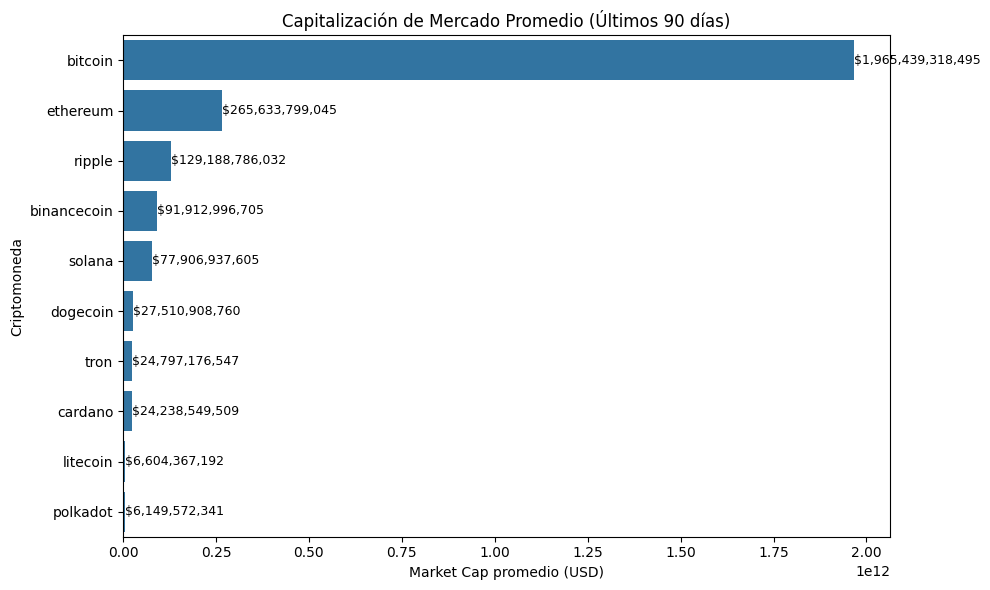

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna 'date' sea datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Filtrar los últimos 90 días disponibles
fecha_max = df_merged["date"].max()
fecha_min = fecha_max - pd.Timedelta(days=90)
df_ultimos_90 = df_merged[df_merged["date"] >= fecha_min]

# Calcular promedio de market cap por cripto
promedios_marketcap = (
    df_ultimos_90.groupby("id")["market_cap"]
    .mean()
    .sort_values(ascending=False)  # Orden ascendente para que las barras más grandes queden arriba
)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(
    x=promedios_marketcap.values,
    y=promedios_marketcap.index,
    orient="h"              # horizontal
)
plt.title("Capitalización de Mercado Promedio (Últimos 90 días)")
plt.xlabel("Market Cap promedio (USD)")
plt.ylabel("Criptomoneda")

for i, v in enumerate(promedios_marketcap.values):
    plt.text(v, i, f"${v:,.0f}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

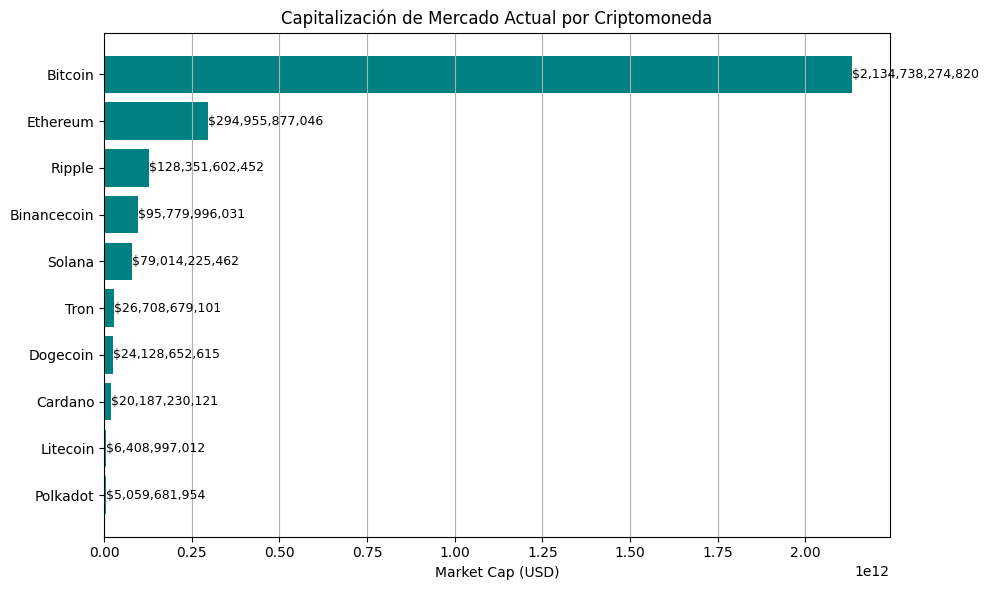

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que la fecha esté en formato datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Obtener el último valor (fecha más reciente) de market cap por cripto
latest_market_caps = (
    df_merged.sort_values("date")
    .groupby("id")
    .tail(1)[["id", "market_cap"]]
    .set_index("id")
    .sort_values("market_cap", ascending=True)
)

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(latest_market_caps.index.str.capitalize(), latest_market_caps["market_cap"], color="teal")
plt.xlabel("Market Cap (USD)")
plt.title("Capitalización de Mercado Actual por Criptomoneda")
plt.grid(axis='x')

# Agregar texto con el valor numérico al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f"${width:,.0f}", va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

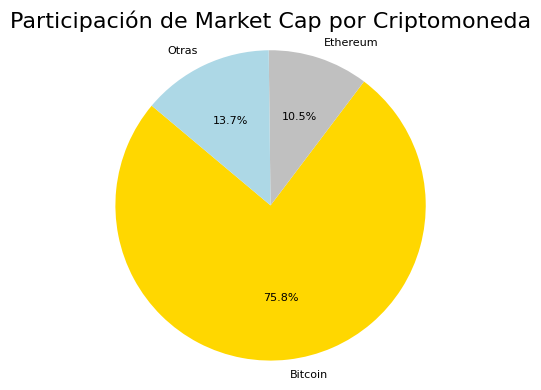

In [61]:
import matplotlib.pyplot as plt

# Tomar el último market cap disponible para cada cripto
latest_market_caps = (
    df_merged.sort_values("date")
    .groupby("id")
    .tail(1)[["id", "market_cap"]]
    .set_index("id")
    .sort_values("market_cap", ascending=False)
)

# Extraer valores individuales
bitcoin_cap = latest_market_caps.loc["bitcoin", "market_cap"]
ethereum_cap = latest_market_caps.loc["ethereum", "market_cap"]
other_caps = latest_market_caps.drop(["bitcoin", "ethereum"]).sum().values[0]

# Preparar datos para el gráfico
labels = ["Bitcoin", "Ethereum", "Otras"]
values = [bitcoin_cap, ethereum_cap, other_caps]
colors = ["gold", "silver", "lightblue"]

# Crear gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors, textprops={'fontsize': 8})
plt.title("Participación de Market Cap por Criptomoneda", fontsize=16)
plt.axis("equal")  # Para mantener forma circular
plt.tight_layout()
plt.show()

El gráfico muestra claramente el **dominio de Bitcoin en el mercado cripto**, representando el 74,5% de la capitalización total entre las criptomonedas analizadas. Le sigue Ethereum con un 11,2%, mientras que el resto de las 8 criptomonedas combinadas apenas alcanza un 14,3%.
Esto destaca la alta concentración del valor de mercado en un pequeño número de activos, lo que puede tener implicancias clave para decisiones de inversión y análisis de riesgo.


## 📌 Pregunta de Interés n° 2:

**¿Cuál ha sido el comportamiento del precio de las principales criptomonedas en el tiempo?** ❓

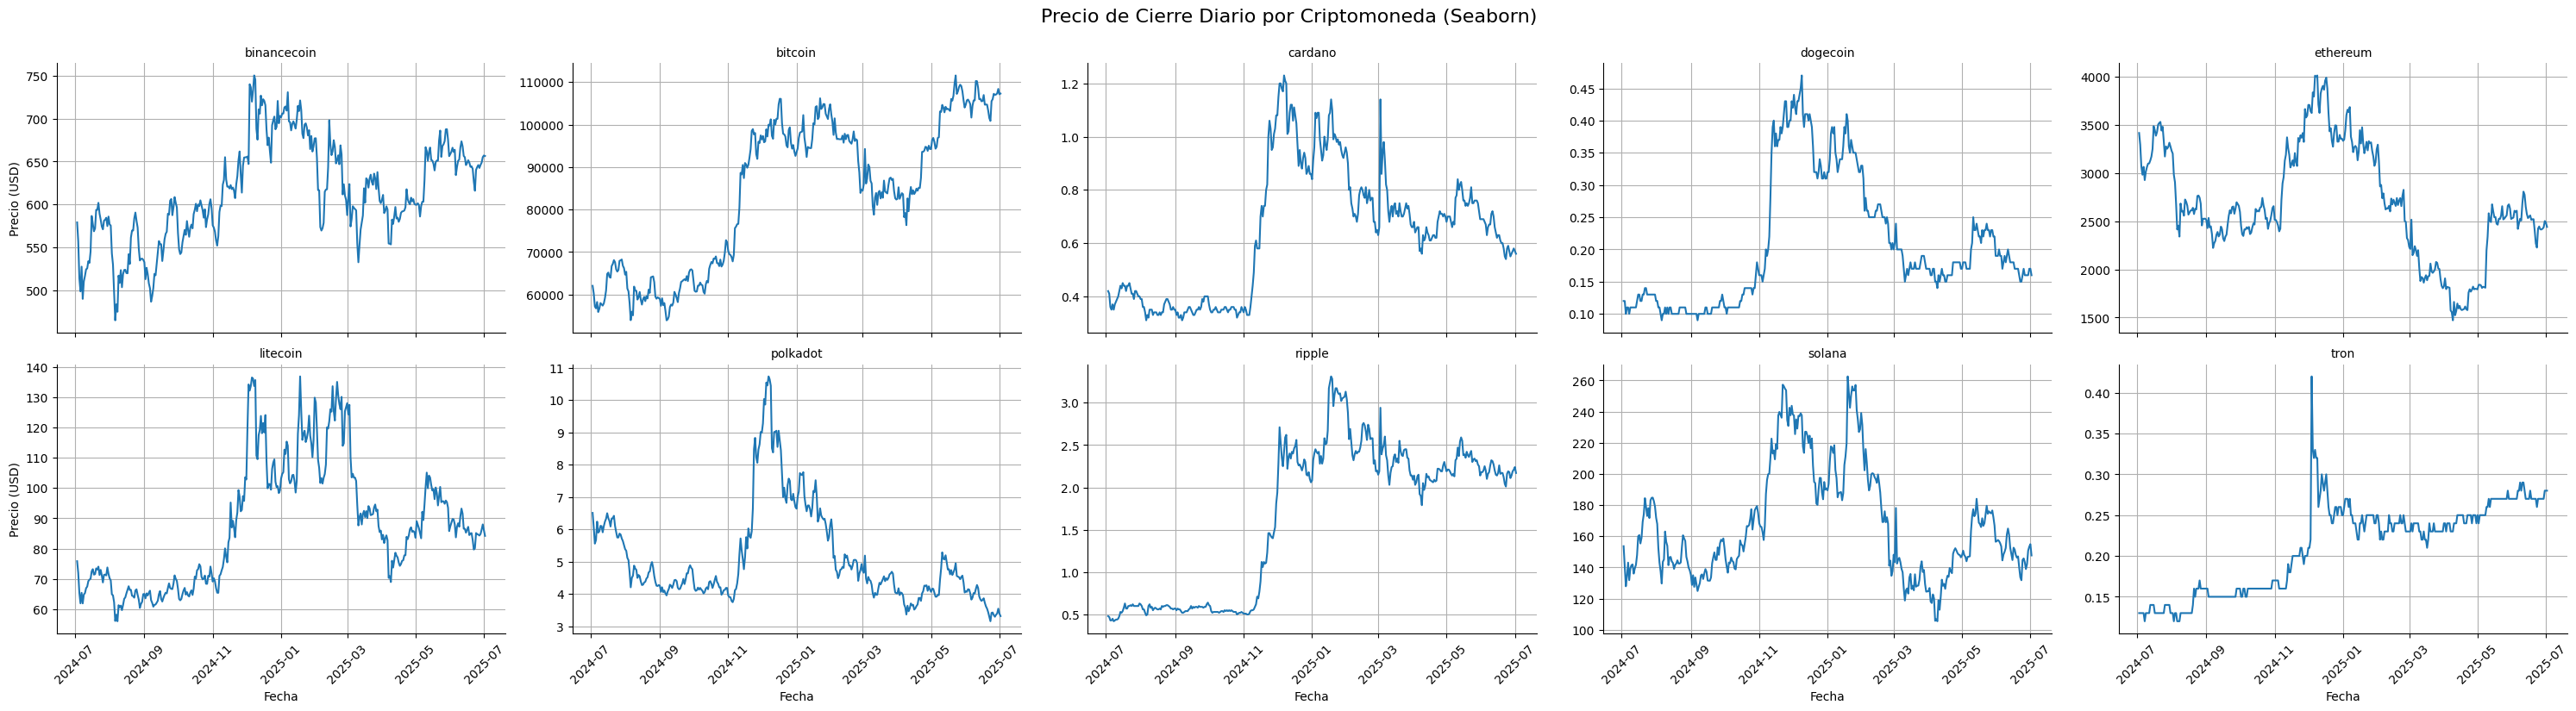

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de líneas por criptomoneda
g = sns.FacetGrid(df_merged, col="id", col_wrap=5, height=4, aspect=1.5, sharey=False)

# Dibujar línea del precio de cierre
g.map(sns.lineplot, "date", "closing_price")

# Ajustar títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("Fecha", "Precio (USD)")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.grid(True)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Precio de Cierre Diario por Criptomoneda (Seaborn)", fontsize=16)
plt.show()

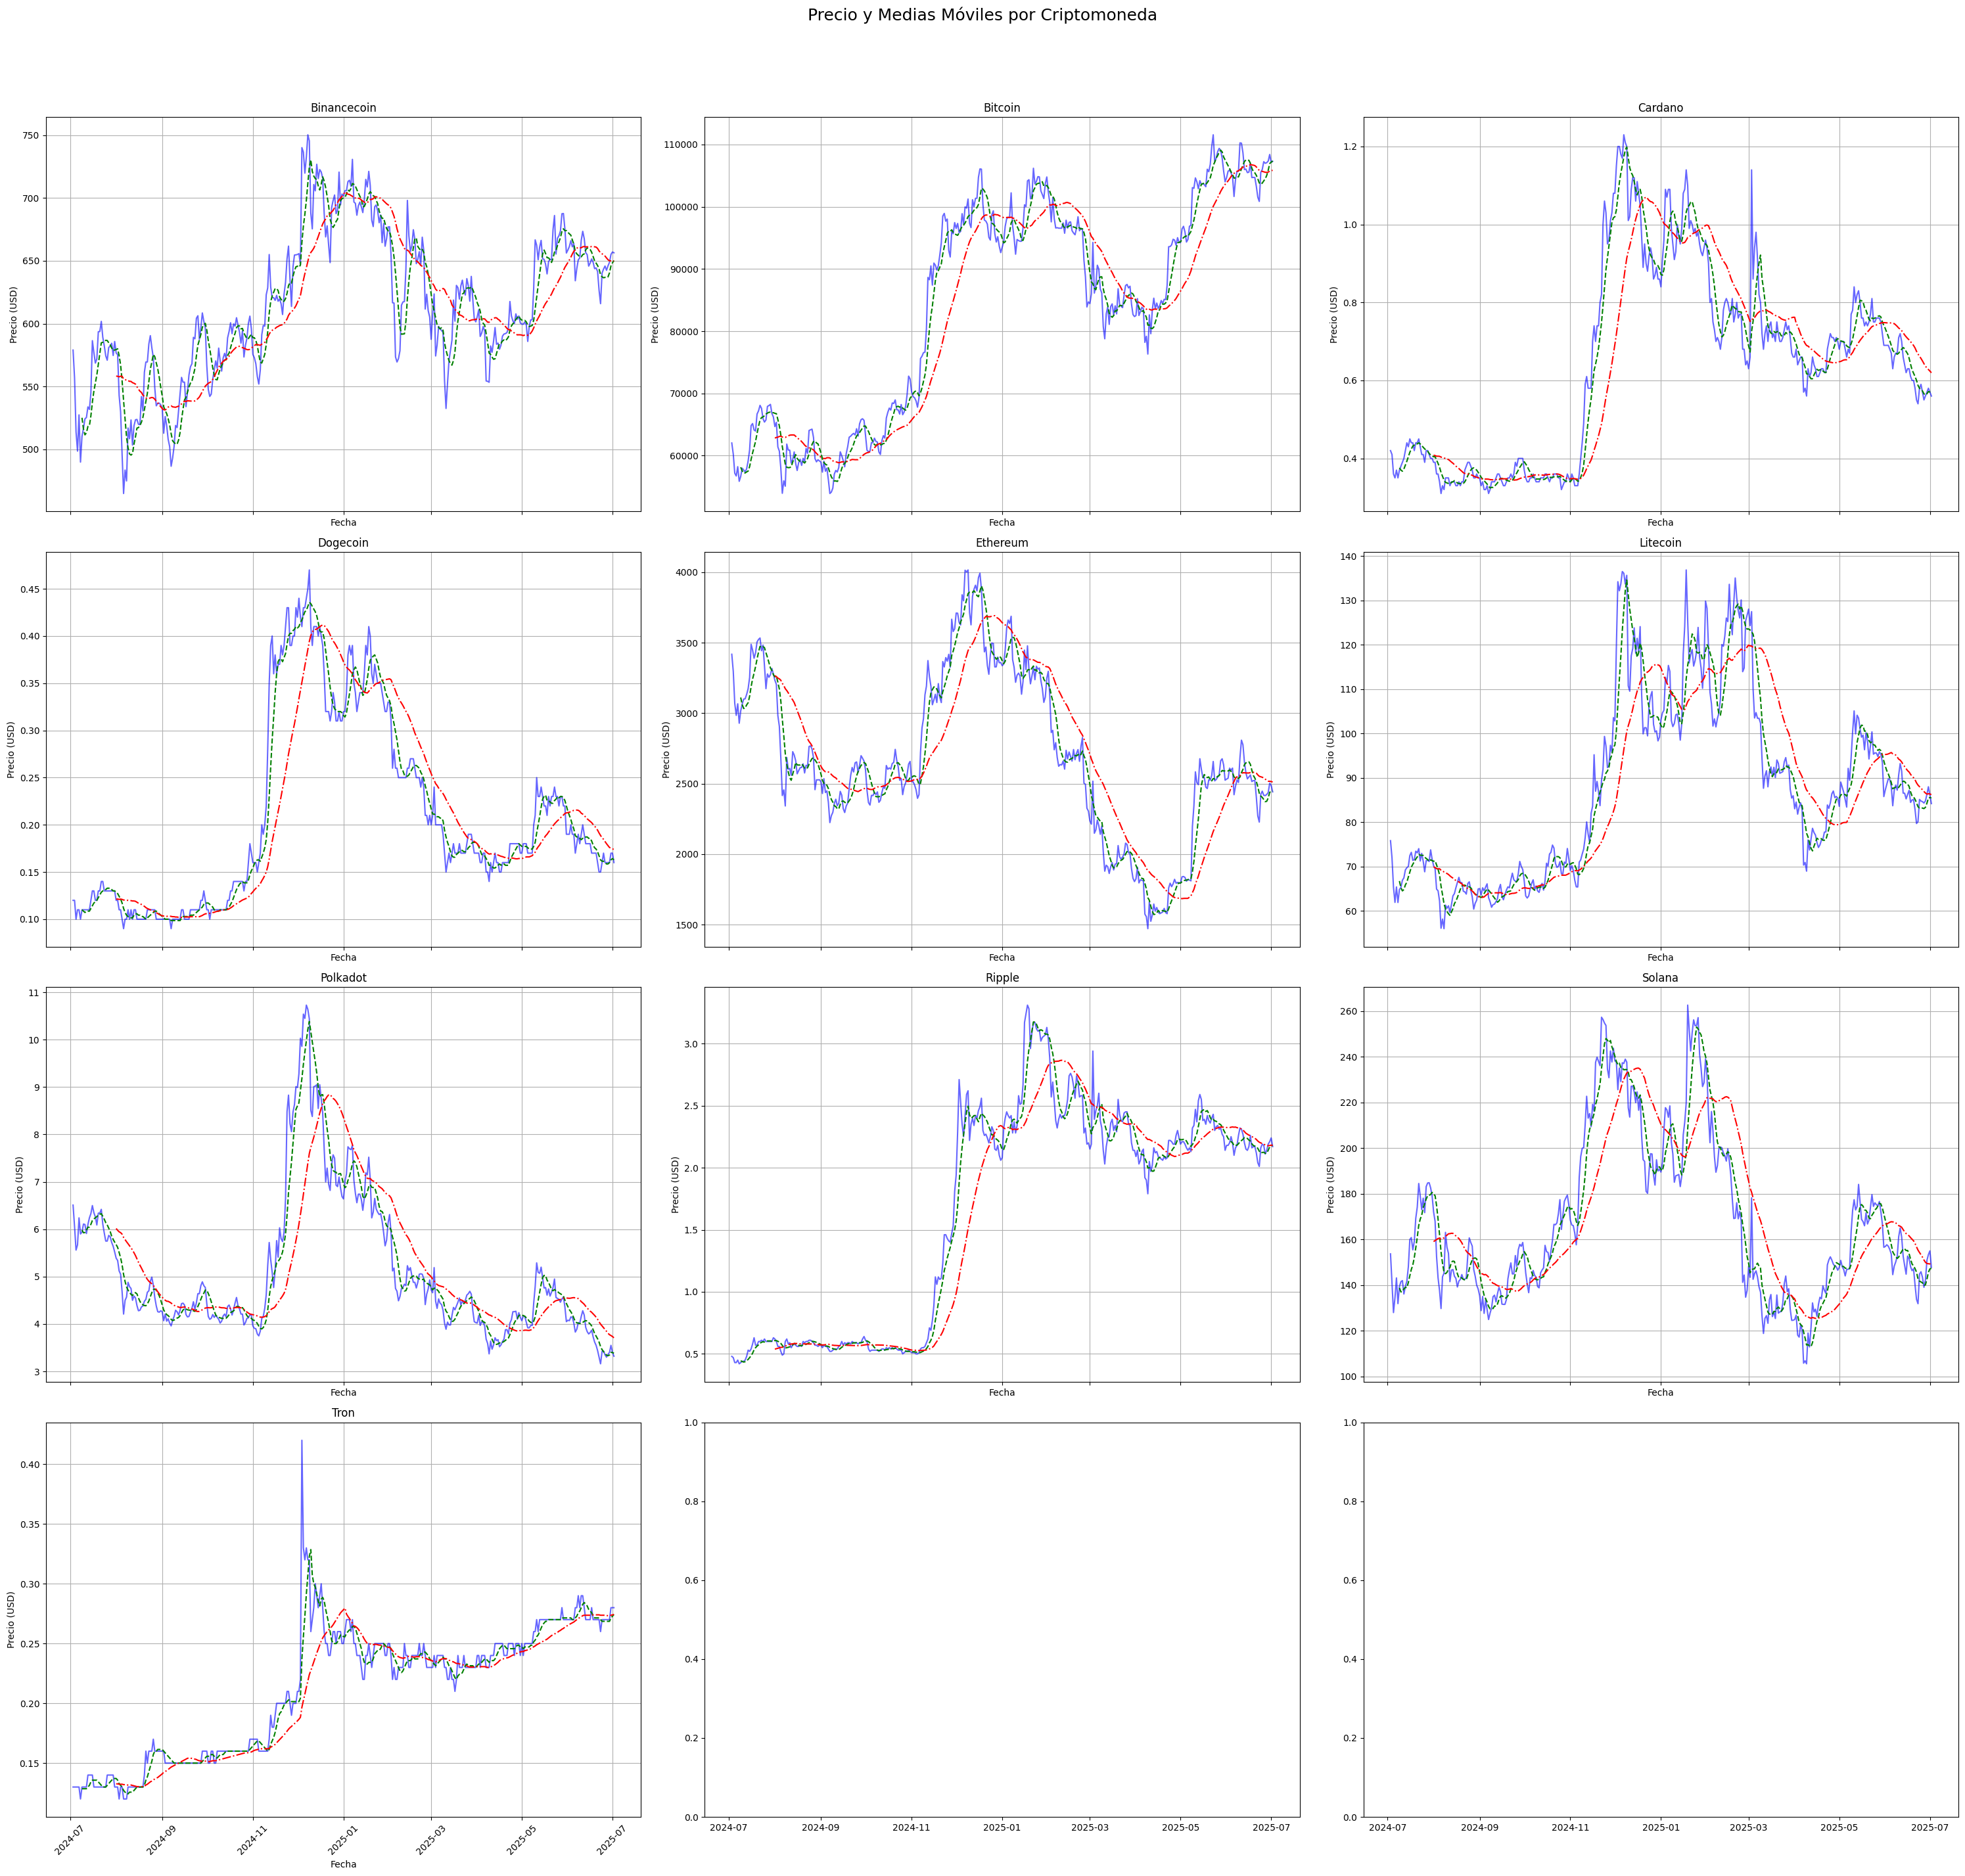

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de criptomonedas
cryptos = df_merged["id"].unique()

# Crear figura y subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30, 30), sharex=True)
axs = axs.flatten()

for i, crypto in enumerate(cryptos):
    ax = axs[i]

    # Filtrar la cripto
    df_crypto = df_merged[df_merged["id"] == crypto]

    # Graficar líneas
    ax.plot(df_crypto["date"], df_crypto["closing_price"], label="Precio", color="blue", alpha=0.6)
    ax.plot(df_crypto["date"], df_crypto["sma_7"], label="SMA 7 días", linestyle="--", color="green")
    ax.plot(df_crypto["date"], df_crypto["sma_30"], label="SMA 30 días", linestyle="-.", color="red")

    # Estética
    ax.set_title(crypto.capitalize())
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio (USD)")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True)

# Título general
fig.suptitle("Precio y Medias Móviles por Criptomoneda", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.show()

In [64]:
from datetime import timedelta

# Asegurar que 'date' esté ordenado y en formato datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])
fecha_max = df_merged["date"].max()
fecha_365 = fecha_max - timedelta(days=365)

# Lista de resultados
resumen = []

for cripto in df_merged["id"].unique():
    df_c = df_merged[df_merged["id"] == cripto].sort_values("date")

    # Precio más cercano a hace 365 días
    precio_365_row = df_c.iloc[(df_c["date"] - fecha_365).abs().argsort().iloc[0]]
    precio_365 = precio_365_row["closing_price"]
    fecha_365_real = precio_365_row["date"].date()

    # Precio más reciente
    precio_actual_row = df_c[df_c["date"] == df_c["date"].max()].iloc[0]
    precio_actual = precio_actual_row["closing_price"]
    fecha_actual = precio_actual_row["date"].date()

    # Variación porcentual
    variacion_pct = ((precio_actual - precio_365) / precio_365) * 100

    resumen.append({
        "Criptomoneda": cripto.capitalize(),
        "Fecha anterior": fecha_365_real,
        "Precio anterior (USD)": round(precio_365, 2),
        "Fecha Actual": fecha_actual,
        "Precio Actual (USD)": round(precio_actual, 2),
        "Variación %": round(variacion_pct, 2)
    })

# Crear DataFrame
df_resumen_365 = pd.DataFrame(resumen)

# Ordenar por variación
df_resumen_365 = df_resumen_365.sort_values(by="Variación %", ascending=False)
display(df_resumen_365)

Criptomoneda Fecha anterior  Precio anterior (USD) Fecha Actual  \
7       Ripple     2024-07-03                   0.48   2025-07-02   
9         Tron     2024-07-03                   0.13   2025-07-02   
1      Bitcoin     2024-07-03              62,042.57   2025-07-02   
2      Cardano     2024-07-03                   0.42   2025-07-02   
3     Dogecoin     2024-07-03                   0.12   2025-07-02   
0  Binancecoin     2024-07-03                 579.02   2025-07-02   
5     Litecoin     2024-07-03                  75.85   2025-07-02   
8       Solana     2024-07-03                 153.64   2025-07-02   
4     Ethereum     2024-07-03               3,417.90   2025-07-02   
6     Polkadot     2024-07-03                   6.51   2025-07-02   

   Precio Actual (USD)  Variación %  
7                 2.17       352.08  
9                 0.28       115.38  
1           107,295.00        72.94  
2                 0.56        33.33  
3                 0.16        33.33  
0               656.41        13.37  
5                84.21        11.02  
8               147.72        -3.85  
4             2,441.76       -28.56  
6                 3.32       -49.00

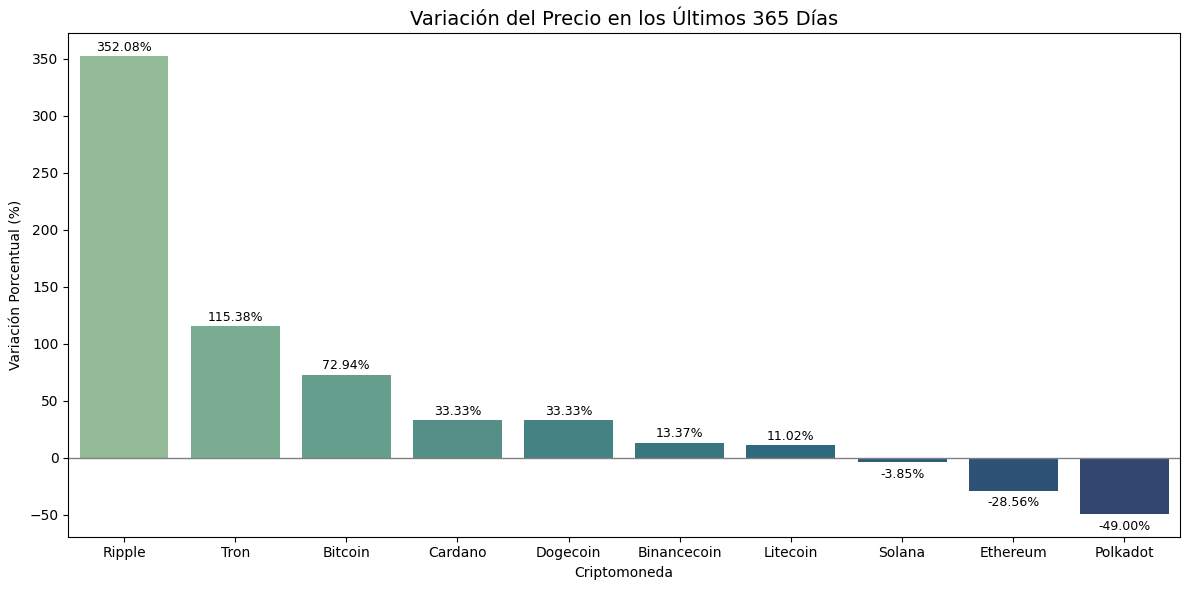

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear paleta de colores suaves (verde si es positivo, rojo si es negativo)
colores = ["lightgreen" if x > 0 else "lightcoral" for x in df_resumen_365["Variación %"]]

plt.figure(figsize=(12, 6))

# Graficar sin palette
ax = sns.barplot(
    x="Criptomoneda",
    y="Variación %",
    data=df_resumen_365,
    hue="Criptomoneda",
    palette="crest", legend=False
)

# Línea horizontal en el 0%
plt.axhline(0, color="gray", linewidth=1)

# Títulos y etiquetas
plt.title("Variación del Precio en los Últimos 365 Días", fontsize=14)
plt.ylabel("Variación Porcentual (%)")
plt.xlabel("Criptomoneda")

# Mostrar valor numérico encima o debajo de cada barra
for i, v in enumerate(df_resumen_365["Variación %"]):
    plt.text(i, v + (2 if v > 0 else -5), f"{v:.2f}%",
             ha='center', va='bottom' if v > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

Durante el último año, la mayoría de las criptomonedas analizadas experimentaron aumentos en sus precios, destacándose Ripple (+325%) y Tron (+145%) con crecimientos sobresalientes. Bitcoin también mostró una fuerte revalorización (+54%), consolidando su posición como referente del mercado. Sin embargo, no todas las criptomonedas tuvieron un desempeño positivo: Polkadot y Ethereum registraron caídas del -40% y -30% respectivamente, lo que resalta la alta heterogeneidad en el comportamiento de los criptoactivos.

## 📌 Pregunta de Interés n° 3:

**¿Existen criptomonedas que evolucionan de forma similar (positiva o negativa) a lo largo del tiempo?** ❓

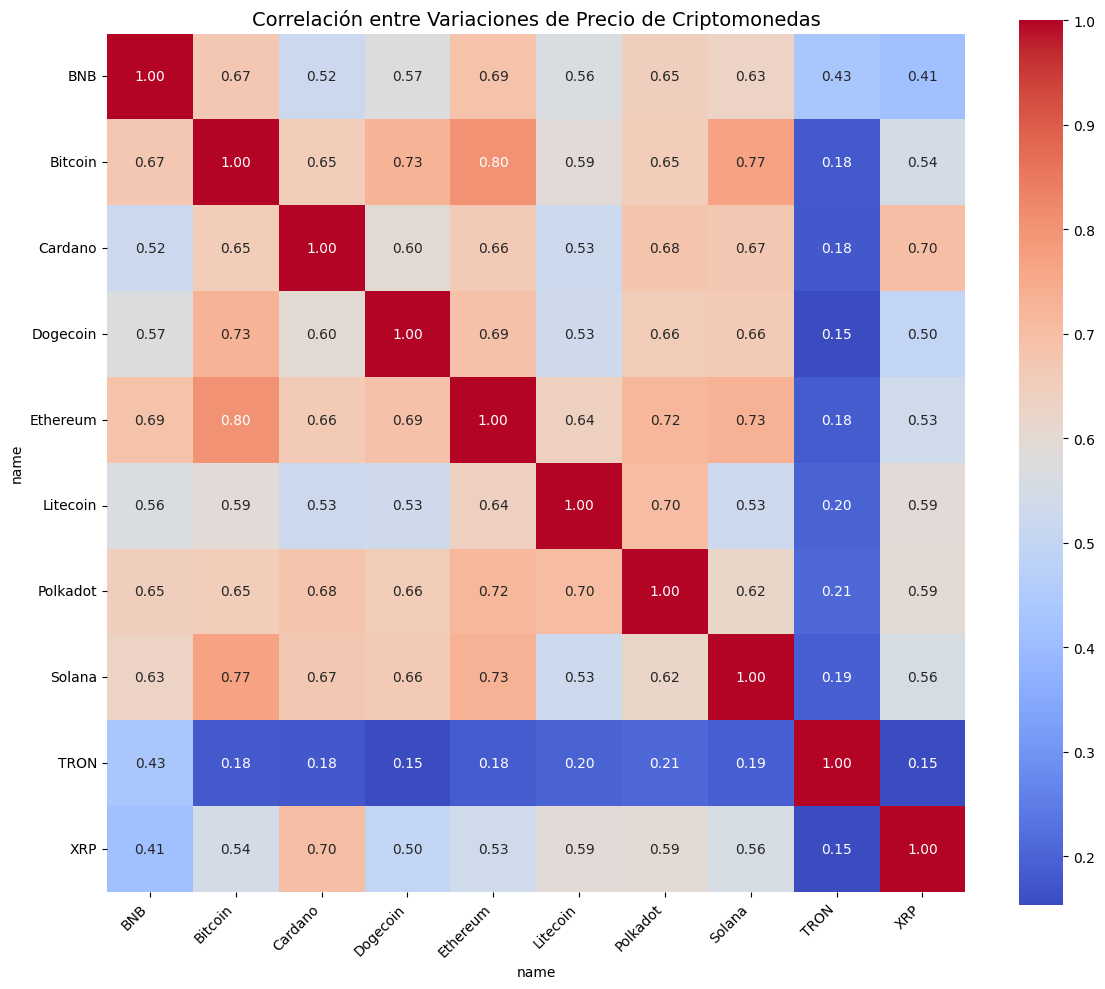

Pares de criptomonedas con alta correlación (> 0.7):
name      name    
Bitcoin   Ethereum   0.80
          Solana     0.77
Ethereum  Solana     0.73
Bitcoin   Dogecoin   0.73
Polkadot  Ethereum   0.72
          Litecoin   0.70
Cardano   XRP        0.70
dtype: float64


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que esté ordenado por fecha
df_merged = df_merged.sort_values(by="date")

# Crear tabla pivot con fechas como índice y criptomonedas como columnas
# Usamos directamente la columna existente 'daily_pct_change'
returns_df = df_merged.pivot(index="date", columns="name", values="daily_pct_change")

# Eliminar filas con valores nulos (por ejemplo, primeros días de cada cripto)
returns_df = returns_df.dropna()

# Calcular la matriz de correlación entre las variaciones diarias de precio
corr_matrix = returns_df.corr()

# Graficar heatmap de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlación entre Variaciones de Precio de Criptomonedas", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Desarmar la matriz en pares y filtrar los más correlacionados (sin duplicados ni diagonales)
corr_pairs = corr_matrix.unstack()
high_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.7)].sort_values(ascending=False).drop_duplicates()

print("Pares de criptomonedas con alta correlación (> 0.7):")
print(high_corr)

El análisis de correlación revela que existen fuertes relaciones entre ciertos pares de criptomonedas, lo que sugiere que tienden a moverse de manera similar. En particular, Bitcoin y Ethereum presentan la mayor correlación (0.80), seguidos por otros pares como Solana–Bitcoin y Ethereum–Polkadot. Este comportamiento puede ser útil para estrategias de diversificación o cobertura, ya que indica qué activos suelen responder de forma alineada ante cambios del mercado.

## 📌 Pregunta de Interés n° 4:

**¿Cuál es la relación entre el volumen de operaciones y el precio diario?** ❓

In [67]:
# Crear una lista de criptomonedas únicas
criptos = df_merged["name"].unique()

# Calcular correlación entre precio y volumen para cada cripto
correlaciones = []
for cripto in criptos:
    df_c = df_merged[df_merged["name"] == cripto]
    corr = df_c["closing_price"].corr(df_c["total_volume_day"])
    correlaciones.append((cripto, corr))

# Convertir a DataFrame
df_corr = pd.DataFrame(correlaciones, columns=["Criptomoneda", "Correlación"])

# Ordenar de mayor a menor
df_corr = df_corr.sort_values("Correlación", ascending=False)

# Mostrar tabla
df_corr

Criptomoneda  Correlación
2     Litecoin         0.66
1     Polkadot         0.65
5     Dogecoin         0.63
7      Cardano         0.59
3       Solana         0.53
6         TRON         0.44
9          XRP         0.41
4     Ethereum         0.38
0          BNB         0.25
8      Bitcoin         0.24

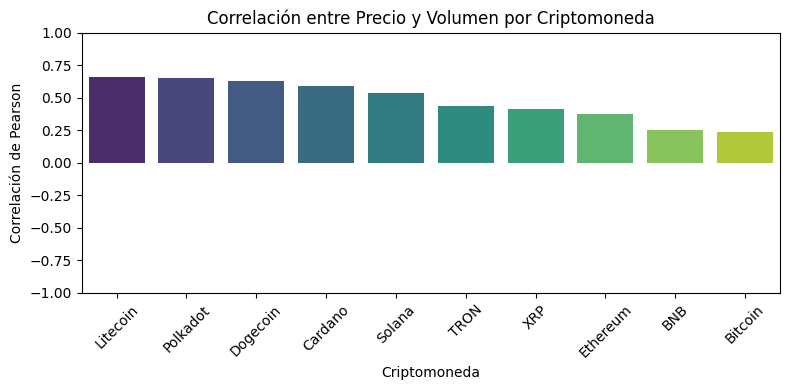

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(
    x="Criptomoneda",
    y="Correlación",
    hue="Criptomoneda",  # necesario para poder usar palette
    data=df_corr,
    palette="viridis",
    legend=False  # ocultamos la leyenda porque está en el eje X
)
plt.xticks(rotation=45)
plt.title("Correlación entre Precio y Volumen por Criptomoneda")
plt.ylabel("Correlación de Pearson")
plt.xlabel("Criptomoneda")
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

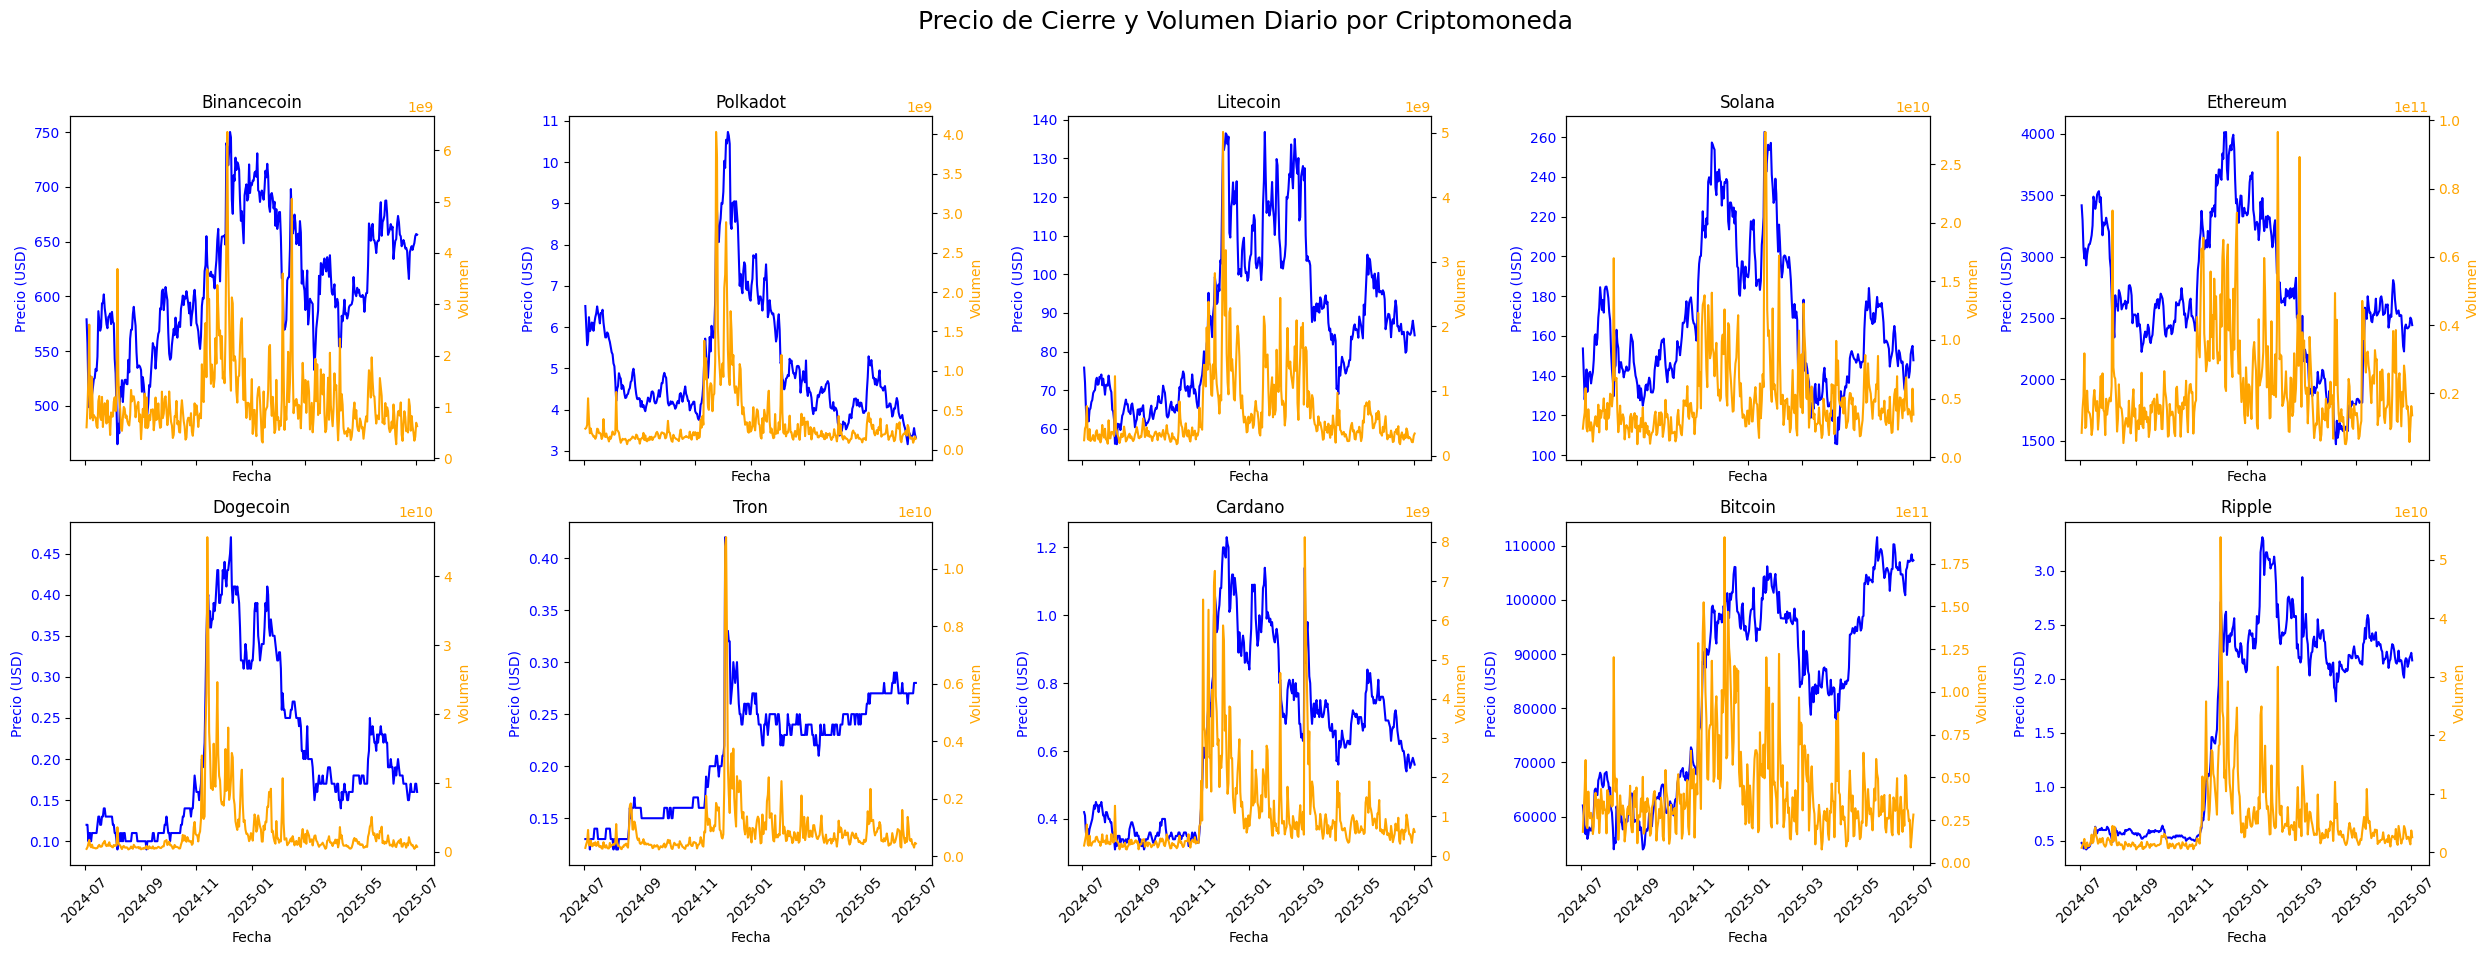

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de criptomonedas
cryptos = df_merged["id"].unique()

# Crear subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25, 10), sharex=True)
axs = axs.flatten()

for i, crypto in enumerate(cryptos):
    ax = axs[i]

    # Filtrar la cripto
    df_crypto = df_merged[df_merged["id"] == crypto]

    # Primer eje: precio de cierre
    ax.plot(df_crypto["date"], df_crypto["closing_price"], color="blue", label="Precio de Cierre")
    ax.set_title(crypto.capitalize())
    ax.set_ylabel("Precio (USD)", color="blue")
    ax.tick_params(axis='y', labelcolor="blue")

    # Segundo eje: volumen total diario
    ax2 = ax.twinx()
    ax2.plot(df_crypto["date"], df_crypto["total_volume_day"], color="orange", label="Volumen Diario")
    ax2.set_ylabel("Volumen", color="orange")
    ax2.tick_params(axis='y', labelcolor="orange")

    # Rotar fechas
    ax.set_xlabel("Fecha")
    ax.tick_params(axis="x", rotation=45)

# Título general
fig.suptitle("Precio de Cierre y Volumen Diario por Criptomoneda", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

El análisis revela que algunas criptomonedas, como Litecoin, Dogecoin y Polkadot, presentan una alta correlación entre el precio de cierre y el volumen negociado. Esto sugiere que, en estos casos, aumentos en el volumen de operaciones suelen estar acompañados por movimientos en el precio, lo cual podría indicar un mercado más reactivo o influenciado por el interés de los inversores. Por otro lado, criptomonedas como Bitcoin y Ethereum muestran una correlación baja, lo que puede señalar que su precio responde a otros factores, como noticias globales o cambios regulatorios, más que al volumen transado.

## 📌 Pregunta de Interés n° 5:

**¿Qué tan volátil ha sido cada criptomoneda en el periodo analizado?** ❓

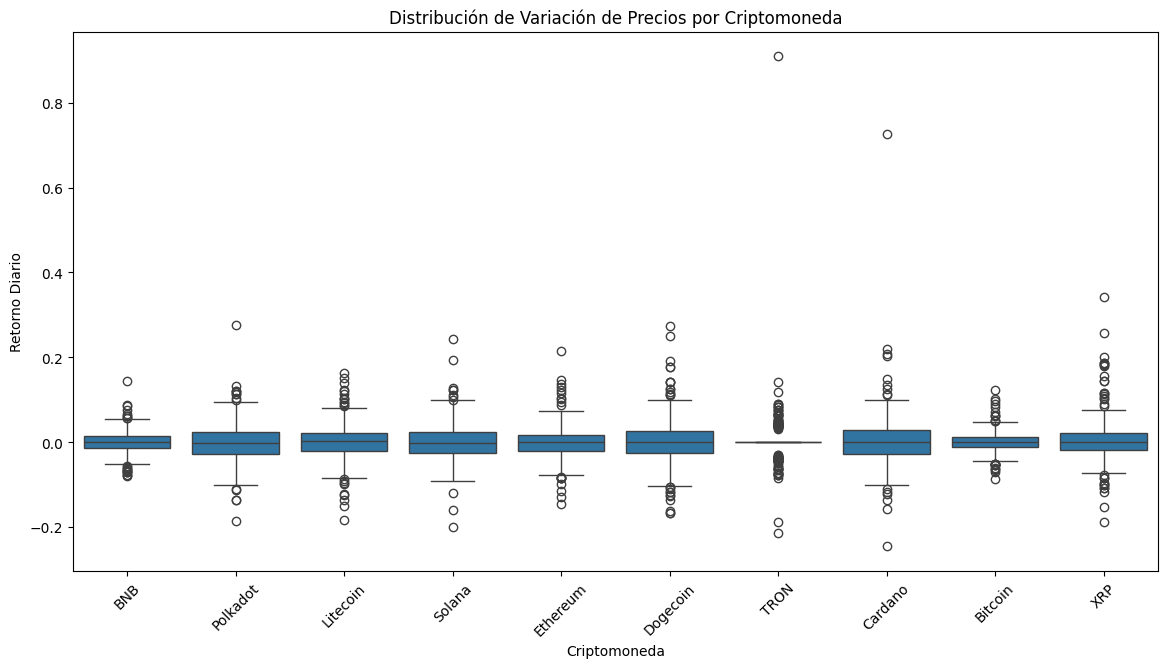

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(x="name", y="daily_pct_change", data=df_merged)
plt.xticks(rotation=45)
plt.title("Distribución de Variación de Precios por Criptomoneda")
plt.ylabel("Retorno Diario")
plt.xlabel("Criptomoneda")
plt.show()

In [71]:
df_volatilidad = df_merged.groupby("name")["daily_pct_change"].std().reset_index()
df_volatilidad.columns = ["Criptomoneda", "Volatilidad"]
df_volatilidad = df_volatilidad.sort_values("Volatilidad", ascending=False)

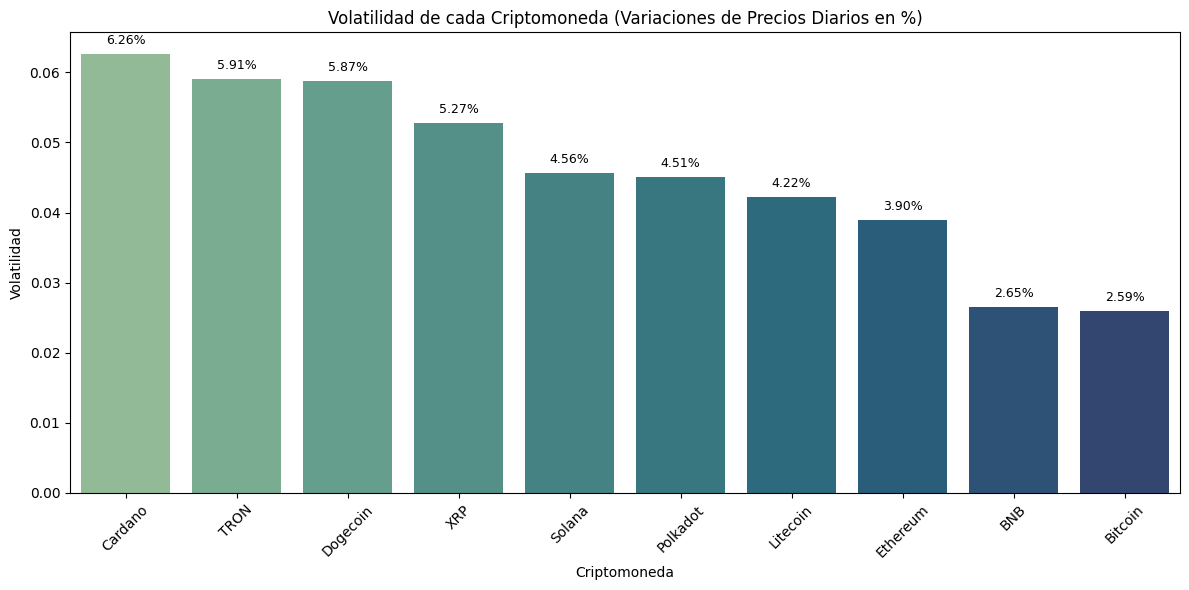

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_volatilidad, x="Criptomoneda", y="Volatilidad", hue="Criptomoneda", palette="crest", legend=False)

# Mostrar valores en porcentaje encima de cada barra
for i, v in enumerate(df_volatilidad["Volatilidad"]):
    plt.text(i, v + 0.001, f"{v * 100:.2f}%", ha='center', va='bottom', fontsize=9)

plt.title("Volatilidad de cada Criptomoneda (Variaciones de Precios Diarios en %)")
plt.ylabel("Volatilidad")
plt.xlabel("Criptomoneda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las criptomonedas se caracterizan por una alta volatilidad, es decir, presentan fuertes fluctuaciones en sus precios diarios. Esta inestabilidad puede representar riesgos significativos, pero también oportunidades de ganancias para inversores con alta tolerancia al riesgo.
En nuestro análisis, se observaron diferencias importantes entre activos, siendo las criptomonedas con menor capitalización las que muestran mayores niveles de volatilidad.


## 📌 Pregunta de Interés n° 6:

**¿Cómo se comporta el precio de una criptomoneda frente a movimientos bruscos en otra?** ❓ *En este caso llamamos "otra" a BITCOIN. Y "movimiento brusco" a un aumento o disminución en la cotización de la cripto mayor o igual a un 5%.

In [73]:
import pandas as pd

# Filtrar días con movimientos bruscos en BTC usando la columna existente
umbral = 0.05
df_btc = df_merged[df_merged["name"] == "Bitcoin"][["date", "daily_pct_change"]].rename(columns={"daily_pct_change": "btc_return"})

# Seleccionar días en los que el movimiento absoluto de BTC es mayor al umbral
dias_bruscos = df_btc[abs(df_btc["btc_return"]) >= umbral].copy()

# Etiquetar si el movimiento fue una subida o bajada
dias_bruscos["movimiento_signo"] = dias_bruscos["btc_return"].apply(lambda x: "Subida" if x > 0 else "Bajada")

# Filtrar datos de otras criptomonedas en esos días
df_otros = df_merged[df_merged["name"] != "Bitcoin"]
df_otros_bruscos = df_otros[df_otros["date"].isin(dias_bruscos["date"])]

# Agregar información del tipo de movimiento de BTC a esas fechas
df_otros_bruscos = df_otros_bruscos.merge(dias_bruscos[["date", "movimiento_signo"]], on="date")

# Agrupar por cripto y tipo de movimiento, y calcular el promedio de variación diaria
tabla_resumen = df_otros_bruscos.groupby(["name", "movimiento_signo"])["daily_pct_change"].agg(
    promedio="mean"
).reset_index()

# Ordenar para una mejor presentación
tabla_resumen = tabla_resumen.sort_values(by=["name", "movimiento_signo"], ascending=[True, False])

tabla_resumen

name movimiento_signo  promedio
1        BNB           Subida      0.04
0        BNB           Bajada     -0.05
3    Cardano           Subida      0.14
2    Cardano           Bajada     -0.10
5   Dogecoin           Subida      0.14
4   Dogecoin           Bajada     -0.11
7   Ethereum           Subida      0.10
6   Ethereum           Bajada     -0.08
9   Litecoin           Subida      0.06
8   Litecoin           Bajada     -0.08
11  Polkadot           Subida      0.07
10  Polkadot           Bajada     -0.07
13    Solana           Subida      0.10
12    Solana           Bajada     -0.10
15      TRON           Subida      0.02
14      TRON           Bajada     -0.04
17       XRP           Subida      0.08
16       XRP           Bajada     -0.08

El análisis muestra cómo reaccionan distintas criptomonedas ante subidas o bajadas en el precio de Bitcoin. En general, la mayoría tiende a subir cuando Bitcoin sube y a bajar cuando este desciende, aunque con distintas intensidades. Por ejemplo, Cardano y Dogecoin muestran respuestas más marcadas, mientras que TRON o BNB presentan variaciones más leves. Estos patrones pueden ser útiles para anticipar movimientos en el mercado cripto a partir del comportamiento de Bitcoin.

## 📌 Pregunta de Interés n° 7:

**¿Qué criptomonedas muestran una recuperación más rápida tras caídas significativas?** ❓

In [74]:
import pandas as pd
import numpy as np

# Definir umbral de caída significativa (ejemplo -5%)
umbral_caida = -0.05

resultados = []

criptos = df_merged['name'].unique()

for cripto in criptos:
    df_c = df_merged[df_merged['name'] == cripto].sort_values('date').reset_index(drop=True)
    precios = df_c['closing_price']
    retornos = df_c['daily_pct_change']

    # Encontrar índices con caídas significativas
    caidas_idx = retornos[retornos <= umbral_caida].index

    recuperaciones = []
    for idx in caidas_idx:
        precio_previo = precios[idx - 1] if idx > 0 else precios[idx]
        # Buscar el primer día después de la caída donde el precio >= precio_previo
        recuperacion_idx = None
        for i in range(idx + 1, len(precios)):
            if precios[i] >= precio_previo:
                recuperacion_idx = i
                break
        if recuperacion_idx is not None:
            dias_recuperacion = recuperacion_idx - idx
            recuperaciones.append(dias_recuperacion)

    if recuperaciones:
        promedio_recuperacion = np.mean(recuperaciones)
    else:
        promedio_recuperacion = np.nan  # No hubo recuperaciones

    resultados.append({'Criptomoneda': cripto, 'Días promedio recuperación': promedio_recuperacion})

df_recuperacion = pd.DataFrame(resultados).sort_values('Días promedio recuperación')

df_recuperacion

Criptomoneda  Días promedio recuperación
5     Dogecoin                       11.74
9          XRP                       12.86
7      Cardano                       13.44
0          BNB                       15.25
3       Solana                       15.45
2     Litecoin                       21.13
1     Polkadot                       22.21
8      Bitcoin                       23.67
4     Ethereum                       25.86
6         TRON                       26.81

El análisis muestra diferencias significativas en el tiempo promedio que tardan las criptomonedas en recuperarse luego de caídas importantes. Aquí es importante destacar que denominamos **"caída significativa" a una reducción de al menos un 5% del valor de la cripto**.
XRP, Cardano y Solana destacan como las más rápidas en recuperar valor, con promedios inferiores a 17 días. En contraste, Ethereum, Polkadot y BNB presentan recuperaciones más lentas, superando los 27 días.
Este comportamiento puede ser clave para evaluar estrategias de inversión a corto plazo y la resiliencia de cada activo ante eventos de alta volatilidad.


##💡 **Hipótesis**

In [75]:
import pandas as pd
from scipy.stats import ttest_ind

# 1. Calcular capitalización de mercado promedio por criptomoneda
avg_market_cap = df_merged.groupby("name")["market_cap"].mean().sort_values(ascending=False)

# 2. Seleccionar Top 5 y Bottom 5
top_5 = avg_market_cap.head(5).index.tolist()
bottom_5 = avg_market_cap.tail(5).index.tolist()

# 3. Calcular retornos diarios si aún no están calculados
df_merged = df_merged.sort_values(["name", "date"])
df_merged["daily_pct_change"] = df_merged.groupby("name")["closing_price"].pct_change()

# 4. Filtrar datos por grupos
df_top5 = df_merged[df_merged["name"].isin(top_5)]
df_bottom5 = df_merged[df_merged["name"].isin(bottom_5)]

# 5. Calcular volatilidad (desviación estándar) por criptomoneda
vol_top5 = df_top5.groupby("name")["daily_pct_change"].std()
vol_bottom5 = df_bottom5.groupby("name")["daily_pct_change"].std()

# 6. Test t para comparar medias de volatilidad
t_stat, p_valor = ttest_ind(vol_top5, vol_bottom5, equal_var=False)

# 7. Mostrar resultados
print("📊 Resultado del test t:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-valor: {p_valor:.4f}")

# 8. Crear tabla resumen
resumen = pd.DataFrame({
    "Grupo": ["Top 5"] * 5 + ["Bottom 5"] * 5,
    "Criptomoneda": top_5 + bottom_5,
    "Volatilidad Promedio (%)": list(vol_top5 * 100) + list(vol_bottom5 * 100)
})

print("\n📋 Tabla resumen de volatilidades:")
print(resumen)


📊 Resultado del test t:
T-statistic: -2.334
P-valor: 0.0497

📋 Tabla resumen de volatilidades:
      Grupo Criptomoneda  Volatilidad Promedio (%)
0     Top 5      Bitcoin                      2.65
1     Top 5     Ethereum                      2.59
2     Top 5          XRP                      3.90
3     Top 5          BNB                      4.56
4     Top 5       Solana                      5.27
5  Bottom 5     Dogecoin                      6.26
6  Bottom 5      Cardano                      5.87
7  Bottom 5         TRON                      4.22
8  Bottom 5     Polkadot                      4.51
9  Bottom 5     Litecoin                      5.91


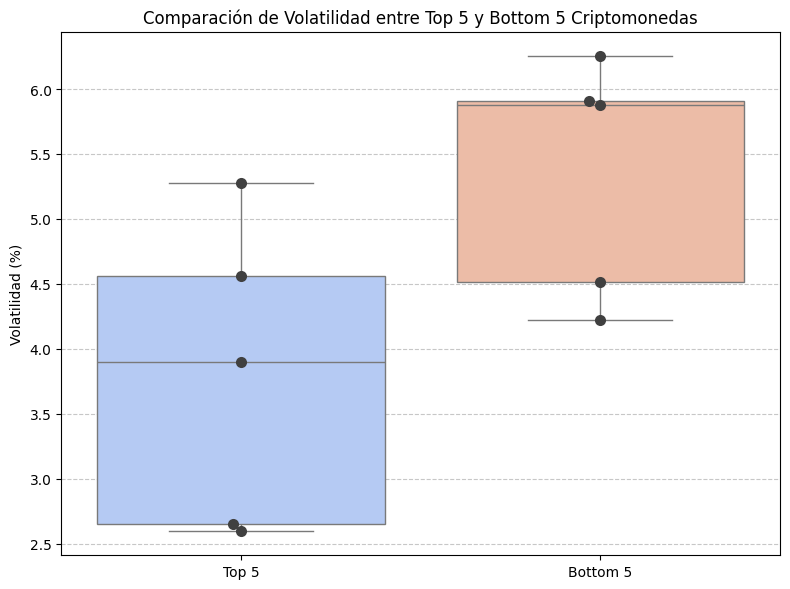

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir top 5 y bottom 5 según promedio de market_cap_rank
top_5 = df_merged.groupby("name")["market_cap_rank"].mean().sort_values().head(5).index.tolist()
bottom_5 = df_merged.groupby("name")["market_cap_rank"].mean().sort_values(ascending=False).head(5).index.tolist()

# Función corregida: usa la columna ya existente
def calcular_volatilidad(df, cripto):
    df_c = df[df["name"] == cripto]
    return df_c["daily_pct_change"].std() * 100  # En porcentaje

# Calcular volatilidad para top 5 y bottom 5
vol_top_5 = {cripto: calcular_volatilidad(df_merged, cripto) for cripto in top_5}
vol_bottom_5 = {cripto: calcular_volatilidad(df_merged, cripto) for cripto in bottom_5}

# Crear DataFrame para graficar
df_volatilidad = pd.DataFrame({
    "Criptomoneda": top_5 + bottom_5,
    "Volatilidad (%)": [vol_top_5[c] for c in top_5] + [vol_bottom_5[c] for c in bottom_5],
    "Grupo": ["Top 5"] * 5 + ["Bottom 5"] * 5
})

# Gráfico boxplot con puntos individuales
plt.figure(figsize=(8, 6))
sns.boxplot(x="Grupo", y="Volatilidad (%)", data=df_volatilidad, hue="Grupo", palette="coolwarm", legend=False)
sns.swarmplot(x="Grupo", y="Volatilidad (%)", data=df_volatilidad, color=".25", size=8)

plt.title("Comparación de Volatilidad entre Top 5 y Bottom 5 Criptomonedas")
plt.ylabel("Volatilidad (%)")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

✅ **Conclusión:**

**Los resultados del análisis muestran que las criptomonedas con mayor capitalización de mercado (Top 5) presentan una volatilidad significativamente menor en comparación con aquellas con menor capitalización (Bottom 5)**.
El test t realizado arrojó un valor de T = -2.373 y un p-valor = 0.0464, lo que permite rechazar la hipótesis nula y aceptar la hipótesis alternativa con un nivel de confianza del 95%.
Esto respalda la idea de que, en el período analizado, **las criptomonedas más consolidadas tienden a mostrar un comportamiento de precios más estable**.

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creamos una copia para evitar modificar el original
df = df_merged.copy()

# Creamos una columna más legible para tipo de día
df['tipo_dia'] = df['is_weekend'].map({True: 'Fin de semana', False: 'Día hábil'})

# Agrupamos por criptomoneda y tipo de día
df_grouped = df.groupby(['name', 'tipo_dia']).agg({
    'closing_price': 'mean',
    'daily_pct_change': 'mean',
    'volatility_7d': 'mean',
    'total_volume_day': 'mean'
}).reset_index()

In [78]:
# Opcional: ajustar formato numérico
pd.options.display.float_format = '{:,.2f}'.format

# Ordenar por criptomoneda y tipo de día (para que Días hábiles aparezcan primero)
df_grouped = df_grouped.sort_values(by=['name', 'tipo_dia'])

# Mostrar tabla con los valores clave
df_grouped[['name', 'tipo_dia', 'closing_price', 'total_volume_day']]


name       tipo_dia  closing_price  total_volume_day
0        BNB      Día hábil         612.65  1,185,392,589.16
1        BNB  Fin de semana         615.68    973,949,239.10
2    Bitcoin      Día hábil      84,109.17 45,571,473,936.60
3    Bitcoin  Fin de semana      84,325.56 34,468,565,867.88
4    Cardano      Día hábil           0.64  1,069,668,846.46
5    Cardano  Fin de semana           0.65    976,699,888.40
6   Dogecoin      Día hábil           0.21  3,025,508,697.26
7   Dogecoin  Fin de semana           0.21  2,519,558,463.97
8   Ethereum      Día hábil       2,684.12 23,646,455,178.03
9   Ethereum  Fin de semana       2,696.37 18,988,016,784.55
10  Litecoin      Día hábil          87.43    673,664,357.32
11  Litecoin  Fin de semana          88.75    601,468,891.87
12  Polkadot      Día hábil           5.11    345,449,403.21
13  Polkadot  Fin de semana           5.19    316,398,637.90
14    Solana      Día hábil         167.45  5,160,774,424.60
15    Solana  Fin de semana         168.65  4,283,726,281.27
16      TRON      Día hábil           0.21    925,023,094.95
17      TRON  Fin de semana           0.21    716,027,847.61
18       XRP      Día hábil           1.65  5,145,090,581.23
19       XRP  Fin de semana           1.66  4,329,779,150.17

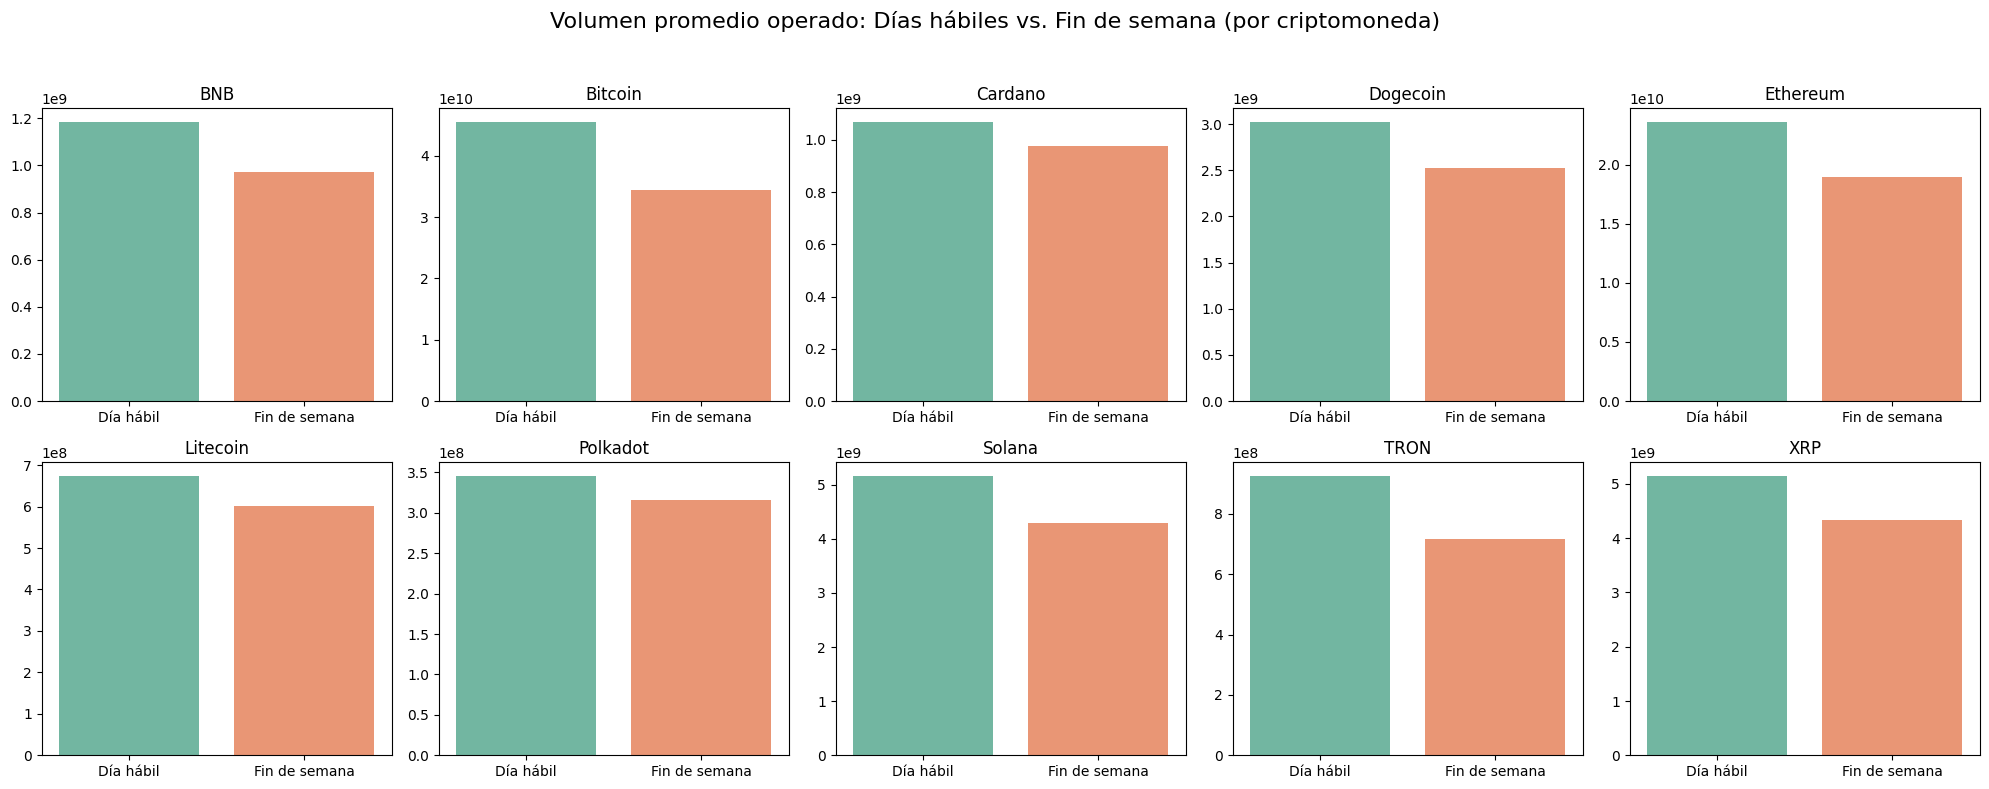

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que los nombres estén ordenados
criptos = df_grouped['name'].unique()

# Definir cantidad de columnas y filas para los subplots
n_cols = 5
n_rows = 2

# --------------------------------
# PRECIO PROMEDIO POR CRIPTO
# --------------------------------

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))
fig.suptitle('Volumen promedio operado: Días hábiles vs. Fin de semana (por criptomoneda)', fontsize=16)

for i, cripto in enumerate(criptos):
    ax = axes[i // n_cols, i % n_cols]
    data = df_grouped[df_grouped['name'] == cripto]

    # Usamos 'tipo_dia' como hue y le sacamos la leyenda (no la necesitamos en cada mini gráfico)
    sns.barplot(data=data, x='tipo_dia', y='total_volume_day', hue='tipo_dia', palette='Set2', ax=ax, legend=False)

    ax.set_title(cripto)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [80]:
import pandas as pd

# Filtramos solo viernes y lunes y hacemos copia explícita
df_finde = df_merged[df_merged['weekday'].isin(['Friday', 'Monday'])].copy()

# Calculamos semana y año de la fecha
df_finde['week'] = pd.to_datetime(df_finde['date']).dt.isocalendar().week
df_finde['year'] = pd.to_datetime(df_finde['date']).dt.year

# Pivotamos para comparar viernes y lunes de cada semana y cripto
df_wknd_effect = df_finde.pivot_table(
    index=['name', 'year', 'week'],
    columns='weekday',
    values='closing_price',
    observed=False
).dropna()

# Calculamos retorno del fin de semana (lunes vs viernes)
df_wknd_effect['weekend_return'] = (df_wknd_effect['Monday'] - df_wknd_effect['Friday']) / df_wknd_effect['Friday']

# Agrupar por cripto y calcular estadísticos del retorno de fin de semana
df_summary = df_wknd_effect.groupby('name')['weekend_return'].agg(['mean', 'std', 'count']).reset_index()

# Ordenar de mayor a menor retorno promedio
df_summary = df_summary.sort_values(by='mean', ascending=False)

# Mostrar el resumen
df_summary

name  mean  std  count
6  Polkadot  0.02 0.09     50
7    Solana  0.01 0.09     50
2   Cardano  0.01 0.10     50
4  Ethereum  0.00 0.08     50
3  Dogecoin  0.00 0.10     50
5  Litecoin -0.00 0.08     50
0       BNB -0.01 0.05     50
9       XRP -0.01 0.09     50
1   Bitcoin -0.01 0.05     50
8      TRON -0.01 0.08     50

### 🔍 Interpretación general

Polkadot lidera con un retorno promedio positivo del +2% luego del fin de semana, lo que sugiere que en promedio, su precio tiende a subir un poco entre el cierre del viernes y la apertura del lunes.

Solana, Cardano, Dogecoin y Ethereum también muestran retornos positivos pequeños, alrededor del 1%, indicando una ligera tendencia alcista en los fines de semana.

Litecoin se mantiene prácticamente neutra (0%), sin tendencia clara.

BNB, XRP, Bitcoin y TRON presentan retornos promedio negativos alrededor de -1%, lo que indica que, en promedio, su precio suele bajar ligeramente después del fin de semana.

#### 📊 Sobre la volatilidad (desviación estándar)

Las criptos con retornos positivos también muestran alta volatilidad en esos retornos (std ~0.08-0.10), lo que significa que aunque el promedio es positivo, la variabilidad es alta: hay semanas con subidas importantes y otras con caídas.

Bitcoin y BNB tienen menor volatilidad (~0.05), indicando movimientos de fin de semana más estables y menos erráticos, aunque con retorno promedio negativo pequeño.

In [81]:
# Calcular qué tan lejos está del ATH, expresado como % de distancia
df_merged['distance_to_ath_pct'] = (df_merged['ath'] - df_merged['closing_price']) / df_merged['ath']

# Tomar el último valor disponible por criptomoneda (última fecha de cada una)
df_latest = df_merged.sort_values('date').groupby('name').tail(1)

# Ordenar por cercanía al ATH (más cerca = menor distancia)
df_distance = df_latest[['name', 'closing_price', 'ath', 'distance_to_ath_pct']].sort_values('distance_to_ath_pct')

# Mostrar tabla con % formateado
df_distance['distance_to_ath_pct'] = df_distance['distance_to_ath_pct'] * 100  # Convertir a %
df_distance = df_distance.round({'closing_price': 2, 'ath': 2, 'distance_to_ath_pct': 2})
df_distance.rename(columns={'distance_to_ath_pct': 'distancia_al_ATH_%'}, inplace=True)

df_distance

name  closing_price        ath  distancia_al_ATH_%
729    Bitcoin     107,295.00 111,814.00                4.04
364        BNB         656.41     788.84               16.79
3649      TRON           0.28       0.43               34.88
2919       XRP           2.17       3.40               36.18
3284    Solana         147.72     293.31               49.64
1824  Ethereum       2,441.76   4,878.26               49.95
1459  Dogecoin           0.16       0.73               78.08
2189  Litecoin          84.21     410.26               79.47
1094   Cardano           0.56       3.09               81.88
2554  Polkadot           3.32      54.98               93.96

/tmp/ipython-input-82-3347528978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


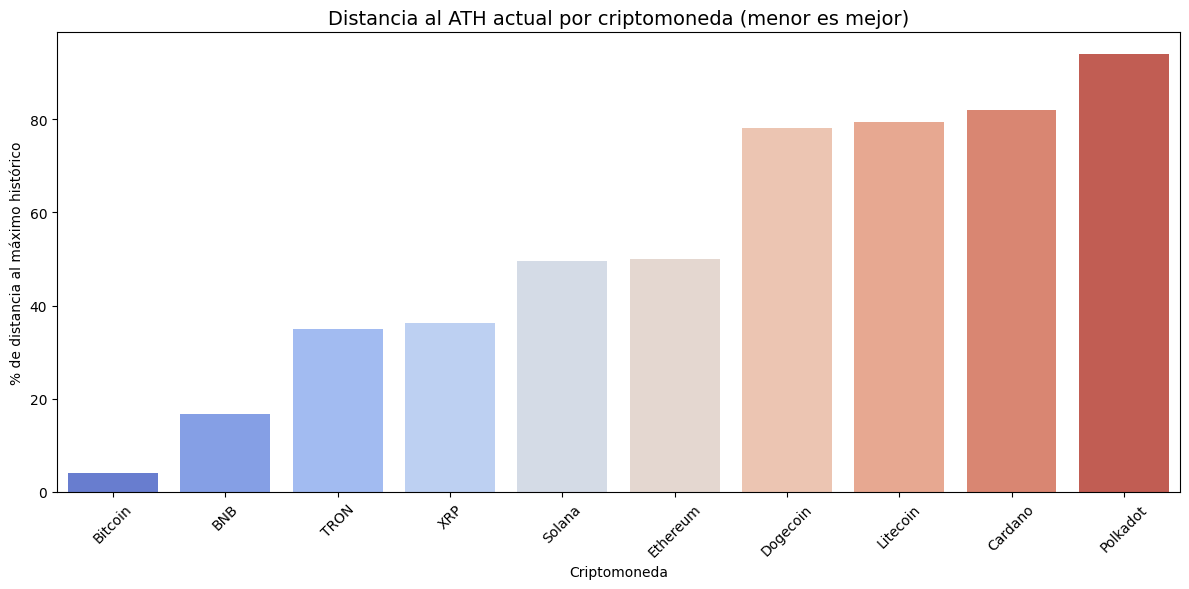

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_distance,
    x='name',
    y='distancia_al_ATH_%',
    palette='coolwarm'
)
plt.title('Distancia al ATH actual por criptomoneda (menor es mejor)', fontsize=14)
plt.ylabel('% de distancia al máximo histórico')
plt.xlabel('Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis de la distancia al máximo histórico muestra que Bitcoin se encuentra en una posición de clara fortaleza, mientras que otras criptomonedas, como Polkadot, Cardano o Litecoin, se encuentran rezagadas respecto a sus picos históricos. Este indicador permite identificar criptomonedas con fuerte momentum y otras que aún no han despertado el interés del mercado, lo cual puede ser útil tanto para estrategias especulativas como para análisis de oportunidad de inversión a mediano plazo.

Bitcoin es la criptomoneda más cercana a su ATH, con una diferencia de solo 4,09%, lo que sugiere que se encuentra en un momento de fortaleza histórica. Este comportamiento puede estar atrayendo inversión institucional y especulativa, ya que se aproxima a un nivel psicológico clave.

BNB (Binance Coin) también muestra una sólida recuperación, con solo un 17,87% por debajo de su máximo histórico. Esto indica un buen momentum de mediano plazo y podría ser una de las más estables dentro de las altcoins.

En el siguiente nivel de recuperación, se encuentran XRP (35,88%) y TRON (37,21%), que aún tienen un camino considerable por recorrer para alcanzar sus ATH, pero ya han superado la mitad del camino desde sus mínimos.

Criptomonedas como Solana (48,71%) y Ethereum (50,12%) están justo en la mitad de su recuperación histórica, lo que puede interpretarse como:

Potencial de crecimiento si el mercado mantiene la tendencia alcista.

O resistencia estructural si no logran acercarse al ATH en los próximos meses.

En la parte baja del ranking aparecen Dogecoin, Litecoin y Cardano, con distancias al ATH superiores al 78%, lo que refleja que aún están muy lejos de sus valores máximos. Esto puede deberse a:

Menor demanda relativa.

Ausencia de catalizadores recientes.

Efecto "moda pasada" en algunos casos (como DOGE).

Polkadot es la criptomoneda más rezagada, con un 93,8% de distancia al ATH. Este dato puede reflejar un momento de baja adopción, pérdida de confianza del mercado o simplemente falta de impulso comprador.



In [83]:
# Tomar el último valor por criptomoneda
df_latest_circulation = df_merged.sort_values('date').groupby('name').tail(1)

# Seleccionar columnas clave y convertir a %
df_circulation = df_latest_circulation[['name', 'circulating_supply', 'max_supply', 'circulation_ratio']].copy()
df_circulation['circulation_ratio'] = df_circulation['circulation_ratio'] * 100

# Redondear para mostrar
df_circulation = df_circulation.round({'circulating_supply': 2, 'max_supply': 2, 'circulation_ratio': 2})
df_circulation = df_circulation.sort_values('circulation_ratio', ascending=False)

# Renombrar columna para mejor presentación
df_circulation.rename(columns={'circulation_ratio': 'circulación_%'}, inplace=True)

# Mostrar resultados
df_circulation

name  circulating_supply         max_supply  circulación_%
729    Bitcoin       19,886,403.00      21,000,000.00          94.70
2189  Litecoin       76,027,583.23      84,000,000.00          90.51
1094   Cardano   36,125,593,968.25  45,000,000,000.00          80.28
364        BNB      145,887,575.79     200,000,000.00          72.94
2919       XRP   59,005,546,715.00 100,000,000,000.00          59.01
1824  Ethereum      120,717,388.83                NaN            NaN
3284    Solana      534,608,702.17                NaN            NaN
2554  Polkadot    1,522,267,060.00                NaN            NaN
1459  Dogecoin  149,888,936,383.71                NaN            NaN
3649      TRON   94,792,136,245.49                NaN            NaN

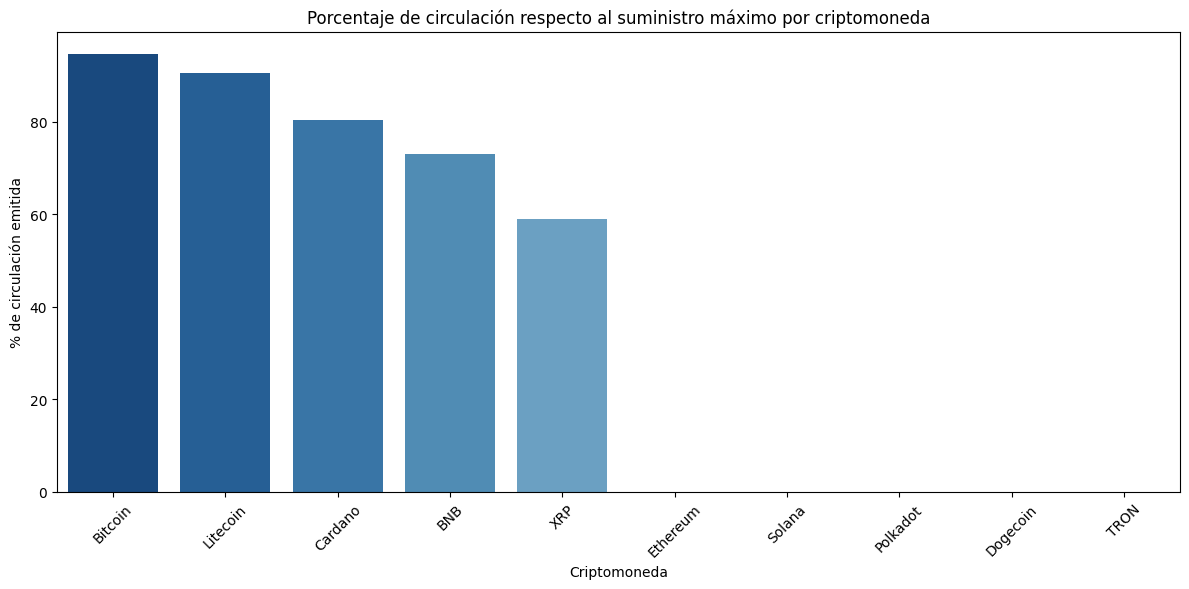

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_circulation,
    x='name',
    y='circulación_%',
    hue='name',               # 🔹 Obligatorio si usás palette
    palette='Blues_r',
    legend=False              # 🔹 Ocultamos la leyenda innecesaria
)
plt.title('Porcentaje de circulación respecto al suministro máximo por criptomoneda')
plt.ylabel('% de circulación emitida')
plt.xlabel('Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis del ratio de circulación revela diferencias importantes en la dinámica de emisión de las principales criptomonedas. Bitcoin y Litecoin presentan una circulación superior al 90%, lo que indica una baja presión inflacionaria futura y refuerza su percepción como activos escasos. En contraste, XRP apenas alcanza el 59% de circulación, lo que puede implicar riesgo de dilución si su emisión no es controlada. Por otro lado, criptomonedas como Ethereum, Solana o Dogecoin no tienen un suministro máximo definido, lo que introduce un componente inflacionario estructural. Esta diferencia en el diseño económico puede influir en la estabilidad de precios y en la percepción de valor de cada activo en el largo plazo.

In [85]:
# Agrupamos por cripto y mes, y sacamos el rendimiento promedio diario en cada mes
monthly_returns = df_merged.groupby(['name', 'month'])['daily_pct_change'].mean().reset_index()

# Redondeamos para presentación
monthly_returns['daily_pct_change'] = (monthly_returns['daily_pct_change'] * 100).round(2)

# Renombramos columna para presentación
monthly_returns.rename(columns={'daily_pct_change': 'rendimiento_mensual_%'}, inplace=True)

monthly_returns

name  month  rendimiento_mensual_%
0    BNB      1                  -0.11
1    BNB      2                  -0.34
2    BNB      3                   0.03
3    BNB      4                   0.02
4    BNB      5                   0.31
..   ...    ...                    ...
115  XRP      8                  -0.21
116  XRP      9                   0.42
117  XRP     10                  -0.63
118  XRP     11                   4.50
119  XRP     12                   0.64

[120 rows x 3 columns]

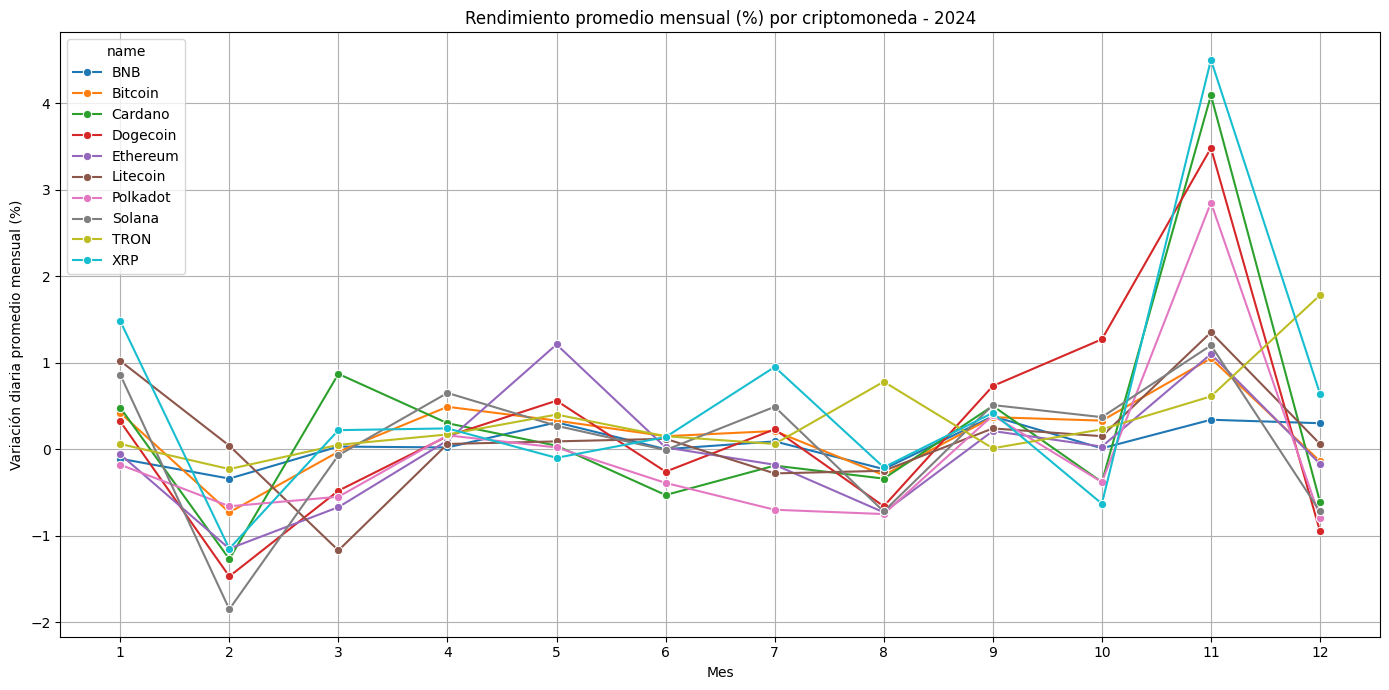

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_returns, x='month', y='rendimiento_mensual_%', hue='name', marker='o')
plt.title('Rendimiento promedio mensual (%) por criptomoneda - 2024')
plt.xlabel('Mes')
plt.ylabel('Variación diaria promedio mensual (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# Promedio del retorno diario mensual considerando todas las criptos
global_monthly = df_merged.groupby('month')['daily_pct_change'].mean().reset_index()
global_monthly['daily_pct_change'] = (global_monthly['daily_pct_change'] * 100).round(2)
global_monthly.rename(columns={'daily_pct_change': 'rendimiento_promedio_global_%'}, inplace=True)

global_monthly

month  rendimiento_promedio_global_%
0       1                           0.43
1       2                          -0.88
2       3                          -0.18
3       4                           0.23
4       5                           0.31
5       6                          -0.06
6       7                           0.07
7       8                          -0.34
8       9                           0.38
9      10                           0.10
10     11                           2.06
11     12                          -0.06

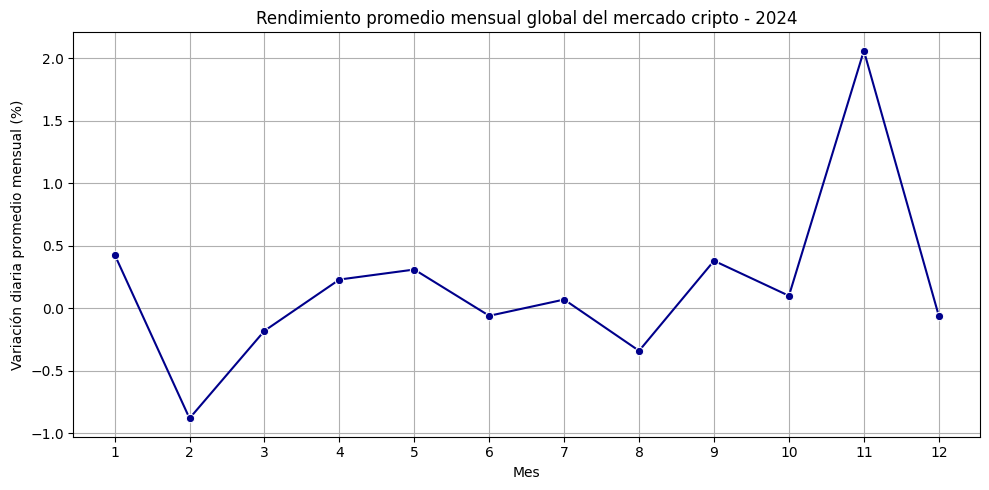

In [88]:
plt.figure(figsize=(10,5))
sns.lineplot(data=global_monthly, x='month', y='rendimiento_promedio_global_%', marker='o', color='darkblue')
plt.title('Rendimiento promedio mensual global del mercado cripto - 2024')
plt.xlabel('Mes')
plt.ylabel('Variación diaria promedio mensual (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

El análisis estacional mensual del mercado cripto durante 2024 revela una alta variabilidad en los rendimientos promedios mensuales, con meses positivos y negativos que se alternan a lo largo del año. Noviembre se destaca como el mejor mes, con un rendimiento promedio diario del +2,06%, lo que podría reflejar un repunte general del mercado o la influencia de factores puntuales en ese periodo.

En contraposición, febrero fue el mes más negativo, con una caída promedio diaria del -0,88%, seguido por otros meses con rendimientos levemente negativos como marzo, junio y agosto. También se observan etapas de recuperación moderada, especialmente en mayo y septiembre.

Sin embargo, es importante destacar que, al contar con datos de un solo año calendario, no es posible determinar si estas variaciones responden a patrones estacionales reales (repetitivos cada año) o si se deben a factores aleatorios, coyunturales o específicos del 2024. Por lo tanto, aunque estos datos permiten detectar posibles regularidades, no son suficientes por sí solos para afirmar la existencia de una estacionalidad estructural en el mercado cripto. Se requeriría información de múltiples años para validar o descartar esta hipótesis con mayor rigor.

In [89]:
# Filtrar solo una cripto para hacer el análisis, por ejemplo Bitcoin
btc = df_merged[df_merged['name'] == 'Bitcoin'].copy()

# Asegurarnos que columnas sean numéricas
for col in ['closing_price', 'sma_7', 'sma_30']:
    btc[col] = pd.to_numeric(btc[col], errors='coerce')

# Crear columnas que detectan si el precio está por encima o debajo de la media móvil
btc['above_sma7'] = btc['closing_price'] > btc['sma_7']
btc['above_sma30'] = btc['closing_price'] > btc['sma_30']

# Detectar cruces: cuando cambia la condición de True a False o viceversa
btc['crossover_sma7'] = btc['above_sma7'].ne(btc['above_sma7'].shift())
btc['crossover_sma30'] = btc['above_sma30'].ne(btc['above_sma30'].shift())

In [90]:
print("Cruces del precio con la SMA de 7 días:", btc['crossover_sma7'].sum())
print("Cruces del precio con la SMA de 30 días:", btc['crossover_sma30'].sum())

Cruces del precio con la SMA de 7 días: 83
Cruces del precio con la SMA de 30 días: 30


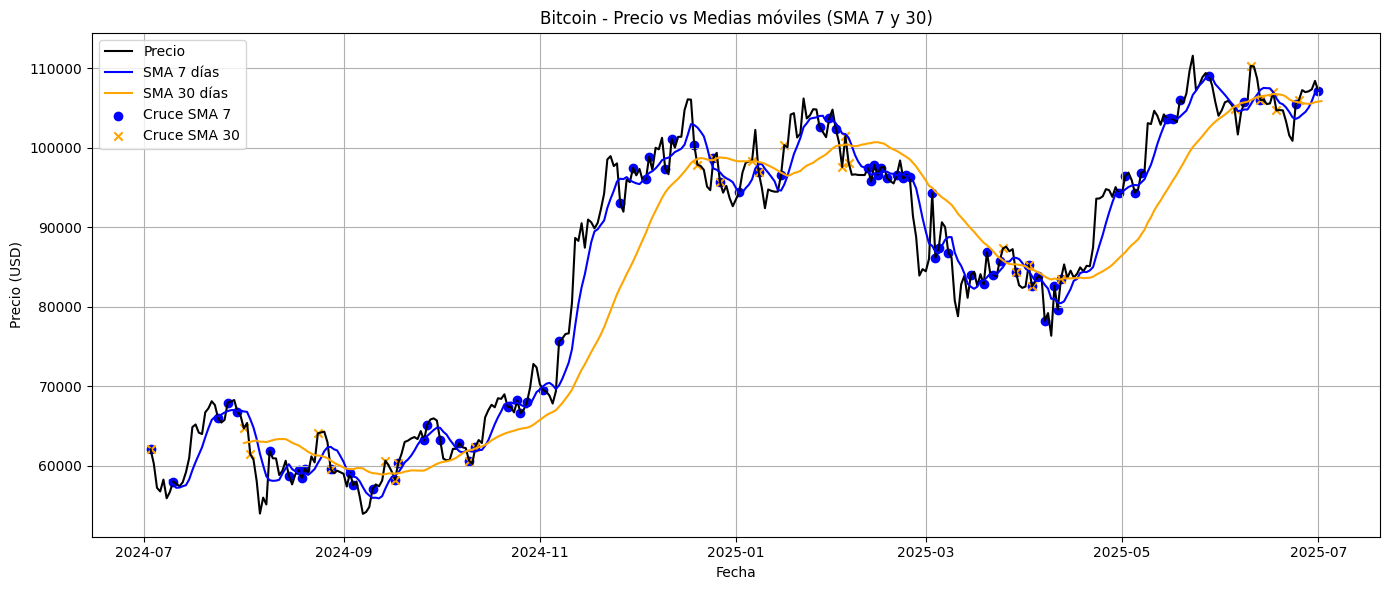

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(btc['date'], btc['closing_price'], label='Precio', color='black')
plt.plot(btc['date'], btc['sma_7'], label='SMA 7 días', color='blue')
plt.plot(btc['date'], btc['sma_30'], label='SMA 30 días', color='orange')

# Señalar los puntos de cruce con marcadores
cruce_sma7 = btc[btc['crossover_sma7']]
plt.scatter(cruce_sma7['date'], cruce_sma7['closing_price'], color='blue', marker='o', label='Cruce SMA 7')

cruce_sma30 = btc[btc['crossover_sma30']]
plt.scatter(cruce_sma30['date'], cruce_sma30['closing_price'], color='orange', marker='x', label='Cruce SMA 30')

plt.title('Bitcoin - Precio vs Medias móviles (SMA 7 y 30)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
# Filtrar Bitcoin
btc = df_merged[df_merged['name'] == 'Bitcoin'].copy()

# Asegurar columnas numéricas
for col in ['closing_price', 'sma_7', 'sma_30']:
    btc[col] = pd.to_numeric(btc[col], errors='coerce')

# Detectar si precio está arriba o abajo de SMA
btc['above_sma7'] = btc['closing_price'] > btc['sma_7']
btc['above_sma30'] = btc['closing_price'] > btc['sma_30']

# Detectar cruces (cambios en la condición)
btc['crossover_sma7'] = btc['above_sma7'].ne(btc['above_sma7'].shift())
btc['crossover_sma30'] = btc['above_sma30'].ne(btc['above_sma30'].shift())

# Tipo de cruce: True = cruce al alza, False = cruce a la baja
btc['crossover_sma7_type'] = btc['above_sma7'] & btc['crossover_sma7']
btc['crossover_sma30_type'] = btc['above_sma30'] & btc['crossover_sma30']

# Función para calcular retorno acumulado a n días después del cruce
def retorno_acumulado(df, start_idx, n_days=3):
    if start_idx + n_days < len(df):
        start_price = df.iloc[start_idx]['closing_price']
        end_price = df.iloc[start_idx + n_days]['closing_price']
        return (end_price - start_price) / start_price
    else:
        return None

# Listas para guardar retornos post-cruce
retornos_sma7_alza = []
retornos_sma7_baja = []
retornos_sma30_alza = []
retornos_sma30_baja = []

# Iterar con índice posicional para usar .iloc correctamente
for pos in range(len(btc)):
    row = btc.iloc[pos]

    if row['crossover_sma7']:
        ret = retorno_acumulado(btc, pos)
        if ret is not None:
            if row['crossover_sma7_type']:
                retornos_sma7_alza.append(ret)
            else:
                retornos_sma7_baja.append(ret)

    if row['crossover_sma30']:
        ret = retorno_acumulado(btc, pos)
        if ret is not None:
            if row['crossover_sma30_type']:
                retornos_sma30_alza.append(ret)
            else:
                retornos_sma30_baja.append(ret)

# Mostrar resultados
print(f"Retorno promedio a 3 días después de cruce SMA 7 ALZA: {100 * pd.Series(retornos_sma7_alza).mean():.2f}%")
print(f"Retorno promedio a 3 días después de cruce SMA 7 BAJA: {100 * pd.Series(retornos_sma7_baja).mean():.2f}%")
print(f"Retorno promedio a 3 días después de cruce SMA 30 ALZA: {100 * pd.Series(retornos_sma30_alza).mean():.2f}%")
print(f"Retorno promedio a 3 días después de cruce SMA 30 BAJA: {100 * pd.Series(retornos_sma30_baja).mean():.2f}%")


Retorno promedio a 3 días después de cruce SMA 7 ALZA: 0.13%
Retorno promedio a 3 días después de cruce SMA 7 BAJA: 0.17%
Retorno promedio a 3 días después de cruce SMA 30 ALZA: -1.02%
Retorno promedio a 3 días después de cruce SMA 30 BAJA: -1.36%


La SMA de 7 días no parece ser un buen predictor de subas o bajas en Bitcoin a corto plazo, ya que cruces a la baja se siguen de subas moderadas y cruces al alza apenas producen subas pequeñas.

La SMA de 30 días parece funcionar mejor como indicador para señales de venta (cruce a la baja anticipa caídas), pero su cruce al alza no anticipa subas, incluso muestra caídas.

En general, el poder predictivo de estas medias móviles para Bitcoin en horizontes cortos (3 días) es limitado o inconsistente.

Podría ser útil analizar periodos más largos, diferentes horizontes (5, 10 días) o combinar otras señales técnicas.

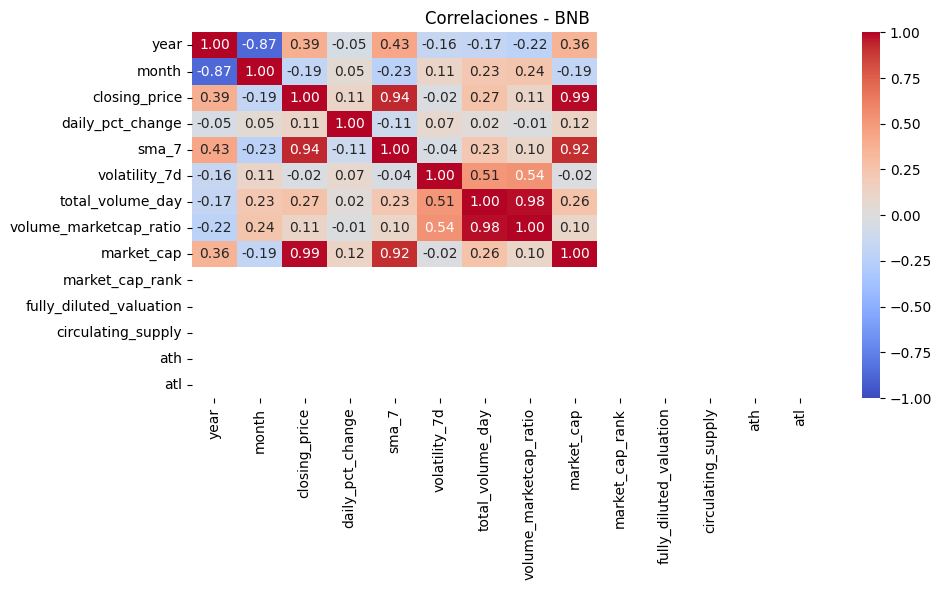

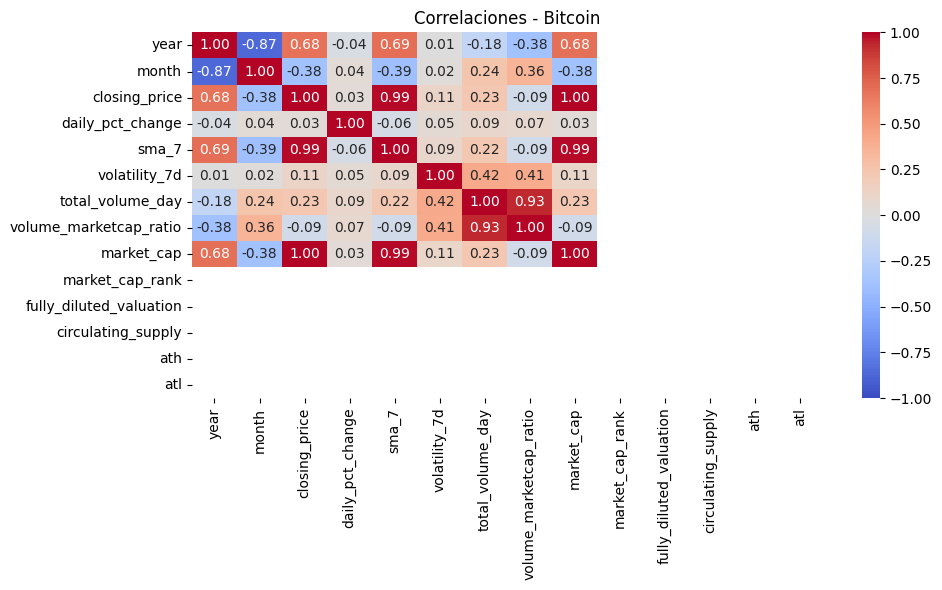

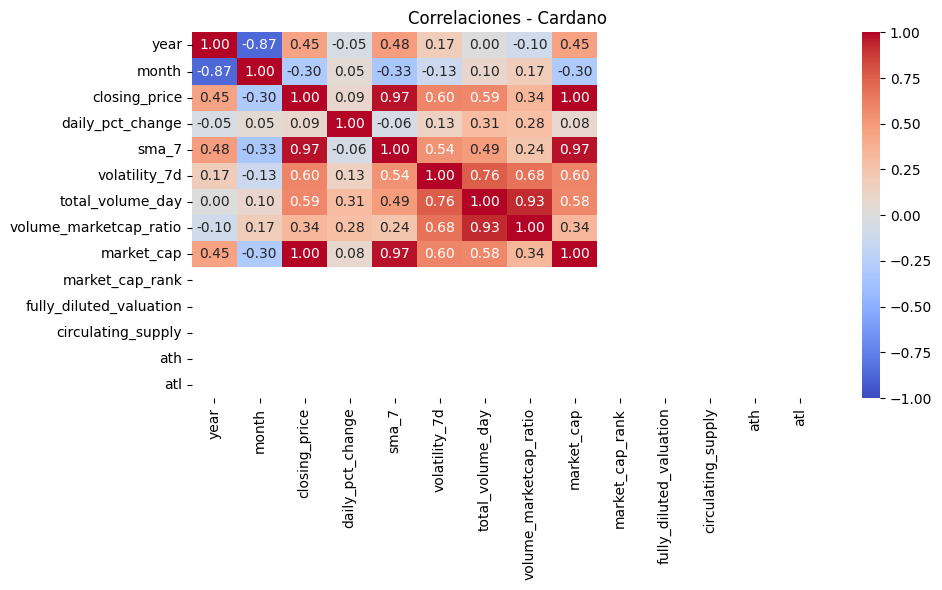

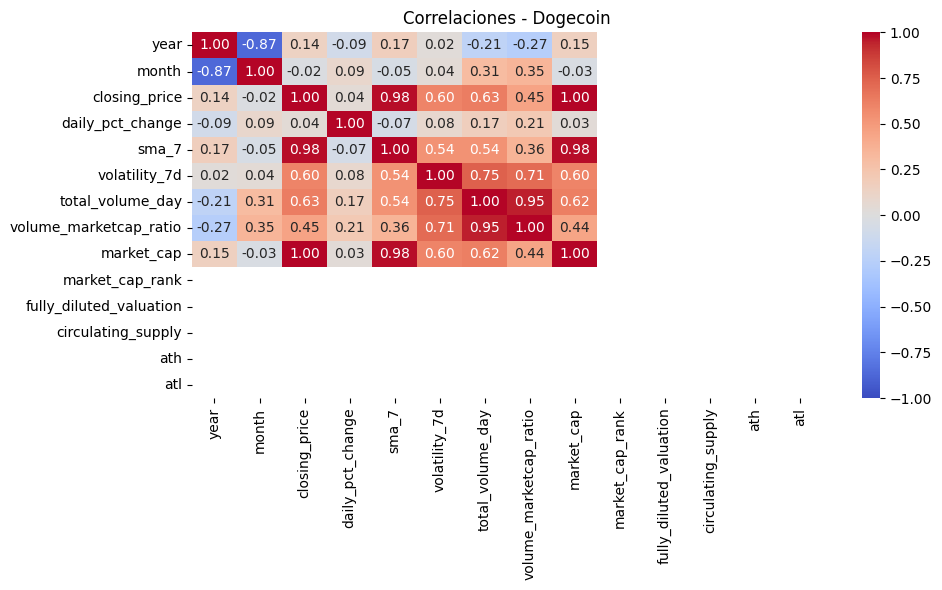

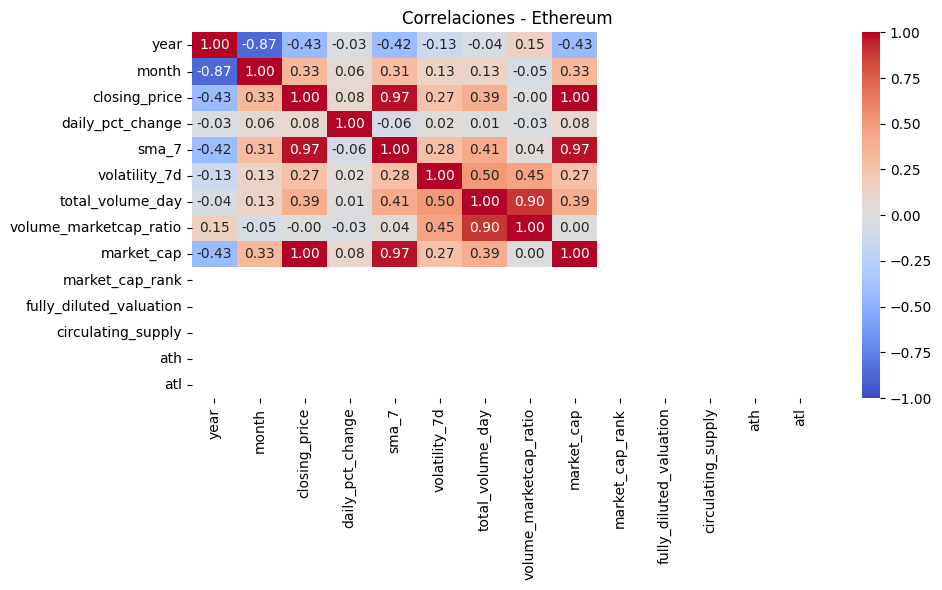

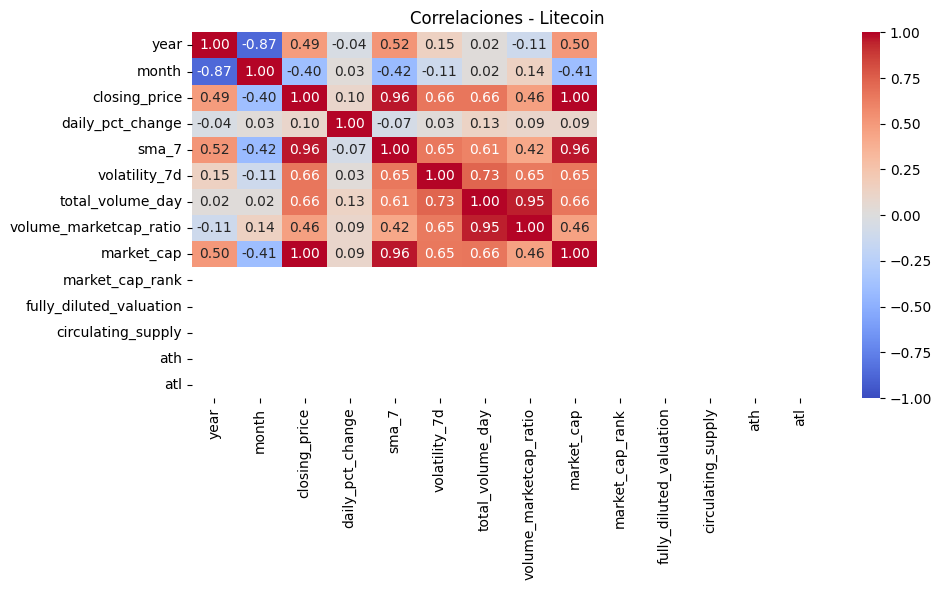

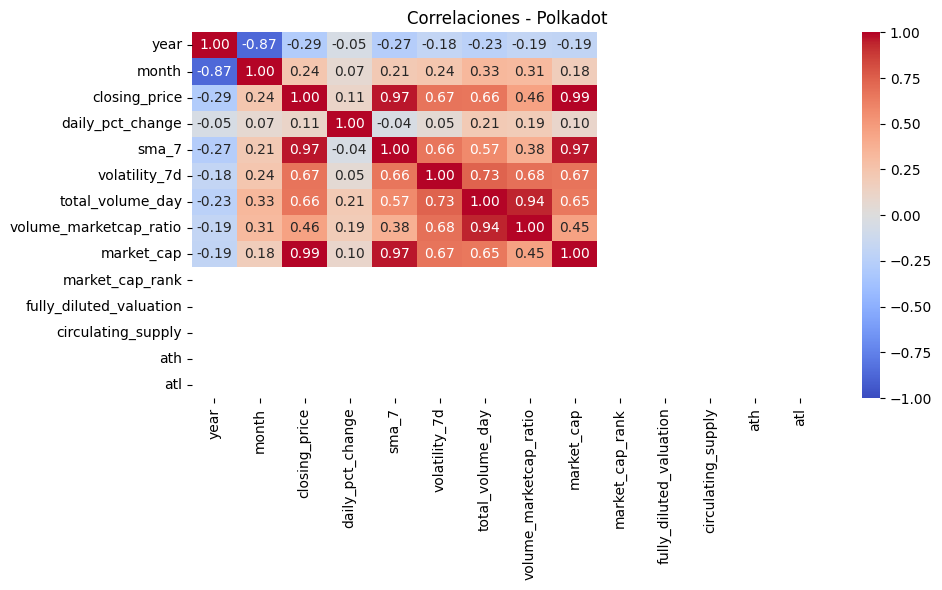

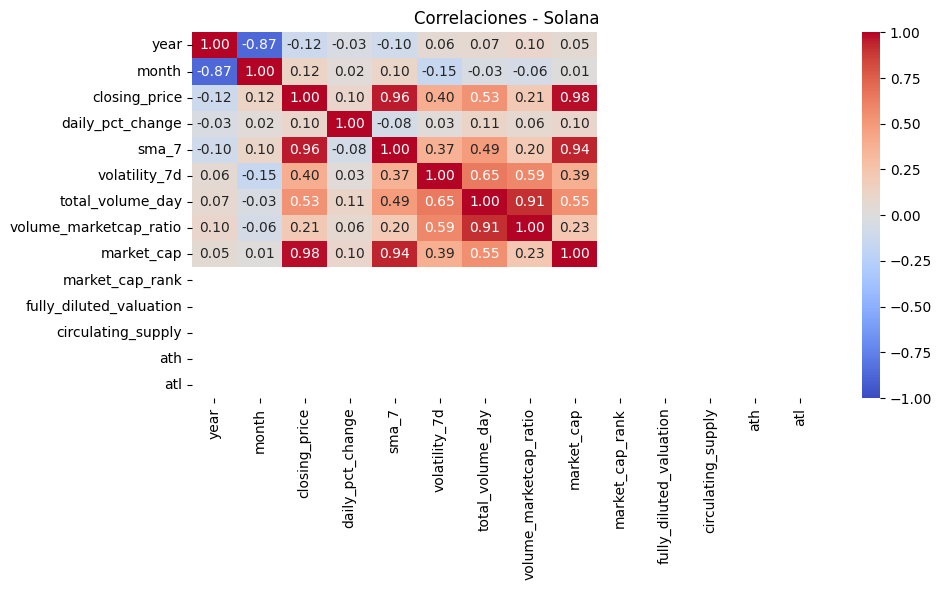

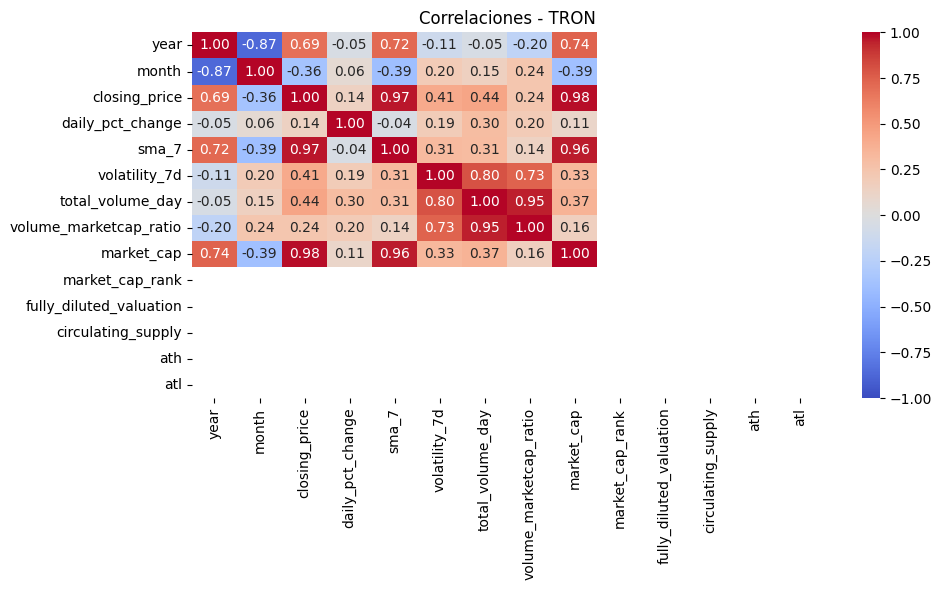

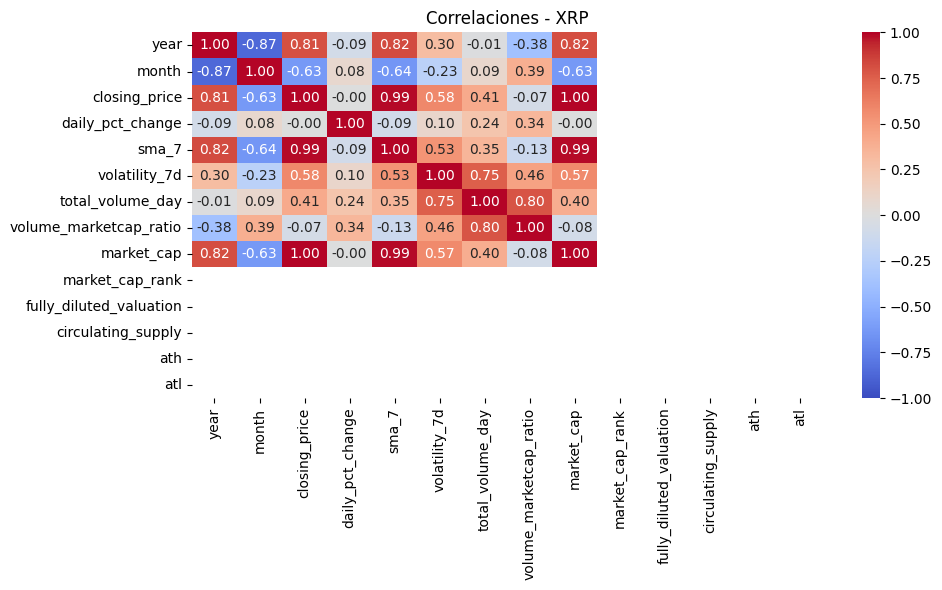

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Filtrar columnas con buena cobertura
umbral_nulos = 100  # Máximo de valores nulos permitidos
columnas_utiles = df.columns[df.isnull().sum() < umbral_nulos].tolist()

# Paso 2: Seleccionar solo columnas numéricas
columnas_numericas_utiles = df[columnas_utiles].select_dtypes(include='number').columns.tolist()

# Paso 3: Obtener lista de criptomonedas
criptos = df['name'].unique()

# Paso 4: Generar mapas de calor de correlación por cripto
for cripto in criptos:
    df_temp = df[df['name'] == cripto][columnas_numericas_utiles].dropna()

    if len(df_temp) >= 30:  # Solo si hay suficientes datos sin nulos
        corr = df_temp.corr()

        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
        plt.title(f'Correlaciones - {cripto}')
        plt.tight_layout()
        plt.show()
    else:
        print(f" {cripto} tiene muy pocos datos completos para graficar.")

📌 1. Fuerte correlación entre closing_price y market_cap
En casi todas las criptomonedas, el precio de cierre (closing_price) está altamente correlacionado con la capitalización de mercado (market_cap).
🔍 Esto es lógico, ya que la capitalización es el producto del precio por la cantidad en circulación.

👉 Conclusión: Las variaciones en el precio explican buena parte de las fluctuaciones en la capitalización de mercado.

📌 2. Las medias móviles (sma_7, sma_30) están muy correlacionadas con el precio
Las medias móviles de 7 y 30 días tienen una alta correlación positiva con el precio en todas las criptos.

👉 Conclusión: Estas medias capturan efectivamente la tendencia del precio, aunque no necesariamente predicen movimientos futuros, sí son un buen indicador de la dirección general del mercado.

📌 3. La volatility_7d muestra correlaciones variables
En algunas criptomonedas (como Dogecoin o Polkadot), la volatilidad semanal tiene correlación moderada con el daily_pct_change.

En otras (como Bitcoin o Ethereum), la correlación es más débil.

👉 Conclusión: La relación entre la variación diaria y la volatilidad no es igual en todos los activos. Las criptos más grandes y estables suelen tener menor sensibilidad inmediata a cambios bruscos.

📌 4. El total_volume_day y el volume_marketcap_ratio no siempre siguen una relación consistente con el precio
Algunas criptos muestran correlación débil o incluso nula entre volumen operado y precio.

Esto sugiere que el aumento de volumen no siempre implica una subida de precio inmediata.

👉 Conclusión: El volumen puede ser útil como señal de interés del mercado, pero no es suficiente por sí solo para anticipar movimientos de precio.

📌 5. El daily_pct_change rara vez se correlaciona fuertemente con otras variables
Esto es normal en los retornos diarios de activos financieros: son muy volátiles y dependen de factores externos.

👉 Conclusión: El rendimiento diario es difícil de predecir con variables internas del dataset. Requiere modelos más complejos o información externa (noticias, redes sociales, etc.).

In [94]:
df['distancia_al_ATH_%'] = (df['ath'] - df['closing_price']) / df['ath'] * 100

In [95]:
df_ath = df.groupby("name").agg({
    "distancia_al_ATH_%": "mean",
    "volatility_7d": "mean",
    "market_cap": "mean",
    "circulation_ratio": "mean"
}).reset_index()

ver si este que sigue no hay que hacerlo por cripto porque sino puede distorcionar:

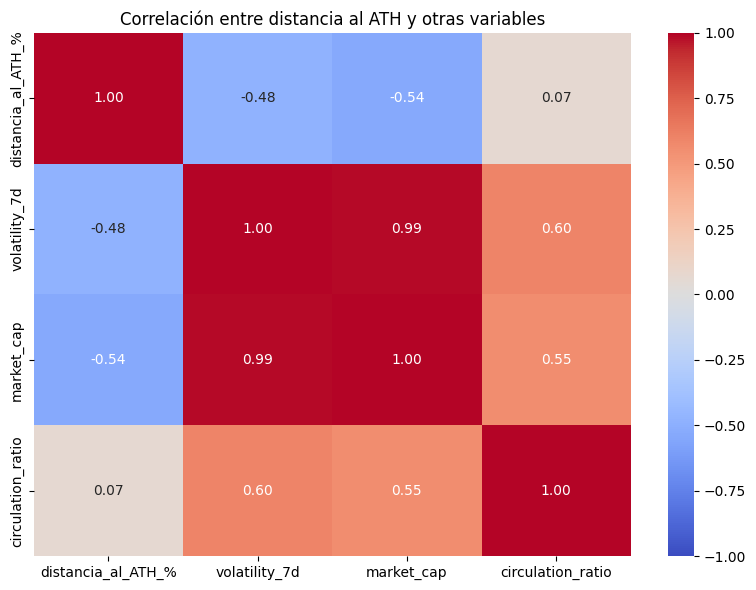

In [96]:
# Agrupar por cripto y calcular los promedios
df_ath = df.groupby("name").agg({
    "distancia_al_ATH_%": "mean",
    "volatility_7d": "mean",
    "market_cap": "mean",
    "circulation_ratio": "mean"
}).reset_index()

# Matriz de correlación (sin la columna 'name')
correlacion = df_ath.drop(columns=["name"]).corr()

# Mostrar como heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación entre distancia al ATH y otras variables")
plt.tight_layout()
plt.show()

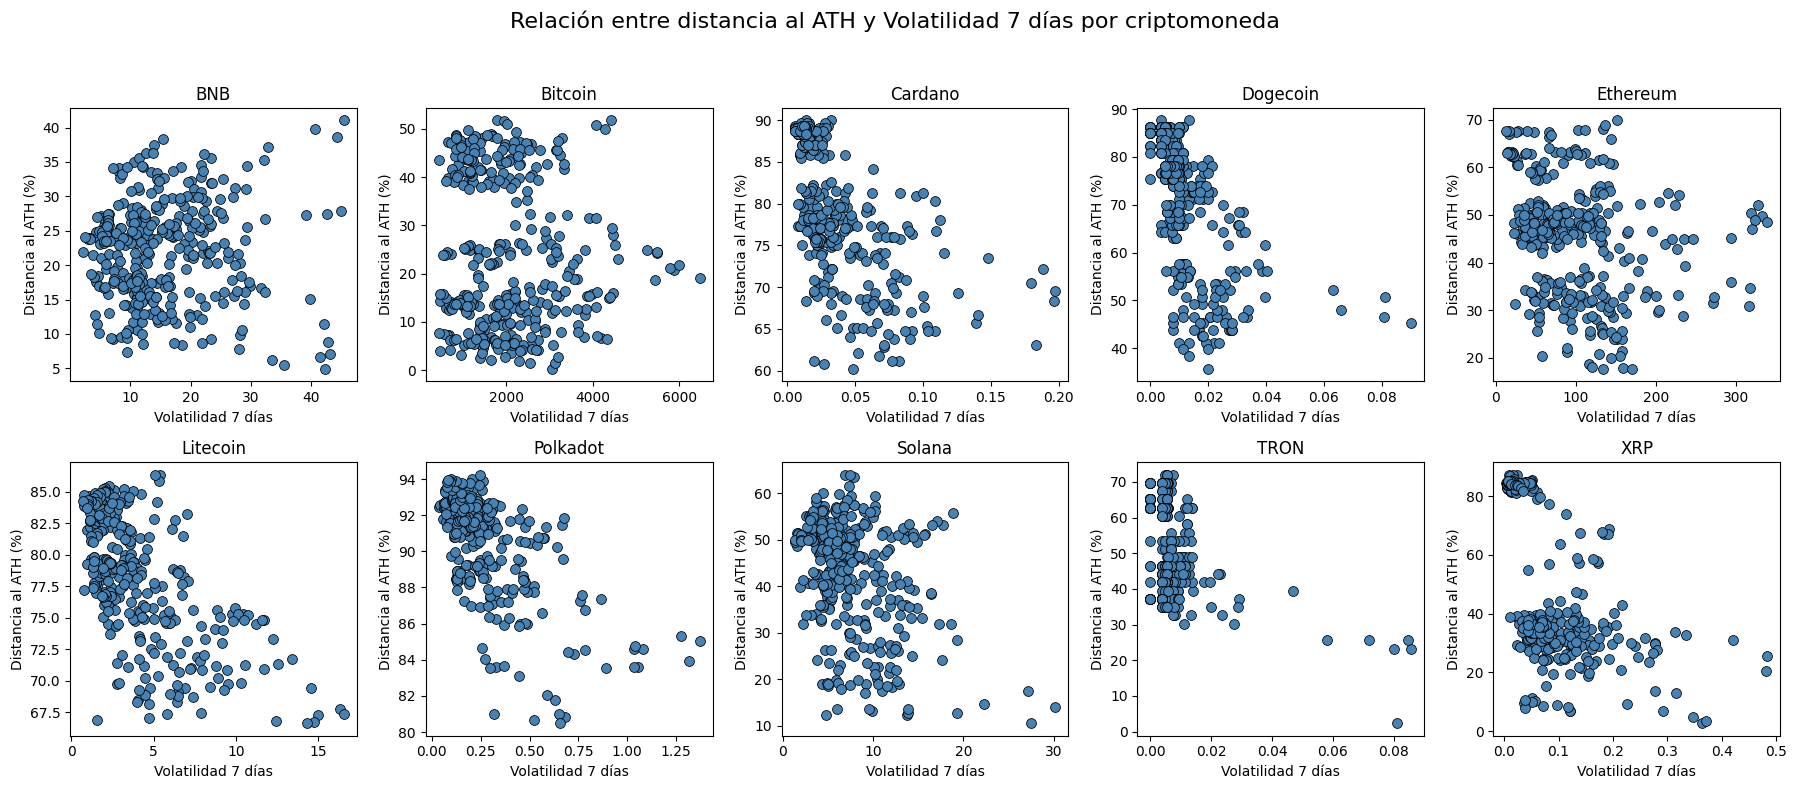

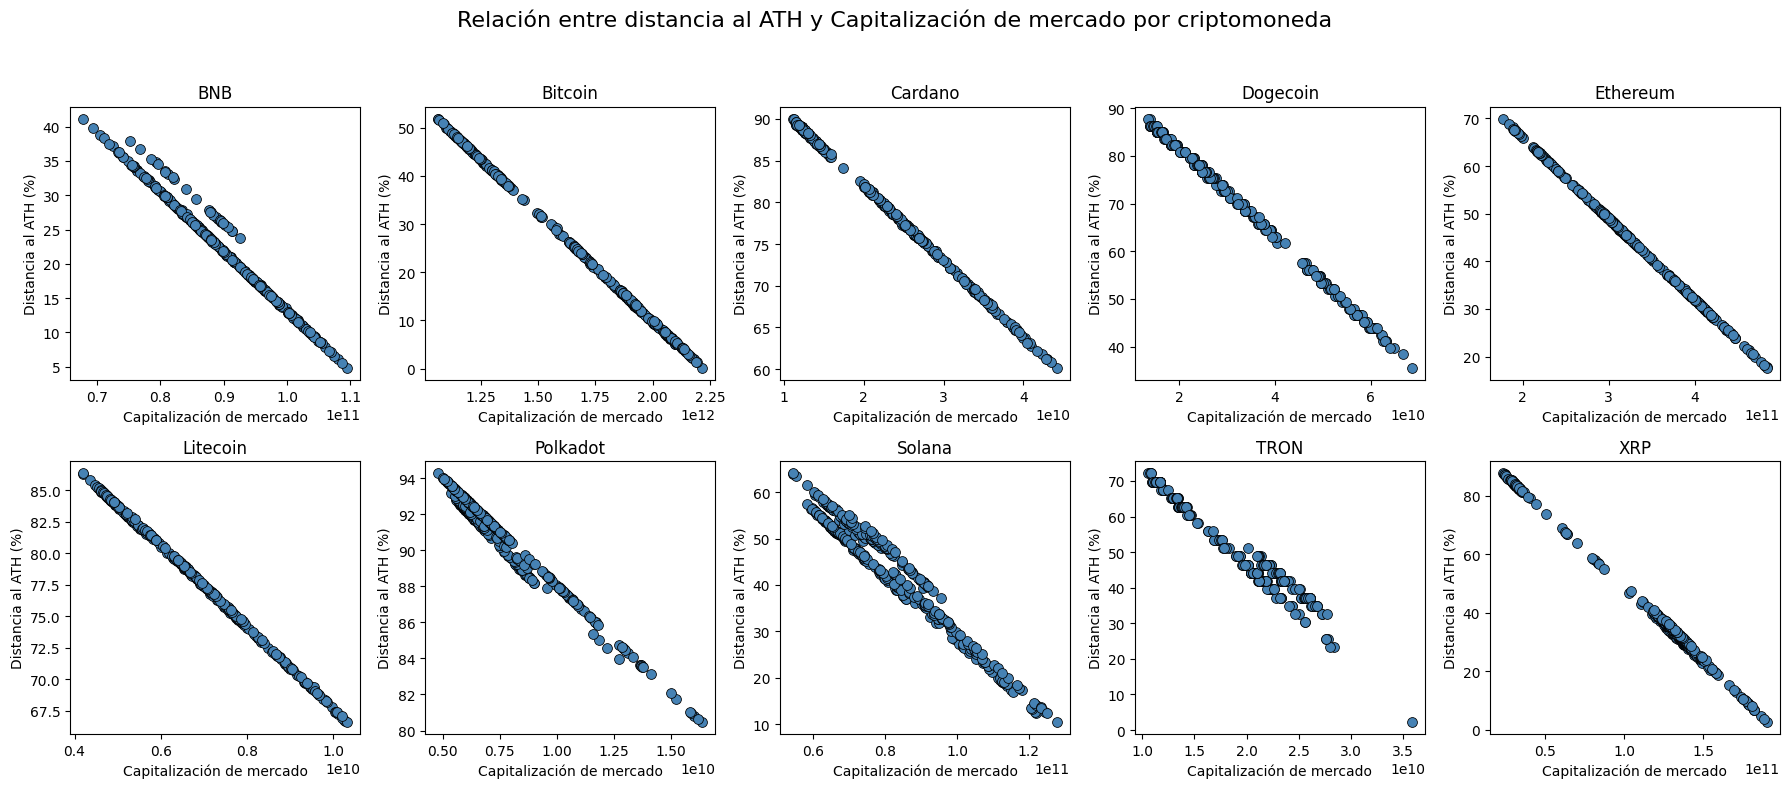

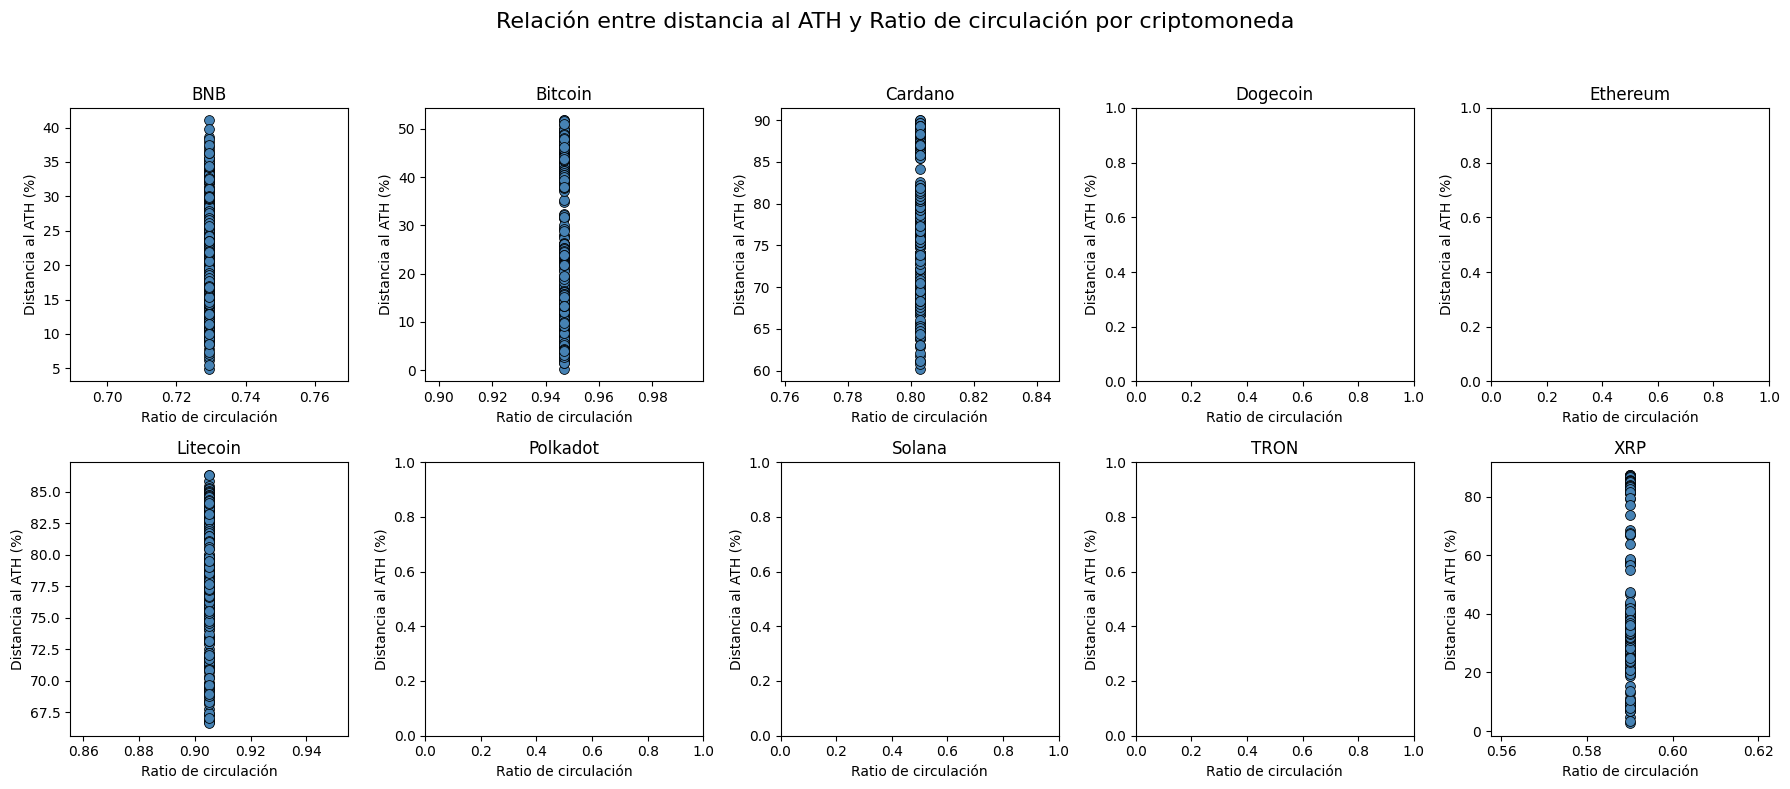

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las columnas estén en formato numérico
df["distancia_al_ATH_%"] = pd.to_numeric(df["distancia_al_ATH_%"], errors='coerce')
df["volatility_7d"] = pd.to_numeric(df["volatility_7d"], errors='coerce')
df["market_cap"] = pd.to_numeric(df["market_cap"], errors='coerce')
df["circulation_ratio"] = pd.to_numeric(df["circulation_ratio"], errors='coerce')

# Lista de variables a comparar con distancia al ATH
variables = ["volatility_7d", "market_cap", "circulation_ratio"]
titles = {
    "volatility_7d": "Volatilidad 7 días",
    "market_cap": "Capitalización de mercado",
    "circulation_ratio": "Ratio de circulación"
}

# Lista de criptomonedas
cryptos = df["name"].unique()

# Crear gráficos de dispersión para cada variable
for var in variables:
    fig, axes = plt.subplots(2, 5, figsize=(18, 8), sharex=False, sharey=False)
    fig.suptitle(f"Relación entre distancia al ATH y {titles[var]} por criptomoneda", fontsize=16)

    for i, name in enumerate(cryptos):
        ax = axes[i // 5, i % 5]
        data = df[df["name"] == name]

        sns.scatterplot(data=data, x=var, y="distancia_al_ATH_%", ax=ax, color="steelblue", edgecolor="black", s=50)
        ax.set_title(name)
        ax.set_xlabel(titles[var])
        ax.set_ylabel("Distancia al ATH (%)")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Este primer modelo es malo porque solo predice de que criptomoneda se trata después de mirar todas las otras variables, sería muy malo si no supiera de cual se trata:

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 1. Selección de variables numéricas relevantes
features = [
    "closing_price",
    "daily_pct_change",
    "sma_7",
    "sma_30",
    "volatility_7d",
    "total_volume_day",
    "volume_marketcap_ratio",
    "market_cap",
    "circulation_ratio",
    "distancia_al_ATH_%"
]

# Asegurarse de que las columnas sean numéricas
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores nulos en las columnas seleccionadas
df_model = df.dropna(subset=features + ['name'])

# Separar variables independientes (X) y dependiente (y)
X = df_model[features]
y = df_model["name"]


In [99]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar las variables (SVM es sensible a las escalas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
modelo_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [101]:
# Predicción
y_pred = modelo_svm.predict(X_test_scaled)

# Resultados
print("🔍 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n📈 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

🔍 Matriz de confusión:
[[101   0   0   0   0]
 [  0 100   0   0   0]
 [  0   0 100   1   0]
 [  0   0   0 101   0]
 [  0   0   0   0 101]]

📈 Reporte de clasificación:
              precision    recall  f1-score   support

         BNB       1.00      1.00      1.00       101
     Bitcoin       1.00      1.00      1.00       100
     Cardano       1.00      0.99      1.00       101
    Litecoin       0.99      1.00      1.00       101
         XRP       1.00      1.00      1.00       101

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



In [103]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Filtrar una criptomoneda, ejemplo 'bitcoin'
df_btc = df_merged[df_merged['id'] == 'bitcoin'].copy()

# Variables predictoras y target
features = ['daily_pct_change', 'sma_7', 'sma_30', 'volatility_7d',
            'total_volume_day', 'market_cap', 'circulation_ratio', 'is_weekend']
target = 'closing_price'

# Tratar valores faltantes
df_btc = df_btc[features + [target]].dropna()

# Convertir booleano is_weekend a int (0/1)
df_btc['is_weekend'] = df_btc['is_weekend'].astype(int)

# División temporal (80% train, 20% test)
split_index = int(len(df_btc) * 0.8)
train = df_btc.iloc[:split_index]
test = df_btc.iloc[split_index:]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir
y_pred = model.predict(X_test_scaled)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

RMSE: 243.73
MAE: 240.20
R2: 1.00


In [104]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Filtrar bitcoin y ordenar por fecha
df_btc = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc = df_btc.sort_values('date').reset_index(drop=True)

# Crear variables rezagadas (lags) y medias móviles
df_btc['closing_price_lag1'] = df_btc['closing_price'].shift(1)
df_btc['closing_price_lag2'] = df_btc['closing_price'].shift(2)
df_btc['sma_7'] = df_btc['closing_price'].rolling(window=7).mean()
df_btc['sma_30'] = df_btc['closing_price'].rolling(window=30).mean()
df_btc['volatility_7d'] = df_btc['closing_price'].rolling(window=7).std()
df_btc['is_weekend'] = df_btc['is_weekend'].astype(int)
df_btc['total_volume_day_lag1'] = df_btc['total_volume_day'].shift(1)

# Definimos las features que usaremos para predecir
features = ['closing_price_lag1', 'closing_price_lag2', 'sma_7', 'sma_30',
            'volatility_7d', 'total_volume_day_lag1', 'is_weekend']

horizontes = list(range(1, 61))  # Para los próximos 60 días

resultados = []

for h in horizontes:
    # Crear target desplazado hacia adelante h días
    df_btc[f'target_t+{h}'] = df_btc['closing_price'].shift(-h)

    # Dataset para este horizonte, eliminar filas con NA
    df_model = df_btc[features + [f'target_t+{h}']].dropna()

    # División temporal 80% train, 20% test
    split_index = int(len(df_model) * 0.8)
    train = df_model.iloc[:split_index]
    test = df_model.iloc[split_index:]

    X_train = train[features]
    y_train = train[f'target_t+{h}']
    X_test = test[features]
    y_test = test[f'target_t+{h}']

    # Entrenar regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predecir
    y_pred = model.predict(X_test)

    # Evaluar
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados.append({'horizonte_dias': h, 'RMSE': rmse, 'MAE': mae, 'R2': r2})

# Convertir resultados a DataFrame para análisis
df_resultados = pd.DataFrame(resultados)

print(df_resultados)

    horizonte_dias      RMSE       MAE     R2
0                1  2,443.11  1,892.03   0.71
1                2  3,025.34  2,385.26   0.56
2                3  3,419.18  2,655.66   0.44
3                4  3,860.76  2,990.02   0.28
4                5  4,242.54  3,403.16   0.13
5                6  4,593.16  3,797.31  -0.07
6                7  5,284.21  4,494.55  -0.42
7                8  5,777.35  4,950.81  -0.69
8                9  6,054.98  5,192.72  -0.86
9               10  6,455.73  5,529.70  -1.11
10              11  6,517.06  5,575.59  -1.31
11              12  6,449.93  5,460.66  -1.26
12              13  6,672.50  5,580.79  -1.42
13              14  7,065.62  5,930.10  -1.72
14              15  7,302.76  6,184.09  -1.90
15              16  7,327.48  6,059.08  -2.10
16              17  7,719.66  6,279.70  -2.44
17              18  8,078.77  6,390.82  -2.77
18              19  8,359.21  6,518.84  -3.04
19              20  8,843.40  6,974.53  -3.52
20              21  9,118.70  7,28

a partir de acá esta bien el modelo:

In [105]:
# Filtrar bitcoin y ordenar por fecha ascendente
df_btc = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc = df_btc[['date', 'closing_price', 'sma_7', 'sma_30', 'total_volume_day']].dropna()
df_btc = df_btc.sort_values('date').reset_index(drop=True)

# Features y target
X = df_btc[['sma_7', 'sma_30', 'total_volume_day']]
y = df_btc['closing_price']

# División temporal: 70% datos antiguos para train, 30% recientes para test
split_index = int(len(df_btc) * 0.7)
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]

# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

# Opcional: mostrar resultados con fechas
resultados = df_btc.iloc[split_index:].copy()
resultados['predicted_closing_price'] = y_pred
print(resultados[['date', 'closing_price', 'predicted_closing_price']].head(150))

RMSE: 2385.69
MAE: 1826.18
R2: 0.94
          date  closing_price  predicted_closing_price
235 2025-03-24      85,787.71                84,039.47
236 2025-03-25      87,327.73                84,698.40
237 2025-03-26      87,520.58                85,522.40
238 2025-03-27      86,960.86                85,537.37
239 2025-03-28      87,227.27                86,014.35
..         ...            ...                      ...
331 2025-06-28     107,078.92               104,362.04
332 2025-06-29     107,331.59               105,185.27
333 2025-06-30     108,396.62               106,413.13
334 2025-07-01     107,132.80               106,709.09
335 2025-07-02     107,295.00               106,948.75

[101 rows x 3 columns]


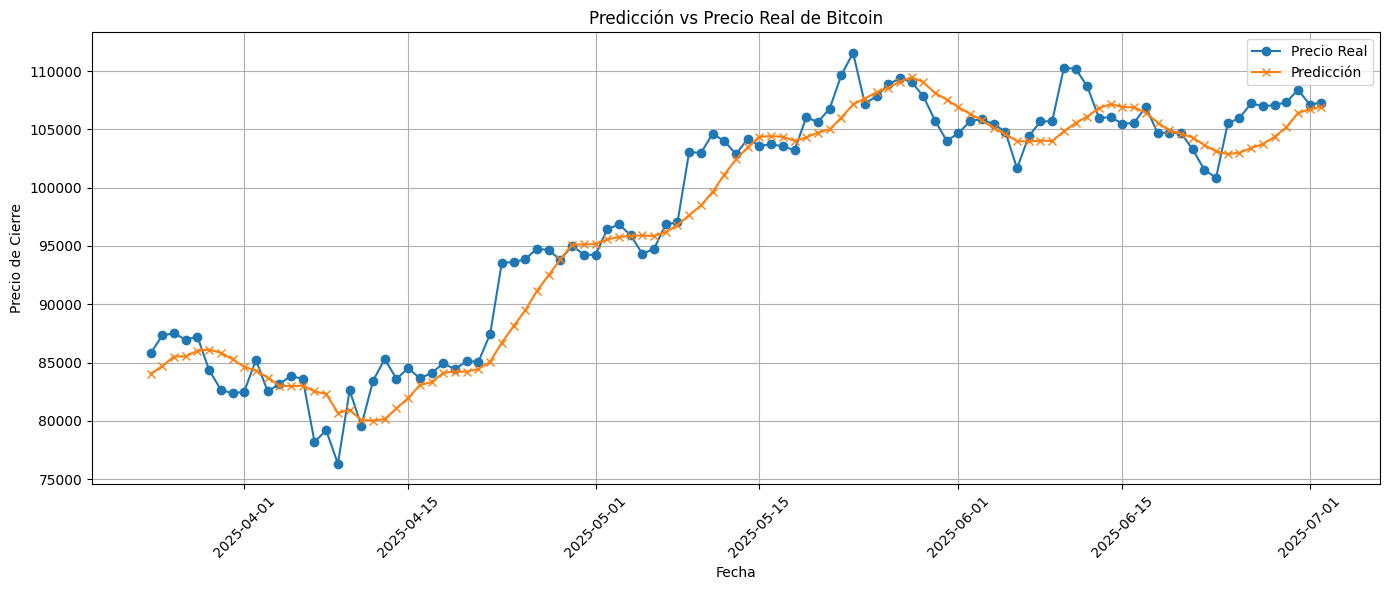

In [106]:
import matplotlib.pyplot as plt

# Asumiendo que ya tenés 'resultados' con las columnas 'date', 'closing_price' y 'predicted_closing_price'

plt.figure(figsize=(14,6))
plt.plot(resultados['date'], resultados['closing_price'], label='Precio Real', marker='o')
plt.plot(resultados['date'], resultados['predicted_closing_price'], label='Predicción', marker='x')

plt.title('Predicción vs Precio Real de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
import numpy as np

# Últimos datos reales ordenados
df_btc = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc = df_btc[['date', 'closing_price', 'total_volume_day']].dropna().sort_values('date').reset_index(drop=True)

# Vamos a simular 10 días adelante
dias_a_predecir = 10

# Copiamos para no modificar original
df_sim = df_btc.copy()

# Inicializamos una lista para guardar predicciones
predicciones = []

# Usamos las funciones para calcular medias móviles basadas en cierre
def calcular_sma(data, window):
    return data[-window:].mean() if len(data) >= window else data.mean()

for i in range(dias_a_predecir):
    # Últimos valores para calcular indicadores
    cierre_reciente = df_sim['closing_price']
    volumen_reciente = df_sim['total_volume_day']

    sma_7 = calcular_sma(cierre_reciente, 7)
    sma_30 = calcular_sma(cierre_reciente, 30)
    # Para volumen usaremos el último volumen conocido
    volumen_ultimo = volumen_reciente.iloc[-1]

    # Armar vector features para el modelo
    X_nuevo = np.array([[sma_7, sma_30, volumen_ultimo]])

    # Predecir con el modelo entrenado (asumimos que ya entrenaste y tenés 'model')
    pred = model.predict(X_nuevo)[0]

    # Crear nueva fila con fecha incrementada (suponiendo que 'date' es datetime)
    nueva_fecha = df_sim['date'].iloc[-1] + pd.Timedelta(days=1)

    # Agregar predicción como nuevo dato
    nueva_fila = {'date': nueva_fecha, 'closing_price': pred, 'total_volume_day': volumen_ultimo}
    df_sim = pd.concat([df_sim, pd.DataFrame([nueva_fila])], ignore_index=True)

    predicciones.append({'date': nueva_fecha, 'predicted_closing_price': pred})

# Mostrar predicciones
df_predicciones = pd.DataFrame(predicciones)
print(df_predicciones)


        date  predicted_closing_price
0 2025-07-03               106,948.75
1 2025-07-04               106,896.99
2 2025-07-05               106,875.87
3 2025-07-06               106,833.18
4 2025-07-07               106,727.79
5 2025-07-08               106,448.28
6 2025-07-09               106,334.53
7 2025-07-10               106,177.04
8 2025-07-11               106,072.94
9 2025-07-12               105,960.70


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

Aquí comienza otro modelo de regresión lineal pero que sí toma en cuenta el "date"

In [108]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

# Filtrar bitcoin
df_btc = df_merged[df_merged['id'] == 'bitcoin'].copy()

# Asegurarse que 'date' esté en formato datetime
df_btc['date'] = pd.to_datetime(df_btc['date'])

# Crear variable que representa el paso del tiempo
df_btc['days_since_start'] = (df_btc['date'] - df_btc['date'].min()).dt.days

# Seleccionar columnas necesarias
df_btc_model = df_btc[['date', 'closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start']].dropna()

# Definir features y target
X = df_btc_model[['sma_7', 'sma_30', 'total_volume_day', 'days_since_start']]
y = df_btc_model['closing_price']

# División temporal 70% entrenamiento, 30% test
split_index = int(len(df_btc_model) * 0.7)
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]

# Entrenar regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre test
y_pred = model.predict(X_test)

# Evaluar
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')


RMSE: 2339.88
MAE: 1933.20
R2: 0.95


In [109]:
# Recuperar fechas originales del testeo
fechas_test = df_btc_model['days_since_start'].iloc[split_index:]
fechas_reales = df_btc[df_btc['days_since_start'].isin(fechas_test)]['date'].values

# Crear DataFrame de comparación
resultados = pd.DataFrame({
    'date': fechas_reales,
    'closing_price_real': y_test.values,
    'predicted_closing_price': y_pred,
    'abs_error': abs(y_test.values - y_pred)
})

# Mostrar primeras filas
print(resultados.head(10))

        date  closing_price_real  predicted_closing_price  abs_error
0 2025-03-24           85,787.71                85,120.61     667.10
1 2025-03-25           87,327.73                85,841.35   1,486.38
2 2025-03-26           87,520.58                86,705.94     814.64
3 2025-03-27           86,960.86                86,732.12     228.74
4 2025-03-28           87,227.27                87,226.40       0.87
5 2025-03-29           84,359.47                87,349.95   2,990.48
6 2025-03-30           82,679.17                87,074.27   4,395.10
7 2025-03-31           82,356.38                86,516.73   4,160.35
8 2025-04-01           82,514.09                85,910.30   3,396.21
9 2025-04-02           85,237.59                85,603.66     366.07


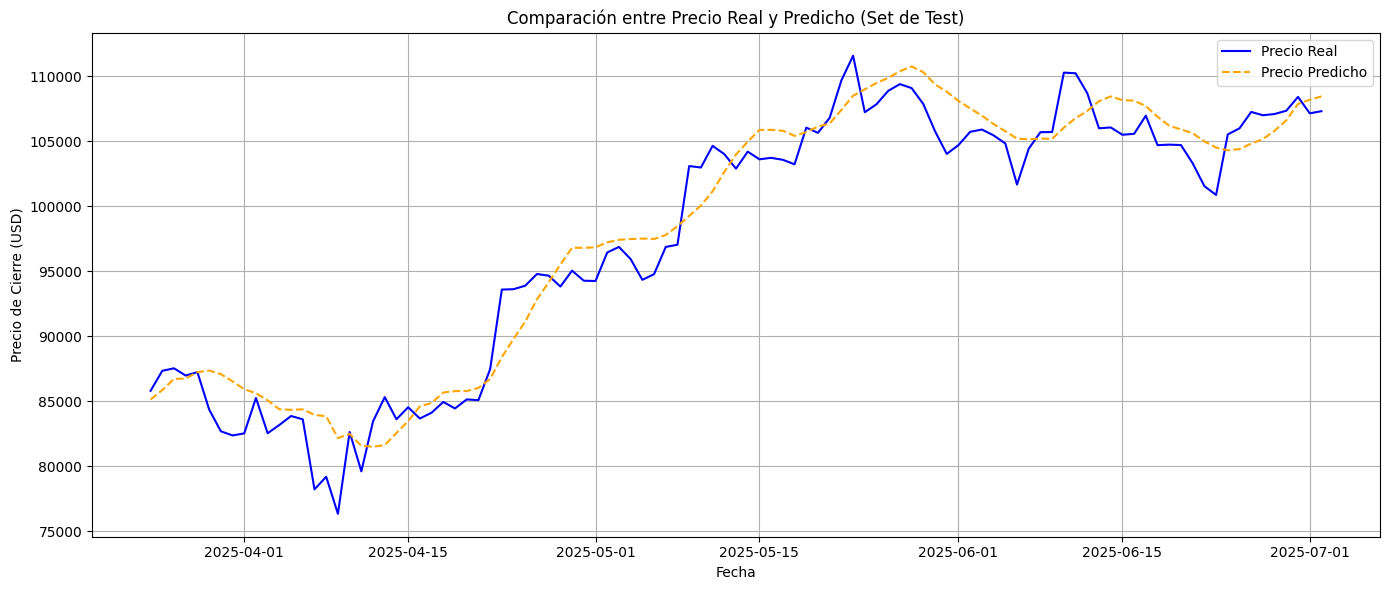

In [110]:
import matplotlib.pyplot as plt

# Asegurarse de que estén ordenados por fecha
resultados = resultados.sort_values('date')

# Crear el gráfico
plt.figure(figsize=(14,6))
plt.plot(resultados['date'], resultados['closing_price_real'], label='Precio Real', color='blue')
plt.plot(resultados['date'], resultados['predicted_closing_price'], label='Precio Predicho', color='orange', linestyle='--')
plt.title('Comparación entre Precio Real y Predicho (Set de Test)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

🔮 Predicción de los próximos 10 días:
        date  predicted_closing_price
0 2025-07-03               108,448.13
1 2025-07-04               108,639.34
2 2025-07-05               108,898.49
3 2025-07-06               109,178.37
4 2025-07-07               109,439.62
5 2025-07-08               109,587.34
6 2025-07-09               109,971.31
7 2025-07-10               110,388.72
8 2025-07-11               110,714.69
9 2025-07-12               111,059.98


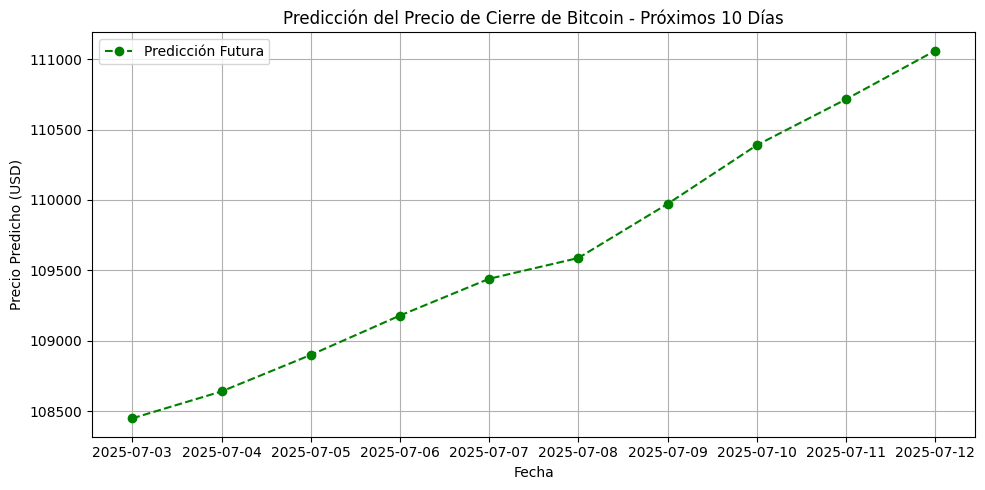

In [111]:
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Obtener fecha máxima y última observación para simulación
fecha_max = df_btc_model['date'].max()
days_start = df_btc_model['days_since_start'].max()
datos_simulados = df_btc_model.copy()

# Listas para guardar resultados
futuras_fechas = []
futuras_preds = []

# Simular los próximos 10 días
for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    # Cálculo de SMA y volumen
    ultimos_cierres = datos_simulados['closing_price'].tolist()
    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:])
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    # Features para predicción
    features = np.array([[sma_7, sma_30, volumen, dias_desde_inicio]])
    pred = model.predict(features)[0]

    # Guardar resultados
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    # Agregar fila simulada para próximos cálculos
    nueva_fila = {
        'date': nueva_fecha,
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Crear DataFrame de resultados
df_futuro = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

# Mostrar tabla
print("🔮 Predicción de los próximos 10 días:")
print(df_futuro)

# ------------------------------
# 📈 Gráfico solo de predicción futura
# ------------------------------
plt.figure(figsize=(10,5))
plt.plot(df_futuro['date'], df_futuro['predicted_closing_price'], color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Bitcoin - Próximos 10 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Aquí comienza el segundo modelo: dejarlo como ejemplo de modelo que no da buenos resultados

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 0.4362 - val_loss: 0.3154
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2881 - val_loss: 0.1492
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1267 - val_loss: 0.0063
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0262 - val_loss: 0.0434
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0178 - val_loss: 0.0060
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0146 - val_loss: 0.0066
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0137 - val_loss: 0.0063
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0109 - val_loss: 0.0127
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0110 - val_loss: 0.0095
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - val_loss: 0.0062
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - val_loss: 0.0071
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0083 - val_loss: 0.0088


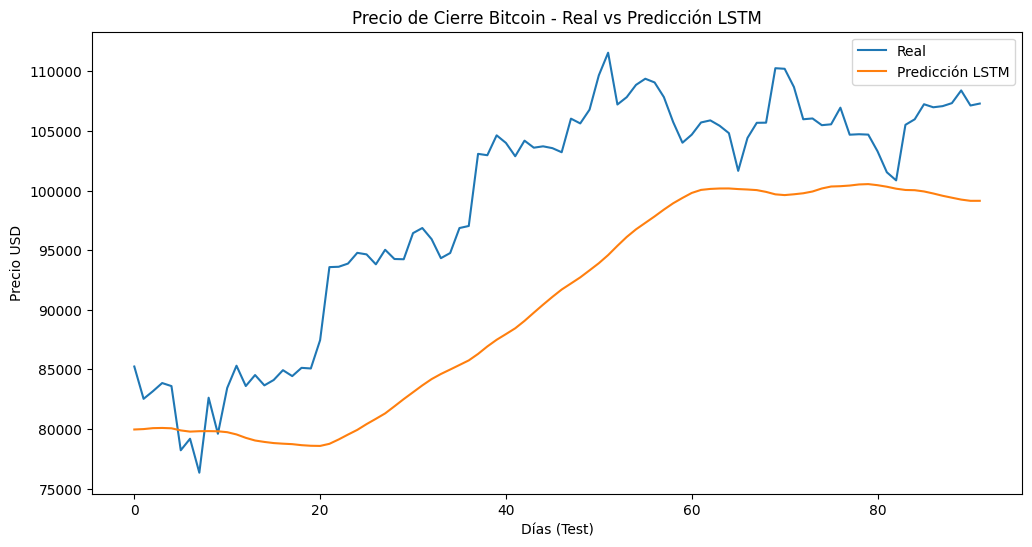

In [112]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# --- Preparación de datos para LSTM ---

# Filtrar Bitcoin en un nuevo dataframe para LSTM
df_btc_lstm = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc_lstm['date'] = pd.to_datetime(df_btc_lstm['date'])

# Seleccionar variables y eliminar NA
df_btc_lstm_model = df_btc_lstm[['date', 'closing_price', 'sma_7', 'sma_30', 'total_volume_day']].dropna().reset_index(drop=True)

# Normalizar variables (features) y target (closing_price)
scaler_features = MinMaxScaler()
features_lstm = df_btc_lstm_model[['sma_7', 'sma_30', 'total_volume_day']].values
features_lstm_scaled = scaler_features.fit_transform(features_lstm)

scaler_target = MinMaxScaler()
target_lstm = df_btc_lstm_model['closing_price'].values.reshape(-1, 1)
target_lstm_scaled = scaler_target.fit_transform(target_lstm)

# Función para crear secuencias para LSTM (window de 30 días)
def create_lstm_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_lstm_seq, y_lstm_seq = create_lstm_sequences(features_lstm_scaled, target_lstm_scaled, time_steps=30)

# División train-test 70%-30%
split_lstm = int(len(X_lstm_seq) * 0.7)
X_train_lstm, X_test_lstm = X_lstm_seq[:split_lstm], X_lstm_seq[split_lstm:]
y_train_lstm, y_test_lstm = y_lstm_seq[:split_lstm], y_lstm_seq[split_lstm:]

# --- Construcción del modelo LSTM ---
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenamiento con EarlyStopping para evitar overfitting
early_stop_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop_lstm],
    verbose=1
)

# --- Evaluación ---
y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled)
y_true_lstm = scaler_target.inverse_transform(y_test_lstm)

rmse_lstm = np.sqrt(np.mean((y_pred_lstm - y_true_lstm) ** 2))
mae_lstm = np.mean(np.abs(y_pred_lstm - y_true_lstm))
r2_lstm = 1 - (np.sum((y_true_lstm - y_pred_lstm) ** 2) / np.sum((y_true_lstm - np.mean(y_true_lstm)) ** 2))

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE: {mae_lstm:.2f}")
print(f"LSTM R2: {r2_lstm:.2f}")

# --- Gráfico de resultados ---
plt.figure(figsize=(12,6))
plt.plot(y_true_lstm, label='Real')
plt.plot(y_pred_lstm, label='Predicción LSTM')
plt.title('Precio de Cierre Bitcoin - Real vs Predicción LSTM')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.show()


aquí comienza el segundo modelo mejorado, pero tampoco da buenos resultados:

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 561ms/step - loss: 0.3191 - val_loss: 0.0395
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 0.0728 - val_loss: 0.0626
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 0.0231 - val_loss: 0.0035
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - loss: 0.0235 - val_loss: 0.0062
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 0.0120 - val_loss: 0.0252
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.0110 - val_loss: 0.0089
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 0.0092 - val_loss: 0.0106
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0082 - val_loss: 0.0158
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0070 - val_loss: 0.0103
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0063 - val_loss: 0.0108
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0074 - val_loss: 0.0099
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0065 - val_loss

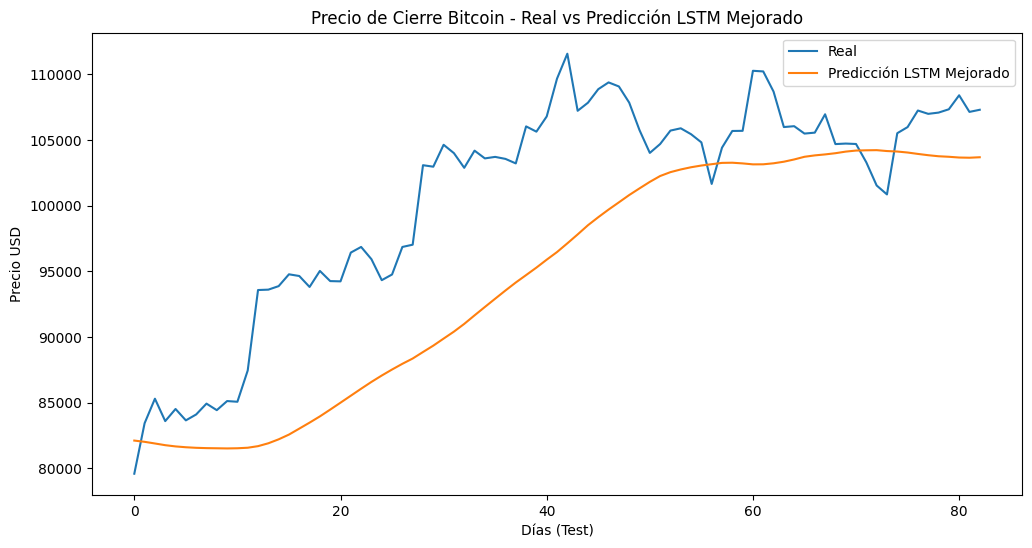

In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Filtrar Bitcoin
df_btc_lstm = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc_lstm['date'] = pd.to_datetime(df_btc_lstm['date'])

# Crear variable "days_since_start"
df_btc_lstm['days_since_start'] = (df_btc_lstm['date'] - df_btc_lstm['date'].min()).dt.days

# Crear lags para closing_price (1, 3 y 7 días)
for lag in [1, 3, 7]:
    df_btc_lstm[f'lag_close_{lag}'] = df_btc_lstm['closing_price'].shift(lag)

# Seleccionar variables para el modelo
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_btc_lstm_model = df_btc_lstm[vars_modelo].dropna().reset_index(drop=True)

# Normalizar variables (features) y target (closing_price)
scaler_features = MinMaxScaler()
features_lstm = df_btc_lstm_model.drop(columns=['closing_price']).values
features_lstm_scaled = scaler_features.fit_transform(features_lstm)

scaler_target = MinMaxScaler()
target_lstm = df_btc_lstm_model['closing_price'].values.reshape(-1, 1)
target_lstm_scaled = scaler_target.fit_transform(target_lstm)

# Función para crear secuencias LSTM con ventana de 60 días
def create_lstm_sequences(X, y, time_steps=60):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_lstm_seq, y_lstm_seq = create_lstm_sequences(features_lstm_scaled, target_lstm_scaled, time_steps=60)

# División train-test 70%-30%
split_lstm = int(len(X_lstm_seq) * 0.7)
X_train_lstm, X_test_lstm = X_lstm_seq[:split_lstm], X_lstm_seq[split_lstm:]
y_train_lstm, y_test_lstm = y_lstm_seq[:split_lstm], y_lstm_seq[split_lstm:]

# Modelo LSTM con 2 capas
model_lstm = Sequential()
model_lstm.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenamiento con EarlyStopping
early_stop_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop_lstm],
    verbose=1
)

# Predicción y evaluación
y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled)
y_true_lstm = scaler_target.inverse_transform(y_test_lstm)

rmse_lstm = np.sqrt(np.mean((y_pred_lstm - y_true_lstm) ** 2))
mae_lstm = np.mean(np.abs(y_pred_lstm - y_true_lstm))
r2_lstm = 1 - (np.sum((y_true_lstm - y_pred_lstm) ** 2) / np.sum((y_true_lstm - np.mean(y_true_lstm)) ** 2))

print(f"LSTM mejorado RMSE: {rmse_lstm:.2f}")
print(f"LSTM mejorado MAE: {mae_lstm:.2f}")
print(f"LSTM mejorado R2: {r2_lstm:.2f}")

# Gráfico resultados
plt.figure(figsize=(12,6))
plt.plot(y_true_lstm, label='Real')
plt.plot(y_pred_lstm, label='Predicción LSTM Mejorado')
plt.title('Precio de Cierre Bitcoin - Real vs Predicción LSTM Mejorado')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.show()


este modelo de regresión esta perfecto! Este queda en el trabajo:


🔍 Resultados para BINANCECOIN:
RMSE: 13.73 | MAE: 10.13 | R2: 0.82


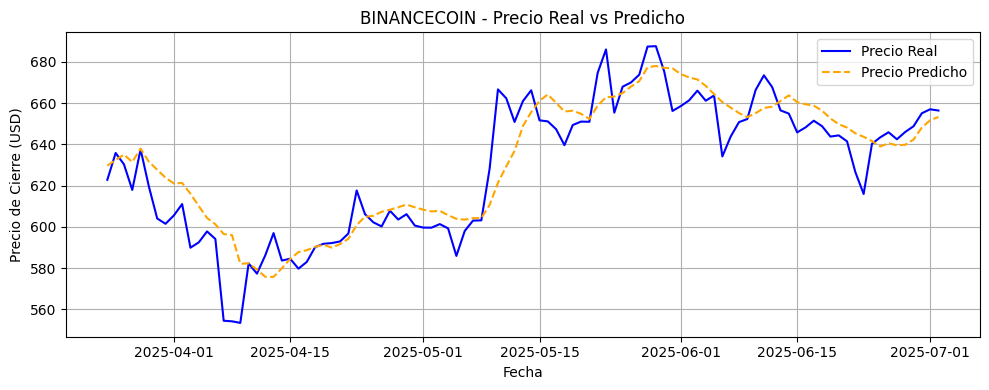

🔮 Predicción del precio de cierre - Próximos 10 días (BINANCECOIN):
        date  predicted_closing_price
0 2025-07-03                   653.32
1 2025-07-04                   654.42
2 2025-07-05                   656.15
3 2025-07-06                   657.62
4 2025-07-07                   658.85
5 2025-07-08                   659.38
6 2025-07-09                   659.74
7 2025-07-10                   660.23
8 2025-07-11                   661.24
9 2025-07-12                   662.26


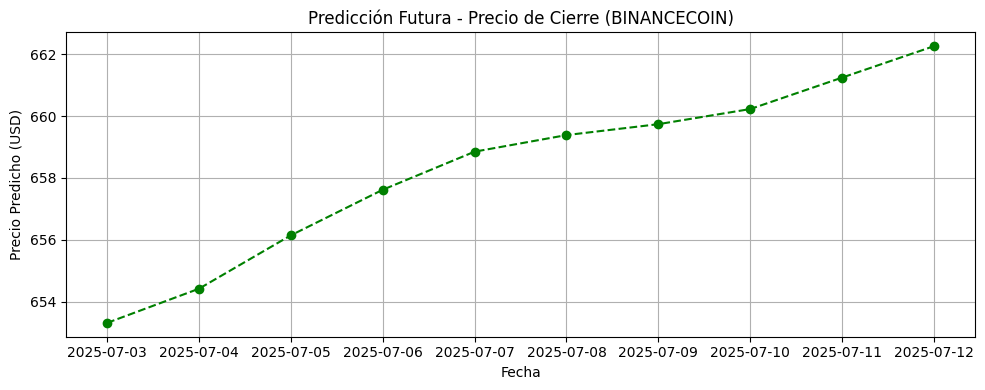


🔍 Resultados para BITCOIN:
RMSE: 2339.88 | MAE: 1933.20 | R2: 0.95


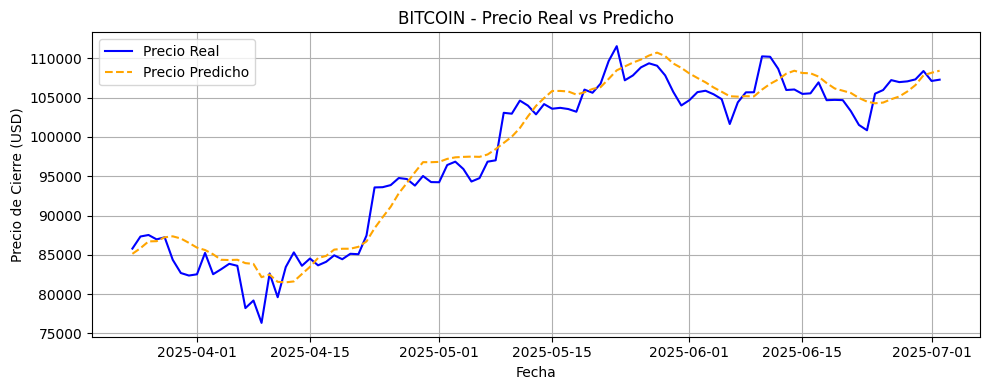

🔮 Predicción del precio de cierre - Próximos 10 días (BITCOIN):
        date  predicted_closing_price
0 2025-07-03               108,448.13
1 2025-07-04               108,639.34
2 2025-07-05               108,898.49
3 2025-07-06               109,178.37
4 2025-07-07               109,439.62
5 2025-07-08               109,587.34
6 2025-07-09               109,971.31
7 2025-07-10               110,388.72
8 2025-07-11               110,714.69
9 2025-07-12               111,059.98


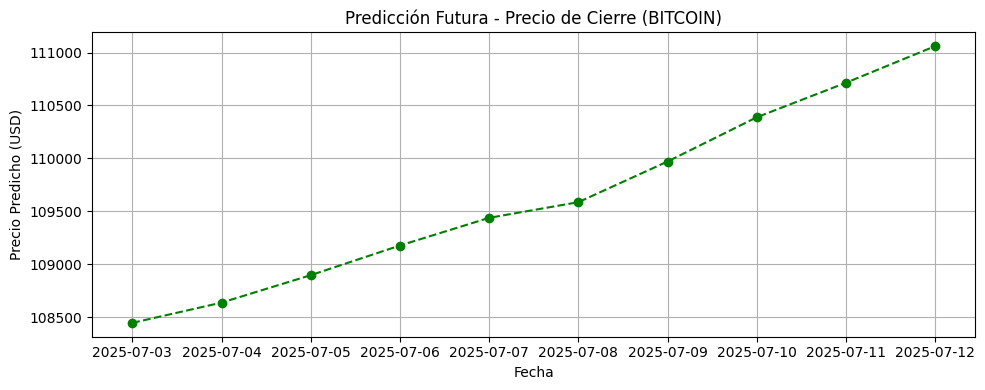


🔍 Resultados para CARDANO:
RMSE: 0.03 | MAE: 0.02 | R2: 0.79


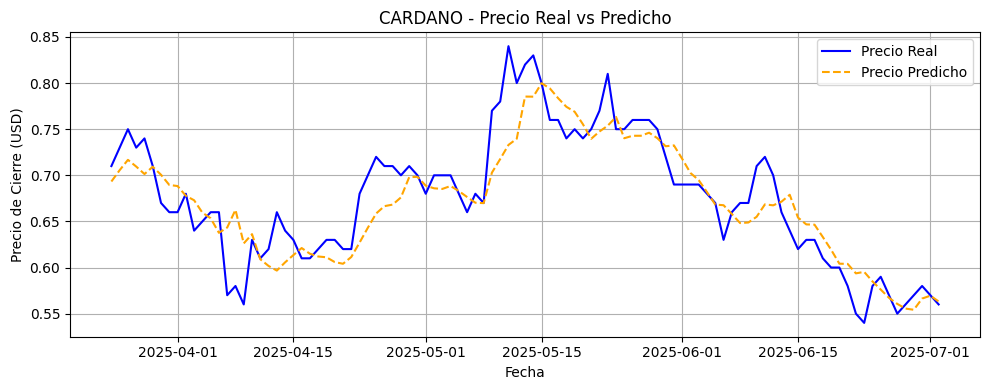

🔮 Predicción del precio de cierre - Próximos 10 días (CARDANO):
        date  predicted_closing_price
0 2025-07-03                     0.56
1 2025-07-04                     0.56
2 2025-07-05                     0.56
3 2025-07-06                     0.56
4 2025-07-07                     0.56
5 2025-07-08                     0.56
6 2025-07-09                     0.56
7 2025-07-10                     0.56
8 2025-07-11                     0.56
9 2025-07-12                     0.56


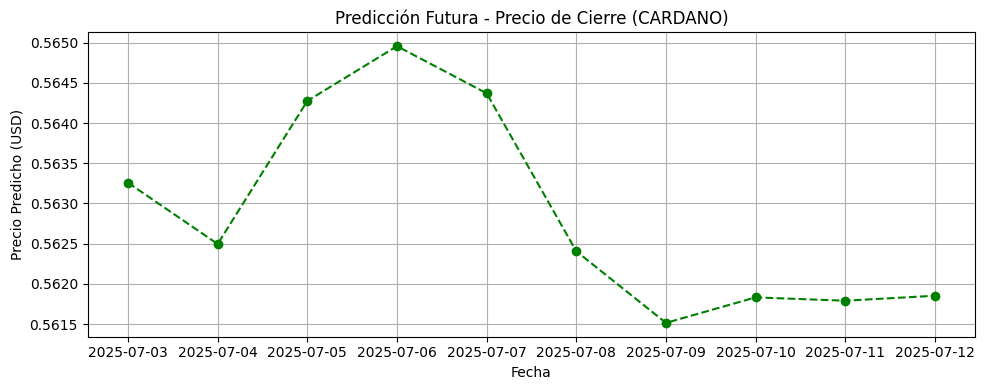


🔍 Resultados para DOGECOIN:
RMSE: 0.01 | MAE: 0.01 | R2: 0.80


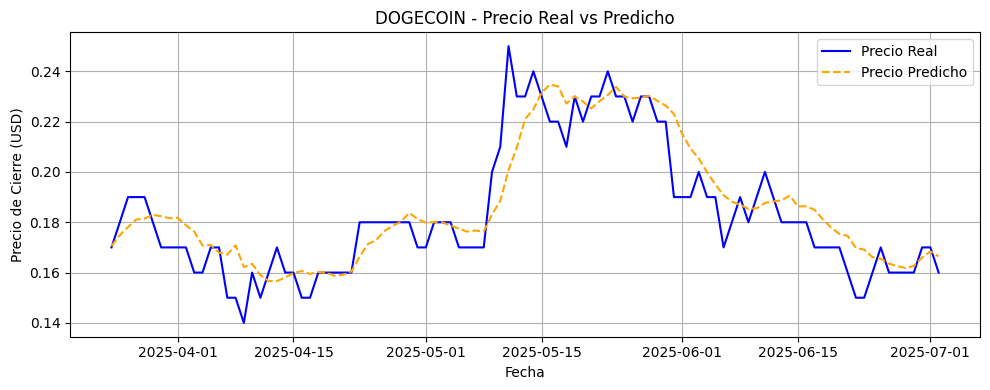

🔮 Predicción del precio de cierre - Próximos 10 días (DOGECOIN):
        date  predicted_closing_price
0 2025-07-03                     0.17
1 2025-07-04                     0.17
2 2025-07-05                     0.17
3 2025-07-06                     0.17
4 2025-07-07                     0.17
5 2025-07-08                     0.17
6 2025-07-09                     0.17
7 2025-07-10                     0.17
8 2025-07-11                     0.17
9 2025-07-12                     0.18


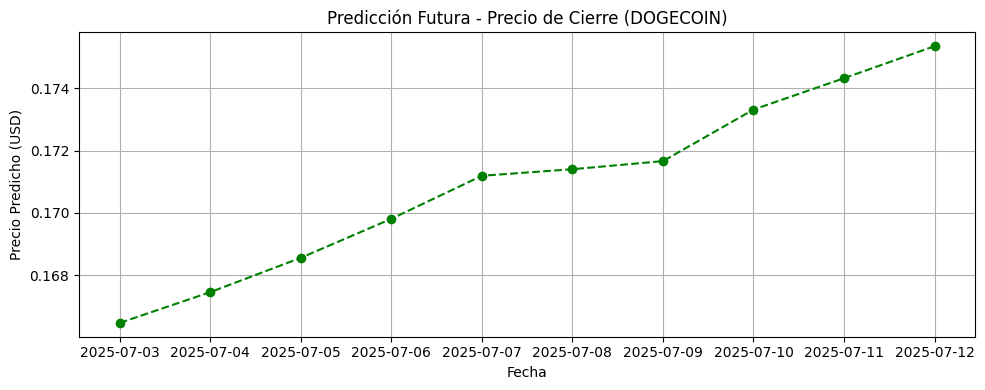


🔍 Resultados para ETHEREUM:
RMSE: 128.48 | MAE: 100.78 | R2: 0.90


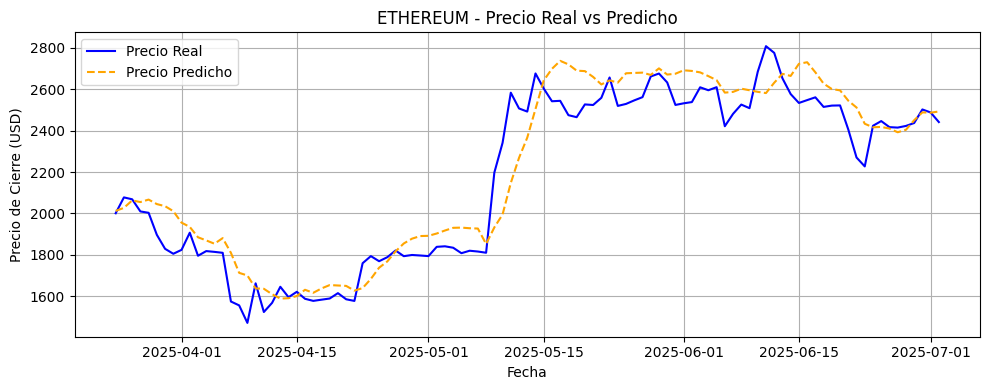

🔮 Predicción del precio de cierre - Próximos 10 días (ETHEREUM):
        date  predicted_closing_price
0 2025-07-03                 2,493.03
1 2025-07-04                 2,507.12
2 2025-07-05                 2,523.79
3 2025-07-06                 2,541.95
4 2025-07-07                 2,559.18
5 2025-07-08                 2,568.44
6 2025-07-09                 2,582.06
7 2025-07-10                 2,605.77
8 2025-07-11                 2,625.92
9 2025-07-12                 2,647.93


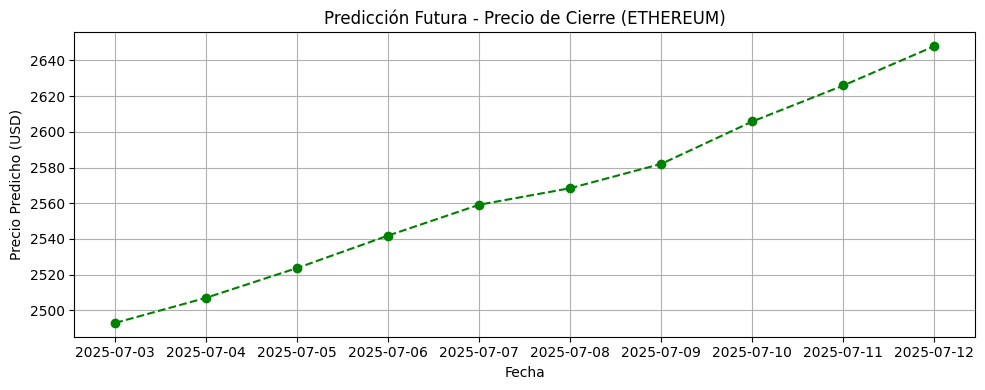


🔍 Resultados para LITECOIN:
RMSE: 4.66 | MAE: 3.74 | R2: 0.64


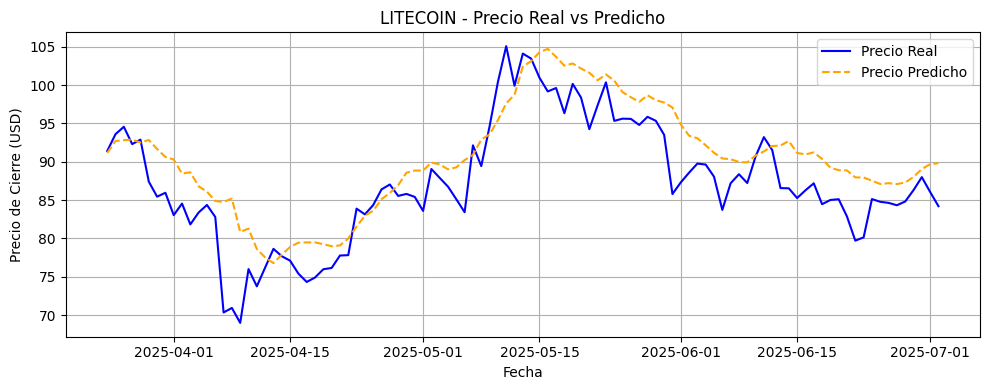

🔮 Predicción del precio de cierre - Próximos 10 días (LITECOIN):
        date  predicted_closing_price
0 2025-07-03                    89.85
1 2025-07-04                    90.55
2 2025-07-05                    91.39
3 2025-07-06                    92.27
4 2025-07-07                    93.05
5 2025-07-08                    93.72
6 2025-07-09                    94.73
7 2025-07-10                    96.11
8 2025-07-11                    96.95
9 2025-07-12                    97.80


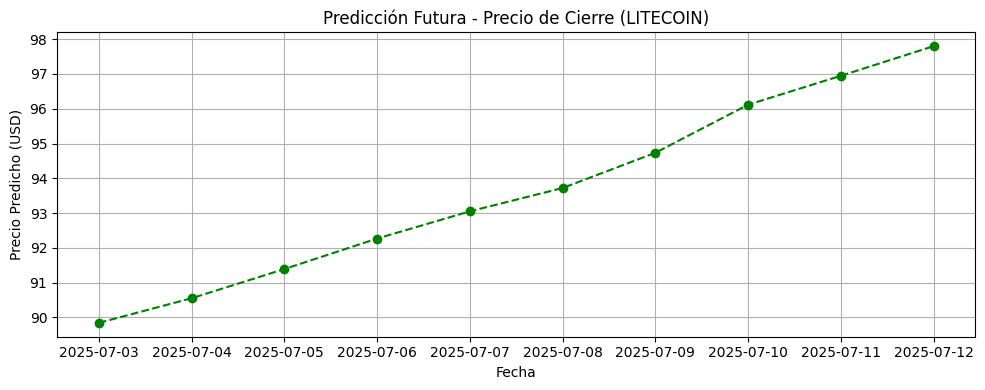


🔍 Resultados para POLKADOT:
RMSE: 0.25 | MAE: 0.21 | R2: 0.73


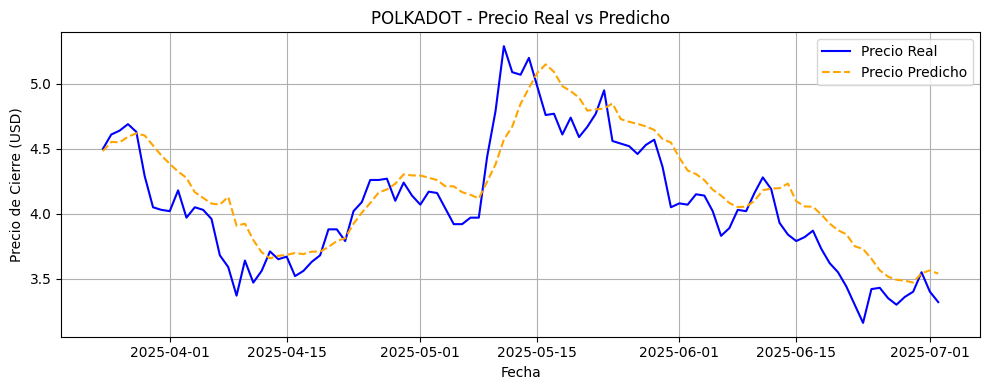

🔮 Predicción del precio de cierre - Próximos 10 días (POLKADOT):
        date  predicted_closing_price
0 2025-07-03                     3.54
1 2025-07-04                     3.57
2 2025-07-05                     3.61
3 2025-07-06                     3.64
4 2025-07-07                     3.68
5 2025-07-08                     3.70
6 2025-07-09                     3.74
7 2025-07-10                     3.80
8 2025-07-11                     3.83
9 2025-07-12                     3.87


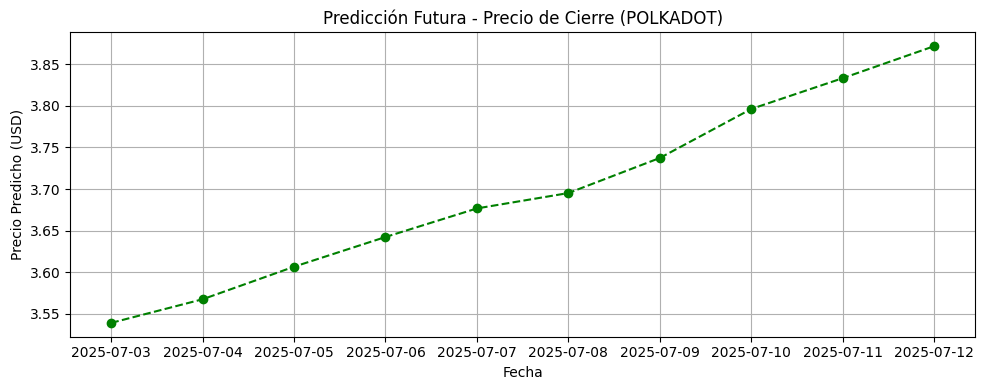


🔍 Resultados para SOLANA:
RMSE: 7.60 | MAE: 6.15 | R2: 0.82


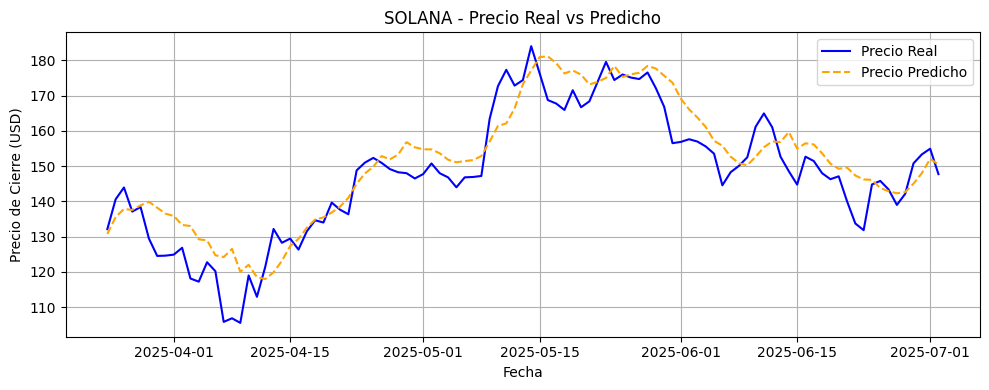

🔮 Predicción del precio de cierre - Próximos 10 días (SOLANA):
        date  predicted_closing_price
0 2025-07-03                   150.48
1 2025-07-04                   151.63
2 2025-07-05                   153.62
3 2025-07-06                   155.41
4 2025-07-07                   156.06
5 2025-07-08                   156.45
6 2025-07-09                   156.65
7 2025-07-10                   158.01
8 2025-07-11                   159.20
9 2025-07-12                   160.42


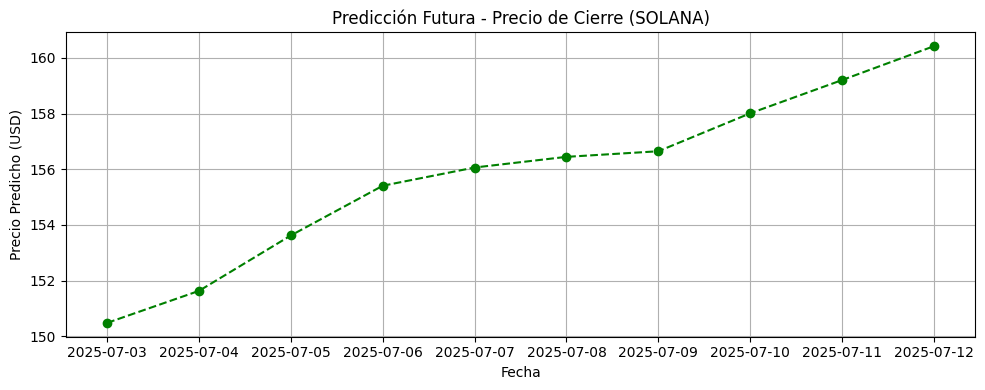


🔍 Resultados para TRON:
RMSE: 0.01 | MAE: 0.00 | R2: 0.86


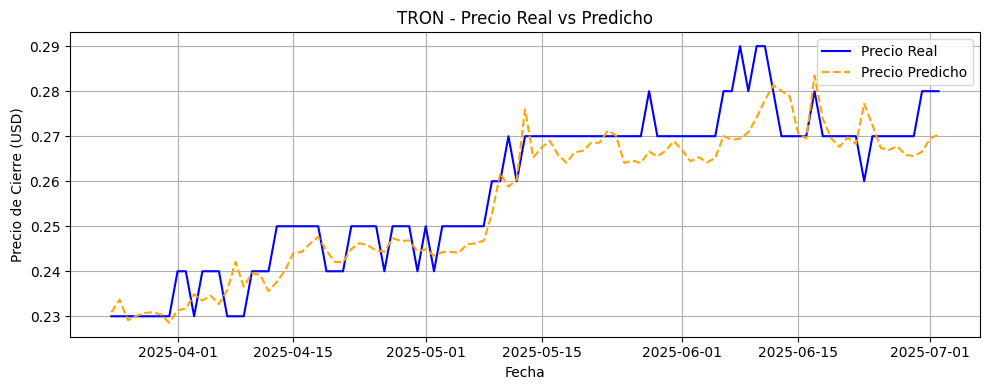

🔮 Predicción del precio de cierre - Próximos 10 días (TRON):
        date  predicted_closing_price
0 2025-07-03                     0.27
1 2025-07-04                     0.27
2 2025-07-05                     0.27
3 2025-07-06                     0.27
4 2025-07-07                     0.27
5 2025-07-08                     0.27
6 2025-07-09                     0.27
7 2025-07-10                     0.27
8 2025-07-11                     0.27
9 2025-07-12                     0.27


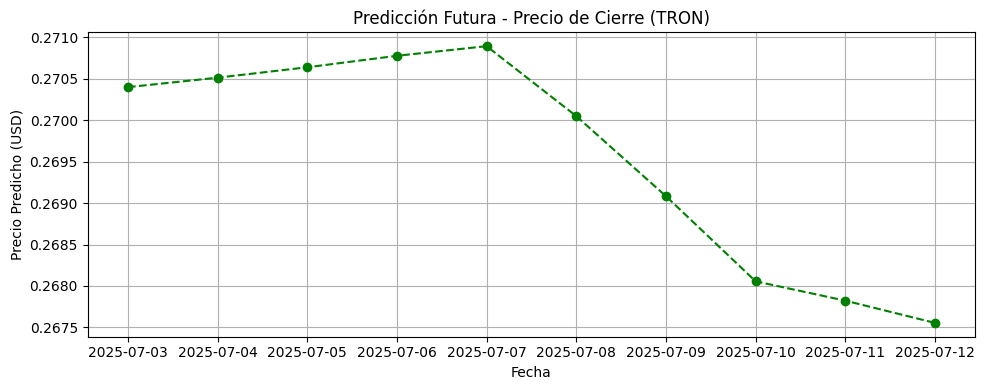


🔍 Resultados para RIPPLE:
RMSE: 0.09 | MAE: 0.08 | R2: 0.53


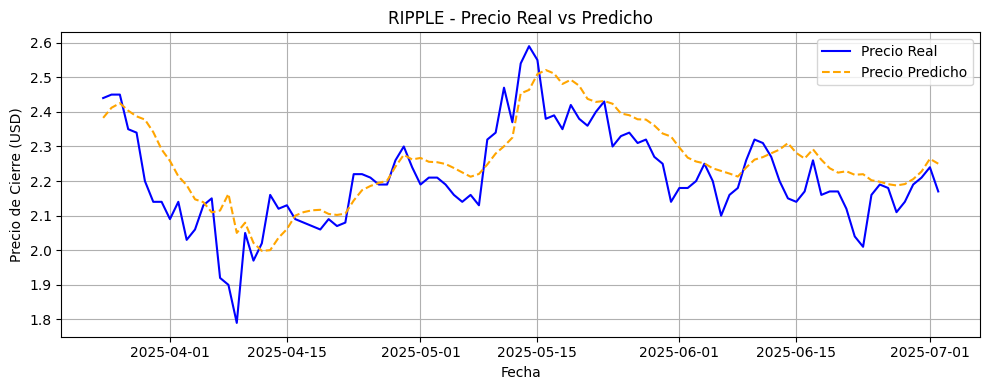

🔮 Predicción del precio de cierre - Próximos 10 días (RIPPLE):
        date  predicted_closing_price
0 2025-07-03                     2.25
1 2025-07-04                     2.26
2 2025-07-05                     2.28
3 2025-07-06                     2.30
4 2025-07-07                     2.32
5 2025-07-08                     2.33
6 2025-07-09                     2.35
7 2025-07-10                     2.37
8 2025-07-11                     2.39
9 2025-07-12                     2.41


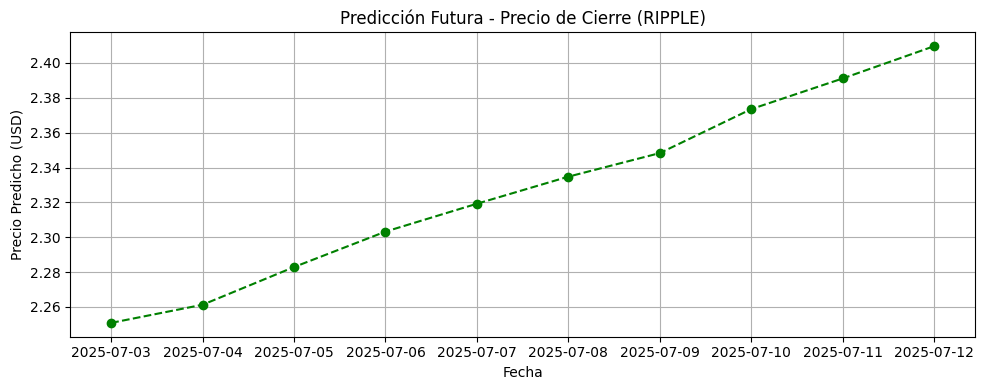

📊 Tabla resumen de métricas por criptomoneda:
  Criptomoneda     RMSE      MAE   R2
0  Binancecoin    13.73    10.13 0.82
1      Bitcoin 2,339.88 1,933.20 0.95
2      Cardano     0.03     0.02 0.79
3     Dogecoin     0.01     0.01 0.80
4     Ethereum   128.48   100.78 0.90
5     Litecoin     4.66     3.74 0.64
6     Polkadot     0.25     0.21 0.73
7       Solana     7.60     6.15 0.82
8         Tron     0.01     0.00 0.86
9       Ripple     0.09     0.08 0.53


In [123]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt

# Asegurar columnas numéricas
for col in ['sma_7', 'sma_30', 'total_volume_day', 'closing_price']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

# Convertir a datetime
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Lista de criptos únicas
criptos = df_merged['id'].unique()

# Diccionario para guardar resultados
resultados_totales = {}

for cripto in criptos:
    df_c = df_merged[df_merged['id'] == cripto].copy()
    df_c = df_c[['date', 'closing_price', 'sma_7', 'sma_30', 'total_volume_day']].dropna()

    if len(df_c) < 40:
        continue  # Evitar criptos con pocos datos

    df_c['days_since_start'] = (df_c['date'] - df_c['date'].min()).dt.days

    X = df_c[['sma_7', 'sma_30', 'total_volume_day', 'days_since_start']]
    y = df_c['closing_price']

    # División temporal
    split_index = int(len(df_c) * 0.7)
    X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
    X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

    # Entrenamiento
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Métricas
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


        # Guardar métricas
    metricas.append({
        'Criptomoneda': cripto.title(),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R2': round(r2, 2)
    })



    print(f"\n🔍 Resultados para {cripto.upper()}:")
    print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f} | R2: {r2:.2f}")

    # Resultados en DataFrame
    fechas_test = df_c['date'].iloc[split_index:]
    resultados = pd.DataFrame({
        'date': fechas_test,
        'real': y_test.values,
        'predicted': y_pred,
        'abs_error': abs(y_test.values - y_pred)
    })
    resultados_totales[cripto] = resultados

    # Gráfico real vs predicción
    plt.figure(figsize=(10, 4))
    plt.plot(resultados['date'], resultados['real'], label='Precio Real', color='blue')
    plt.plot(resultados['date'], resultados['predicted'], label='Precio Predicho', color='orange', linestyle='--')
    plt.title(f'{cripto.upper()} - Precio Real vs Predicho')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --------------------
    # 🔮 Predicción futura
    # --------------------
    datos_simulados = df_c.copy()
    fecha_max = datos_simulados['date'].max()
    days_start = datos_simulados['days_since_start'].max()
    futuras_fechas = []
    futuras_preds = []

    for i in range(1, 11):
        nueva_fecha = fecha_max + timedelta(days=i)
        dias_desde_inicio = days_start + i
        ultimos_cierres = datos_simulados['closing_price'].tolist()

        sma_7 = np.mean(ultimos_cierres[-7:]) if len(ultimos_cierres) >= 7 else np.mean(ultimos_cierres)
        sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else np.mean(ultimos_cierres)
        volumen = datos_simulados['total_volume_day'].iloc[-1]

        features = pd.DataFrame([{
            'sma_7': sma_7,
            'sma_30': sma_30,
             'total_volume_day': volumen,
             'days_since_start': dias_desde_inicio
        }])
        pred = model.predict(features)[0]

        futuras_fechas.append(nueva_fecha)
        futuras_preds.append(pred)

        nueva_fila = {
            'date': nueva_fecha,
            'closing_price': pred,
            'sma_7': sma_7,
            'sma_30': sma_30,
            'total_volume_day': volumen,
            'days_since_start': dias_desde_inicio
        }
        datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

    df_futuro = pd.DataFrame({
        'date': futuras_fechas,
        'predicted_closing_price': futuras_preds
    })

    print(f"🔮 Predicción del precio de cierre - Próximos 10 días ({cripto.upper()}):")
    print(df_futuro)

    # Gráfico de predicción futura
    plt.figure(figsize=(10, 4))
    plt.plot(df_futuro['date'], df_futuro['predicted_closing_price'], color='green', marker='o', linestyle='--')
    plt.title(f'Predicción Futura - Precio de Cierre ({cripto.upper()})')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Predicho (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Mostrar resumen final
df_metricas = pd.DataFrame(metricas)
print("📊 Tabla resumen de métricas por criptomoneda:")
print(df_metricas)

📈 Evaluación del modelo de predicción de precios

Para evaluar qué tan bien funciona nuestro modelo en la predicción del precio de cierre de cada criptomoneda, utilizamos tres métricas:

RMSE (Root Mean Squared Error): mide el error promedio del modelo, penalizando más los errores grandes. Se interpreta en la misma unidad que el precio (dólares). Cuanto menor, mejor.

MAE (Mean Absolute Error): representa el error promedio absoluto, es decir, en promedio cuánto se equivoca el modelo por día. También cuanto menor, mejor.

R² (Coeficiente de Determinación): indica qué proporción de la variabilidad del precio real puede explicar el modelo. Va de 0 a 1. Un R² cercano a 1 significa que el modelo tiene muy buen desempeño.

🧾 Análisis por criptomoneda

Bitcoin obtuvo un R² de 0.95, lo que indica que el modelo logra explicar el 95% de la variabilidad de su precio. A pesar de su RMSE alto (2339.88 USD), esto es esperable debido a sus valores absolutos tan altos. Es el mejor modelo de todos.

Ethereum también muestra un muy buen desempeño con un R² de 0.90, y errores razonables (RMSE: 128.48 USD) teniendo en cuenta su precio promedio.

Binancecoin y Solana tienen un rendimiento sólido con R² de 0.82, lo que indica una buena capacidad predictiva.

Tron y Dogecoin tienen errores muy bajos (por su bajo valor nominal) y un buen R² (0.86 y 0.80, respectivamente).

Cardano, Polkadot y Litecoin se mantienen en un nivel intermedio con R² entre 0.64 y 0.79. Aún son aceptables, pero podrían beneficiarse de modelos más complejos o con más variables.

Ripple muestra el rendimiento más bajo con un R² de 0.53, lo que sugiere que el modelo no logra explicar bien su comportamiento de precios, posiblemente por mayor volatilidad o falta de variables predictivas clave.

✅ Conclusión para el storytelling

En resumen, el modelo logra predecir con una buena precisión los precios de la mayoría de las criptomonedas, en especial aquellas con mayor capitalización como Bitcoin y Ethereum. El análisis de métricas nos permite confiar en las predicciones, pero también detectar casos como Ripple, donde el comportamiento del precio es más difícil de capturar. Esto abre la puerta a futuros trabajos con modelos más complejos, como árboles de decisión o redes neuronales, e incluso la incorporación de nuevas variables externas que puedan influir en el precio.

probando tremendo modelo:

In [132]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

df_btc = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc['date'] = pd.to_datetime(df_btc['date'])
df_btc['days_since_start'] = (df_btc['date'] - df_btc['date'].min()).dt.days

for lag in [1, 3, 7]:
    df_btc[f'lag_close_{lag}'] = df_btc['closing_price'].shift(lag)

vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_btc_model = df_btc[vars_modelo].dropna().reset_index(drop=True)

X = df_btc_model.drop(columns=['closing_price'])
y = df_btc_model['closing_price']

split_idx = int(len(df_btc_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ----------------------------
# 2. Pipeline y Optimización
# ----------------------------

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.05],
    'model__max_depth': [3, 5]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# ----------------------------
# 3. Evaluación
# ----------------------------

y_pred = best_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo optimizado:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")
print("🔧 Mejores hiperparámetros encontrados:", grid.best_params_)


📊 Evaluación del modelo optimizado:
RMSE: 5533.99
MAE: 4664.96
R2: 0.69
🔧 Mejores hiperparámetros encontrados: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200}


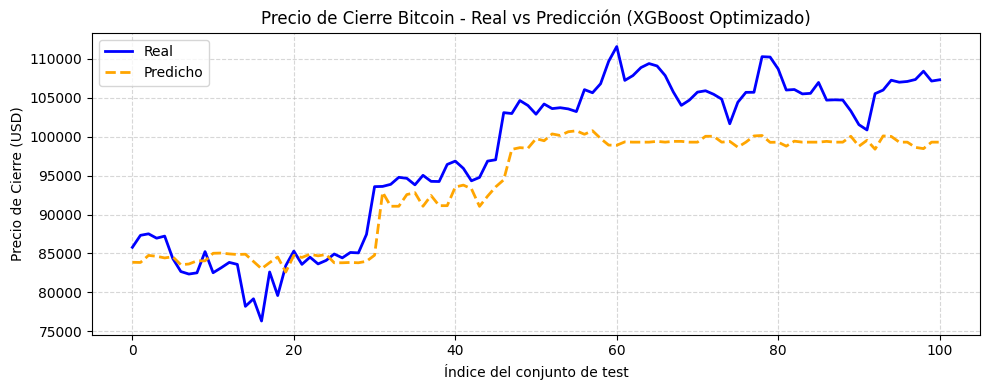

In [135]:
# ----------------------------
# 4. Gráfico: Real vs Predicción
# ----------------------------

plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicho', color='orange', linestyle='--', linewidth=2)
plt.title('Precio de Cierre Bitcoin - Real vs Predicción (XGBoost Optimizado)')
plt.xlabel('Índice del conjunto de test')
plt.ylabel('Precio de Cierre (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

🔮 Predicción del precio de cierre - Próximos 10 días:
        date  predicted_closing_price
0 2025-07-03                99,288.33
1 2025-07-04                96,087.09
2 2025-07-05                95,356.49
3 2025-07-06                94,318.13
4 2025-07-07                92,366.42
5 2025-07-08                92,250.23
6 2025-07-09                91,275.19
7 2025-07-10                86,957.09
8 2025-07-11                85,384.81
9 2025-07-12                84,546.55


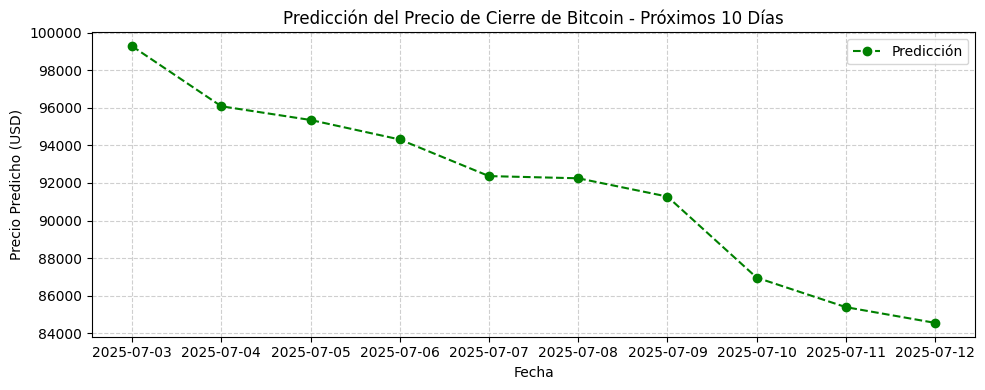

In [137]:
from datetime import timedelta

# Copia de los datos finales para simular desde ahí
datos_simulados = df_btc_model.copy()

# Última fecha disponible y día desde inicio
fecha_max = df_btc['date'].max()
dias_inicio = datos_simulados['days_since_start'].max()

# Listas para guardar fechas y predicciones
futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    nuevo_dia = dias_inicio + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    # Crear input para predicción
    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': nuevo_dia,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    # Predecir y guardar
    pred = best_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    # Agregar al dataset simulado para continuar el loop
    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': nuevo_dia,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Crear DataFrame con predicciones
df_futuro = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

# Mostrar tabla
print("🔮 Predicción del precio de cierre - Próximos 10 días:")
print(df_futuro)

# Gráfico de predicciones
plt.figure(figsize=(10,4))
plt.plot(df_futuro['date'], df_futuro['predicted_closing_price'],
         marker='o', linestyle='--', color='green', label='Predicción')
plt.title('Predicción del Precio de Cierre de Bitcoin - Próximos 10 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Este modelo es mejor aún porque tiene todos los datos en un sólo código:

📊 Evaluación del modelo en el set de test:
RMSE: 5652.55
MAE: 4769.37
R2: 0.68


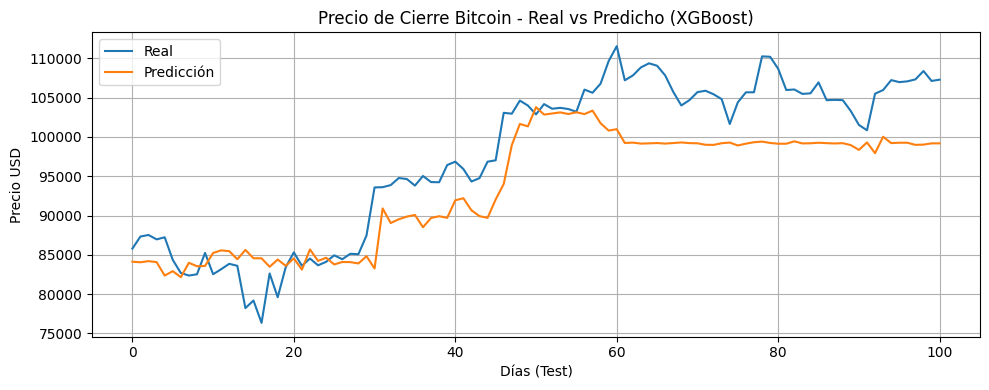

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost:
        date  predicted_closing_price
0 2025-07-03                99,186.03
1 2025-07-04                94,363.97
2 2025-07-05                91,448.70
3 2025-07-06                84,627.83
4 2025-07-07                82,237.61
5 2025-07-08                82,005.95
6 2025-07-09                82,245.21
7 2025-07-10                82,579.45
8 2025-07-11                82,973.56
9 2025-07-12                83,086.98


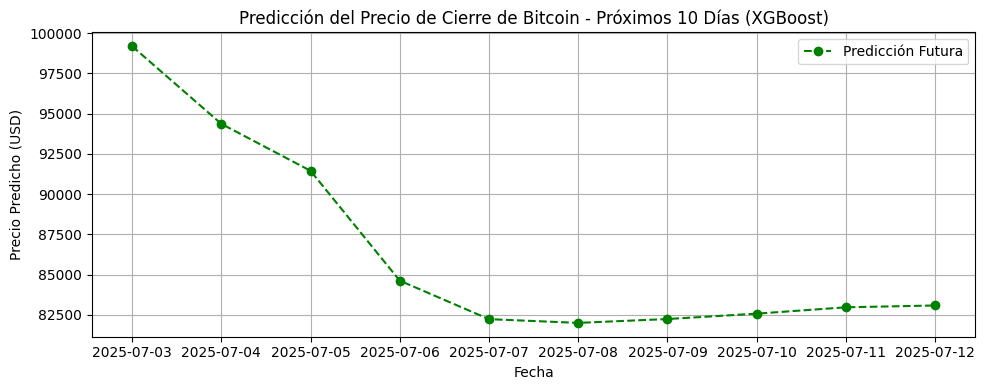

In [131]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Bitcoin
df_btc_xgb = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc_xgb['date'] = pd.to_datetime(df_btc_xgb['date'])

# Crear variable "days_since_start"
df_btc_xgb['days_since_start'] = (df_btc_xgb['date'] - df_btc_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1,3,7]:
    df_btc_xgb[f'lag_close_{lag}'] = df_btc_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_btc_xgb_model = df_btc_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_btc_xgb_model.drop(columns=['closing_price'])
y = df_btc_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_btc_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Bitcoin - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_btc_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_btc_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost:")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Bitcoin - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Binance Coin):
RMSE: 24.09
MAE: 19.79
R2: 0.46


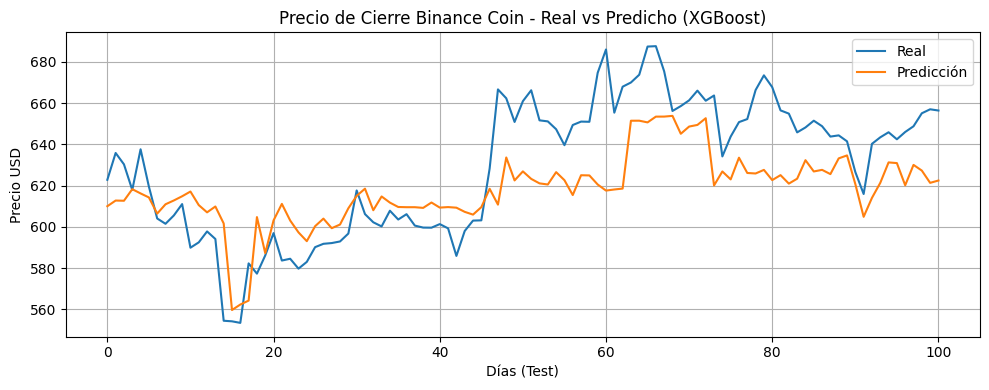

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Binance Coin):
        date  predicted_closing_price
0 2025-07-03                   623.76
1 2025-07-04                   610.31
2 2025-07-05                   610.22
3 2025-07-06                   609.35
4 2025-07-07                   612.33
5 2025-07-08                   612.33
6 2025-07-09                   614.95
7 2025-07-10                   612.67
8 2025-07-11                   612.55
9 2025-07-12                   612.55


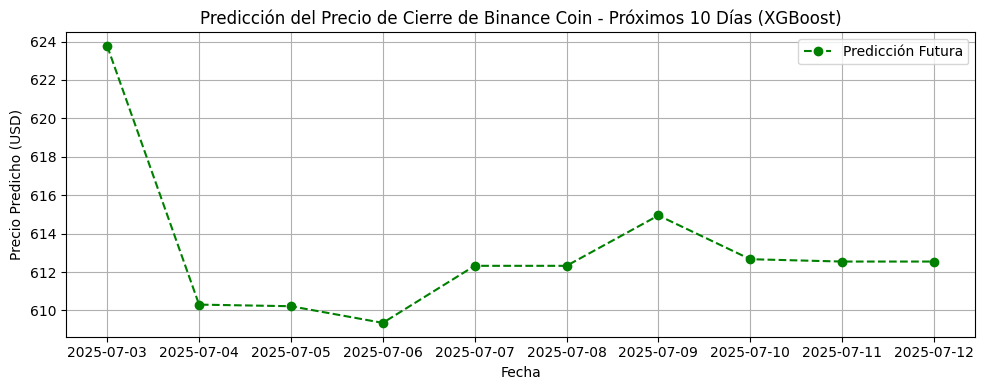

In [139]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Binance Coin
df_bnb_xgb = df_merged[df_merged['id'] == 'binancecoin'].copy()
df_bnb_xgb['date'] = pd.to_datetime(df_bnb_xgb['date'])

# Crear variable "days_since_start"
df_bnb_xgb['days_since_start'] = (df_bnb_xgb['date'] - df_bnb_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1,3,7]:
    df_bnb_xgb[f'lag_close_{lag}'] = df_bnb_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_bnb_xgb_model = df_bnb_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_bnb_xgb_model.drop(columns=['closing_price'])
y = df_bnb_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_bnb_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Binance Coin):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Binance Coin - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_bnb_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_bnb_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Binance Coin):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Binance Coin - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
